In [1]:
!pip3 install -U ucimlrepo pandas==2.2.2 numpy scipy scikit-learn jupyter-server==1.16.0 ydata-profiling[notebook] seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of jupyterlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jupyterlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of jupyterlab-server to determine which version is comp

In [2]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("="*80)
print("DIABETES 130-US HOSPITALS DATASET - EXPLORATORY DATA ANALYSIS")
print("="*80)

DIABETES 130-US HOSPITALS DATASET - EXPLORATORY DATA ANALYSIS


# 1. DATASET INTRODUCTION & LOADING


In [3]:
diabetes_dataset = fetch_ucirepo(id=296)
X_df = diabetes_dataset.data.features
y_df = diabetes_dataset.data.targets

print(f"Dataset Info:")
print(f"- Features shape: {X_df.shape}")
print(f"- Target shape: {y_df.shape}")
print(f"- Total samples: {len(X_df)}")

Dataset Info:
- Features shape: (101766, 47)
- Target shape: (101766, 1)
- Total samples: 101766


In [4]:
# Combine features and targets for easier analysis
df = pd.concat([X_df, y_df], axis=1)
print(f"- Combined dataset shape: {df.shape}")

- Combined dataset shape: (101766, 48)


In [5]:
# Basic dataset information
print(f"\nDataset Overview:")
print(f"- Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print(f"- Data types:\n{df.dtypes.value_counts()}")


Dataset Overview:
- Memory usage: 188.01 MB
- Data types:
object    37
int64     11
Name: count, dtype: int64


# 2. INITIAL DATA EXPLORATION

In [6]:
print("Column Names and Types:")
for i, (col, dtype) in enumerate(zip(df.columns, df.dtypes)):
    print(f"{i+1:2d}. {col:<25} | {str(dtype):<10}")

Column Names and Types:
 1. race                      | object    
 2. gender                    | object    
 3. age                       | object    
 4. weight                    | object    
 5. admission_type_id         | int64     
 6. discharge_disposition_id  | int64     
 7. admission_source_id       | int64     
 8. time_in_hospital          | int64     
 9. payer_code                | object    
10. medical_specialty         | object    
11. num_lab_procedures        | int64     
12. num_procedures            | int64     
13. num_medications           | int64     
14. number_outpatient         | int64     
15. number_emergency          | int64     
16. number_inpatient          | int64     
17. diag_1                    | object    
18. diag_2                    | object    
19. diag_3                    | object    
20. number_diagnoses          | int64     
21. max_glu_serum             | object    
22. A1Cresult                 | object    
23. metformin                 

In [7]:
print(f"\nFirst 5 rows:")
print(df.head())


First 5 rows:
              race  gender      age weight  admission_type_id  \
0        Caucasian  Female   [0-10)    NaN                  6   
1        Caucasian  Female  [10-20)    NaN                  1   
2  AfricanAmerican  Female  [20-30)    NaN                  1   
3        Caucasian    Male  [30-40)    NaN                  1   
4        Caucasian    Male  [40-50)    NaN                  1   

   discharge_disposition_id  admission_source_id  time_in_hospital payer_code  \
0                        25                    1                 1        NaN   
1                         1                    7                 3        NaN   
2                         1                    7                 2        NaN   
3                         1                    7                 2        NaN   
4                         1                    7                 1        NaN   

          medical_specialty  ...  citoglipton  insulin  glyburide-metformin  \
0  Pediatrics-Endocrinology 

In [8]:
print(f"\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 48 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   race                      99493 non-null   object
 1   gender                    101766 non-null  object
 2   age                       101766 non-null  object
 3   weight                    3197 non-null    object
 4   admission_type_id         101766 non-null  int64 
 5   discharge_disposition_id  101766 non-null  int64 
 6   admission_source_id       101766 non-null  int64 
 7   time_in_hospital          101766 non-null  int64 
 8   payer_code                61510 non-null   object
 9   medical_specialty         51817 non-null   object
 10  num_lab_procedures        101766 non-null  int64 
 11  num_procedures            101766 non-null  int64 
 12  num_medications           101766 non-null  int64 
 13  number_outpatient         101766 non-null  i

# 3. DATA PREPROCESSING

In [9]:
# 3.1 Missing Values Analysis
print("3.1 Missing Values Analysis:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percent
}).sort_values('Missing Percentage', ascending=False)

print(f"Columns with missing values:")
missing_cols = missing_df[missing_df['Missing Count'] > 0]
print(missing_cols.head(10))

3.1 Missing Values Analysis:
Columns with missing values:
                   Missing Count  Missing Percentage
weight                     98569           96.858479
max_glu_serum              96420           94.746772
A1Cresult                  84748           83.277322
medical_specialty          49949           49.082208
payer_code                 40256           39.557416
race                        2273            2.233555
diag_3                      1423            1.398306
diag_2                       358            0.351787
diag_1                        21            0.020636


In [10]:
# 3.2 Handle Missing Values and Special Characters
print(f"\n3.2 Data Cleaning:")

# Check for '?' values (common in this dataset)
print("Checking for '?' values in categorical columns...")
question_mark_counts = {}
for col in df.select_dtypes(include=['object']).columns:
    if '?' in df[col].values:
        print(f"  {col} has '?' values")
        question_mark_counts[col] = (df[col] == '?').sum()

if question_mark_counts:
    print("Columns with '?' values:")
    for col, count in question_mark_counts.items():
        print(f"  {col}: {count} ({count/len(df)*100:.2f}%)")

# Replace '?' with NaN for better handling
for col in question_mark_counts.keys():
    df[col] = df[col].replace('?', np.nan)


3.2 Data Cleaning:
Checking for '?' values in categorical columns...


In [11]:
# 3.3 Data Type Corrections
print(f"\n3.3 Data Type Corrections:")

# Convert numeric columns that might be stored as objects
numeric_cols = []
for col in df.columns:
    if df[col].dtype == 'object':
        try:
            # Try to convert to numeric
            pd.to_numeric(df[col], errors='raise')
            numeric_cols.append(col)
        except:
            pass

if numeric_cols:
    print(f"Converting to numeric: {numeric_cols}")
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert text columns to categorical
for c in ['diag_1', 'diag_2', 'diag_3']:
  df[c] = df[c].astype('category')


3.3 Data Type Corrections:


In [12]:
# 3.4 Constant Variables
print(f"\n3.4 Constant Variables:")
constant_cols = []
for col in df.columns:
    if df[col].nunique() == 1:
        constant_cols.append(col)

if constant_cols:
    print(f"Columns with constant values: {constant_cols}")


3.4 Constant Variables:
Columns with constant values: ['examide', 'citoglipton']



3.5 Low Variance Features:
Features with >= 95% single value dominance: 15
Low variance features: ['nateglinide', 'chlorpropamide', 'acetohexamide', 'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']

All Features Variance Analysis (sorted by single value dominance):
                 Feature                     Most_Frequent_Value  Count  Percentage  Unique_Values Data_Type
                 examide                                      No 101766    1.000000              1    object
             citoglipton                                      No 101766    1.000000              1    object
glimepiride-pioglitazone                                      No 101765    0.999990              2    object
           acetohexamide                                      No 101765    0.999990              2    object
  metformin-pio

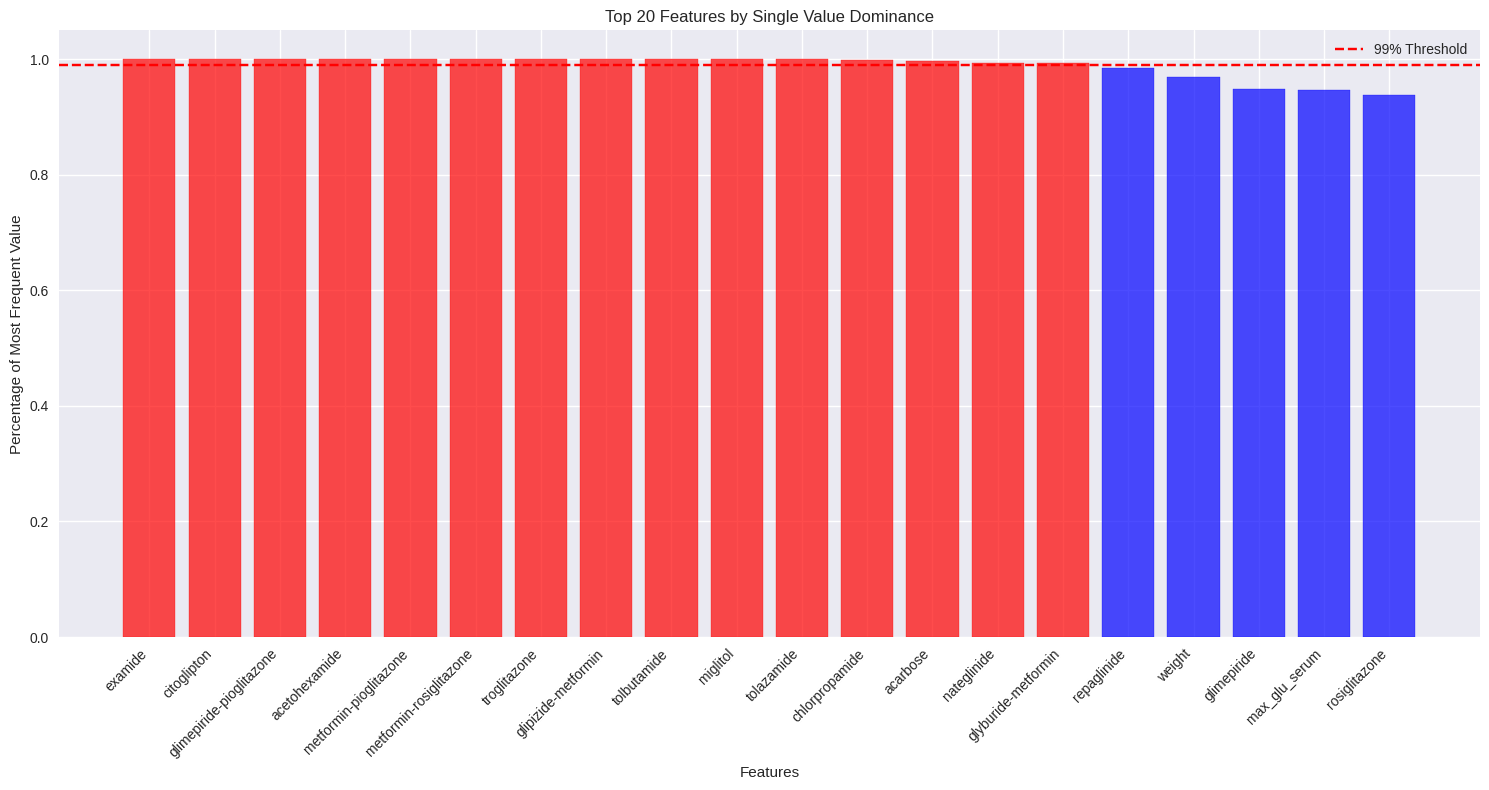

In [35]:
# 3.5 Low variance Features
print(f"\n3.5 Low Variance Features:")

def find_low_variance_features(data, threshold=0.95):
    """
    Find features where a single value accounts for >= threshold of all values
    """
    low_variance_features = []
    feature_stats = []

    for col in data.columns:
        if col in data.columns:
            # Calculate value counts and percentages
            value_counts = data[col].value_counts(dropna=False)
            total_count = len(data[col])

            if len(value_counts) > 0:
                most_frequent_count = value_counts.iloc[0]
                most_frequent_value = value_counts.index[0]
                percentage = most_frequent_count / total_count

                feature_stats.append({
                    'Feature': col,
                    'Most_Frequent_Value': most_frequent_value,
                    'Count': most_frequent_count,
                    'Percentage': percentage,
                    'Unique_Values': len(value_counts),
                    'Data_Type': str(data[col].dtype)
                })

                if percentage >= threshold:
                    low_variance_features.append(col)

    return low_variance_features, pd.DataFrame(feature_stats)

# Find low variance features
low_var_features, all_feature_stats = find_low_variance_features(df, threshold=0.99)

print(f"Features with >= 95% single value dominance: {len(low_var_features)}")
print("Low variance features:", low_var_features)

# Display detailed statistics for all features sorted by percentage
print(f"\nAll Features Variance Analysis (sorted by single value dominance):")
variance_analysis = all_feature_stats.sort_values('Percentage', ascending=False)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print(variance_analysis.to_string(index=False))

# Visualize low variance analysis
plt.figure(figsize=(15, 8))
top_20_features = variance_analysis.head(20)

bars = plt.bar(range(len(top_20_features)), top_20_features['Percentage'], alpha=0.7)
plt.axhline(y=0.99, color='red', linestyle='--', label='99% Threshold')
plt.title('Top 20 Features by Single Value Dominance')
plt.xlabel('Features')
plt.ylabel('Percentage of Most Frequent Value')
plt.xticks(range(len(top_20_features)), top_20_features['Feature'], rotation=45, ha='right')
plt.legend()

# Color bars above threshold differently
for i, bar in enumerate(bars):
    if top_20_features.iloc[i]['Percentage'] >= 0.99:
        bar.set_color('red')
    else:
        bar.set_color('blue')

plt.tight_layout()
plt.show()

In [14]:
def map_icd9_to_group(code):
    """Map ICD-9 diagnosis codes to diagnostic groups"""
    if pd.isna(code) or code == '' or str(code).lower() == 'nan':
        return 'Unknown'

    # Convert to string and handle various formats
    code_str = str(code).strip()

    # Remove any trailing decimals like .0
    if '.' in code_str:
        try:
            # Handle decimal codes
            code_num = float(code_str)
        except:
            return 'Other'
    else:
        try:
            # Handle integer codes
            code_num = float(code_str)
        except:
            return 'Other'

    # Apply ICD-9 grouping rules
    if 250.0 <= code_num < 251.0:  # Diabetes: 250.xx
        return 'Diabetes'
    elif (390 <= code_num <= 459) or code_num == 785:  # Circulatory
        return 'Circulatory'
    elif (520 <= code_num <= 579) or code_num == 787:  # Digestive
        return 'Digestive'
    elif (580 <= code_num <= 629) or code_num == 788:  # Genitourinary
        return 'Genitourinary'
    elif 800 <= code_num <= 999:  # Injury
        return 'Injury'
    elif 710 <= code_num <= 739:  # Musculoskeletal
        return 'Musculoskeletal'
    elif 140 <= code_num <= 239:  # Neoplasms
        return 'Neoplasms'
    elif (460 <= code_num <= 519) or code_num == 786:  # Respiratory
        return 'Respiratory'
    else:
        return 'Other'

In [15]:
diag_cols = ['diag_1', 'diag_2', 'diag_3']
for col in diag_cols:
    if col in df.columns:
        group_col = f"{col}_group"
        df[group_col] = df[col].apply(map_icd9_to_group)
        print(f"- Added {group_col} based on ICD-9 mapping")

print(f"\nICD-9 Code Mapping Rules Applied:")
print(f"• Diabetes: 250.xx")
print(f"• Circulatory: 390-459, 785")
print(f"• Respiratory: 460-519, 786")
print(f"• Digestive: 520-579, 787")
print(f"• Genitourinary: 580-629, 788")
print(f"• Injury: 800-999")
print(f"• Musculoskeletal: 710-739")
print(f"• Neoplasms: 140-239")
print(f"• Other: All remaining codes")

- Added diag_1_group based on ICD-9 mapping
- Added diag_2_group based on ICD-9 mapping
- Added diag_3_group based on ICD-9 mapping

ICD-9 Code Mapping Rules Applied:
• Diabetes: 250.xx
• Circulatory: 390-459, 785
• Respiratory: 460-519, 786
• Digestive: 520-579, 787
• Genitourinary: 580-629, 788
• Injury: 800-999
• Musculoskeletal: 710-739
• Neoplasms: 140-239
• Other: All remaining codes


# 4. DESCRIPTIVE STATISTICS

In [16]:
# 4.1 Numerical variables
numerical_cols = df.select_dtypes(include=[np.number]).columns
print(f"4.1 Numerical Variables ({len(numerical_cols)} columns):")
print(df[numerical_cols].describe())

4.1 Numerical Variables (11 columns):
       admission_type_id  discharge_disposition_id  admission_source_id  \
count      101766.000000             101766.000000        101766.000000   
mean            2.024006                  3.715642             5.754437   
std             1.445403                  5.280166             4.064081   
min             1.000000                  1.000000             1.000000   
25%             1.000000                  1.000000             1.000000   
50%             1.000000                  1.000000             7.000000   
75%             3.000000                  4.000000             7.000000   
max             8.000000                 28.000000            25.000000   

       time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
count     101766.000000       101766.000000   101766.000000    101766.000000   
mean           4.395987           43.095641        1.339730        16.021844   
std            2.985108           19.674362   

In [17]:
# 4.2 Categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"\n4.2 Categorical Variables ({len(categorical_cols)} columns):")
for col in categorical_cols[:10]:  # Show first 10 categorical columns
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")
    if unique_vals <= 10:
        print(f"  Values: {df[col].value_counts().head().to_dict()}")


4.2 Categorical Variables (37 columns):
race: 5 unique values
  Values: {'Caucasian': 76099, 'AfricanAmerican': 19210, 'Hispanic': 2037, 'Other': 1506, 'Asian': 641}
gender: 3 unique values
  Values: {'Female': 54708, 'Male': 47055, 'Unknown/Invalid': 3}
age: 10 unique values
  Values: {'[70-80)': 26068, '[60-70)': 22483, '[50-60)': 17256, '[80-90)': 17197, '[40-50)': 9685}
weight: 9 unique values
  Values: {'[75-100)': 1336, '[50-75)': 897, '[100-125)': 625, '[125-150)': 145, '[25-50)': 97}
payer_code: 17 unique values
medical_specialty: 72 unique values
max_glu_serum: 3 unique values
  Values: {'Norm': 2597, '>200': 1485, '>300': 1264}
A1Cresult: 3 unique values
  Values: {'>8': 8216, 'Norm': 4990, '>7': 3812}
metformin: 4 unique values
  Values: {'No': 81778, 'Steady': 18346, 'Up': 1067, 'Down': 575}
repaglinide: 4 unique values
  Values: {'No': 100227, 'Steady': 1384, 'Up': 110, 'Down': 45}


# 5. TARGET VARIABLE ANALYSIS

In [18]:
target_col = y_df.columns[0] if len(y_df.columns) > 0 else 'readmitted'
if target_col in df.columns:
    print(f"Target variable: {target_col}")
    print(f"Target distribution:")
    target_counts = df[target_col].value_counts()
    print(target_counts)
    print(f"\nTarget proportions:")
    print(target_counts / len(df) * 100)

Target variable: readmitted
Target distribution:
readmitted
NO     54864
>30    35545
<30    11357
Name: count, dtype: int64

Target proportions:
readmitted
NO     53.911916
>30    34.928169
<30    11.159916
Name: count, dtype: float64


# 6. EXPLORATORY DATA ANALYSIS

6.1 Target Variable Distribution:


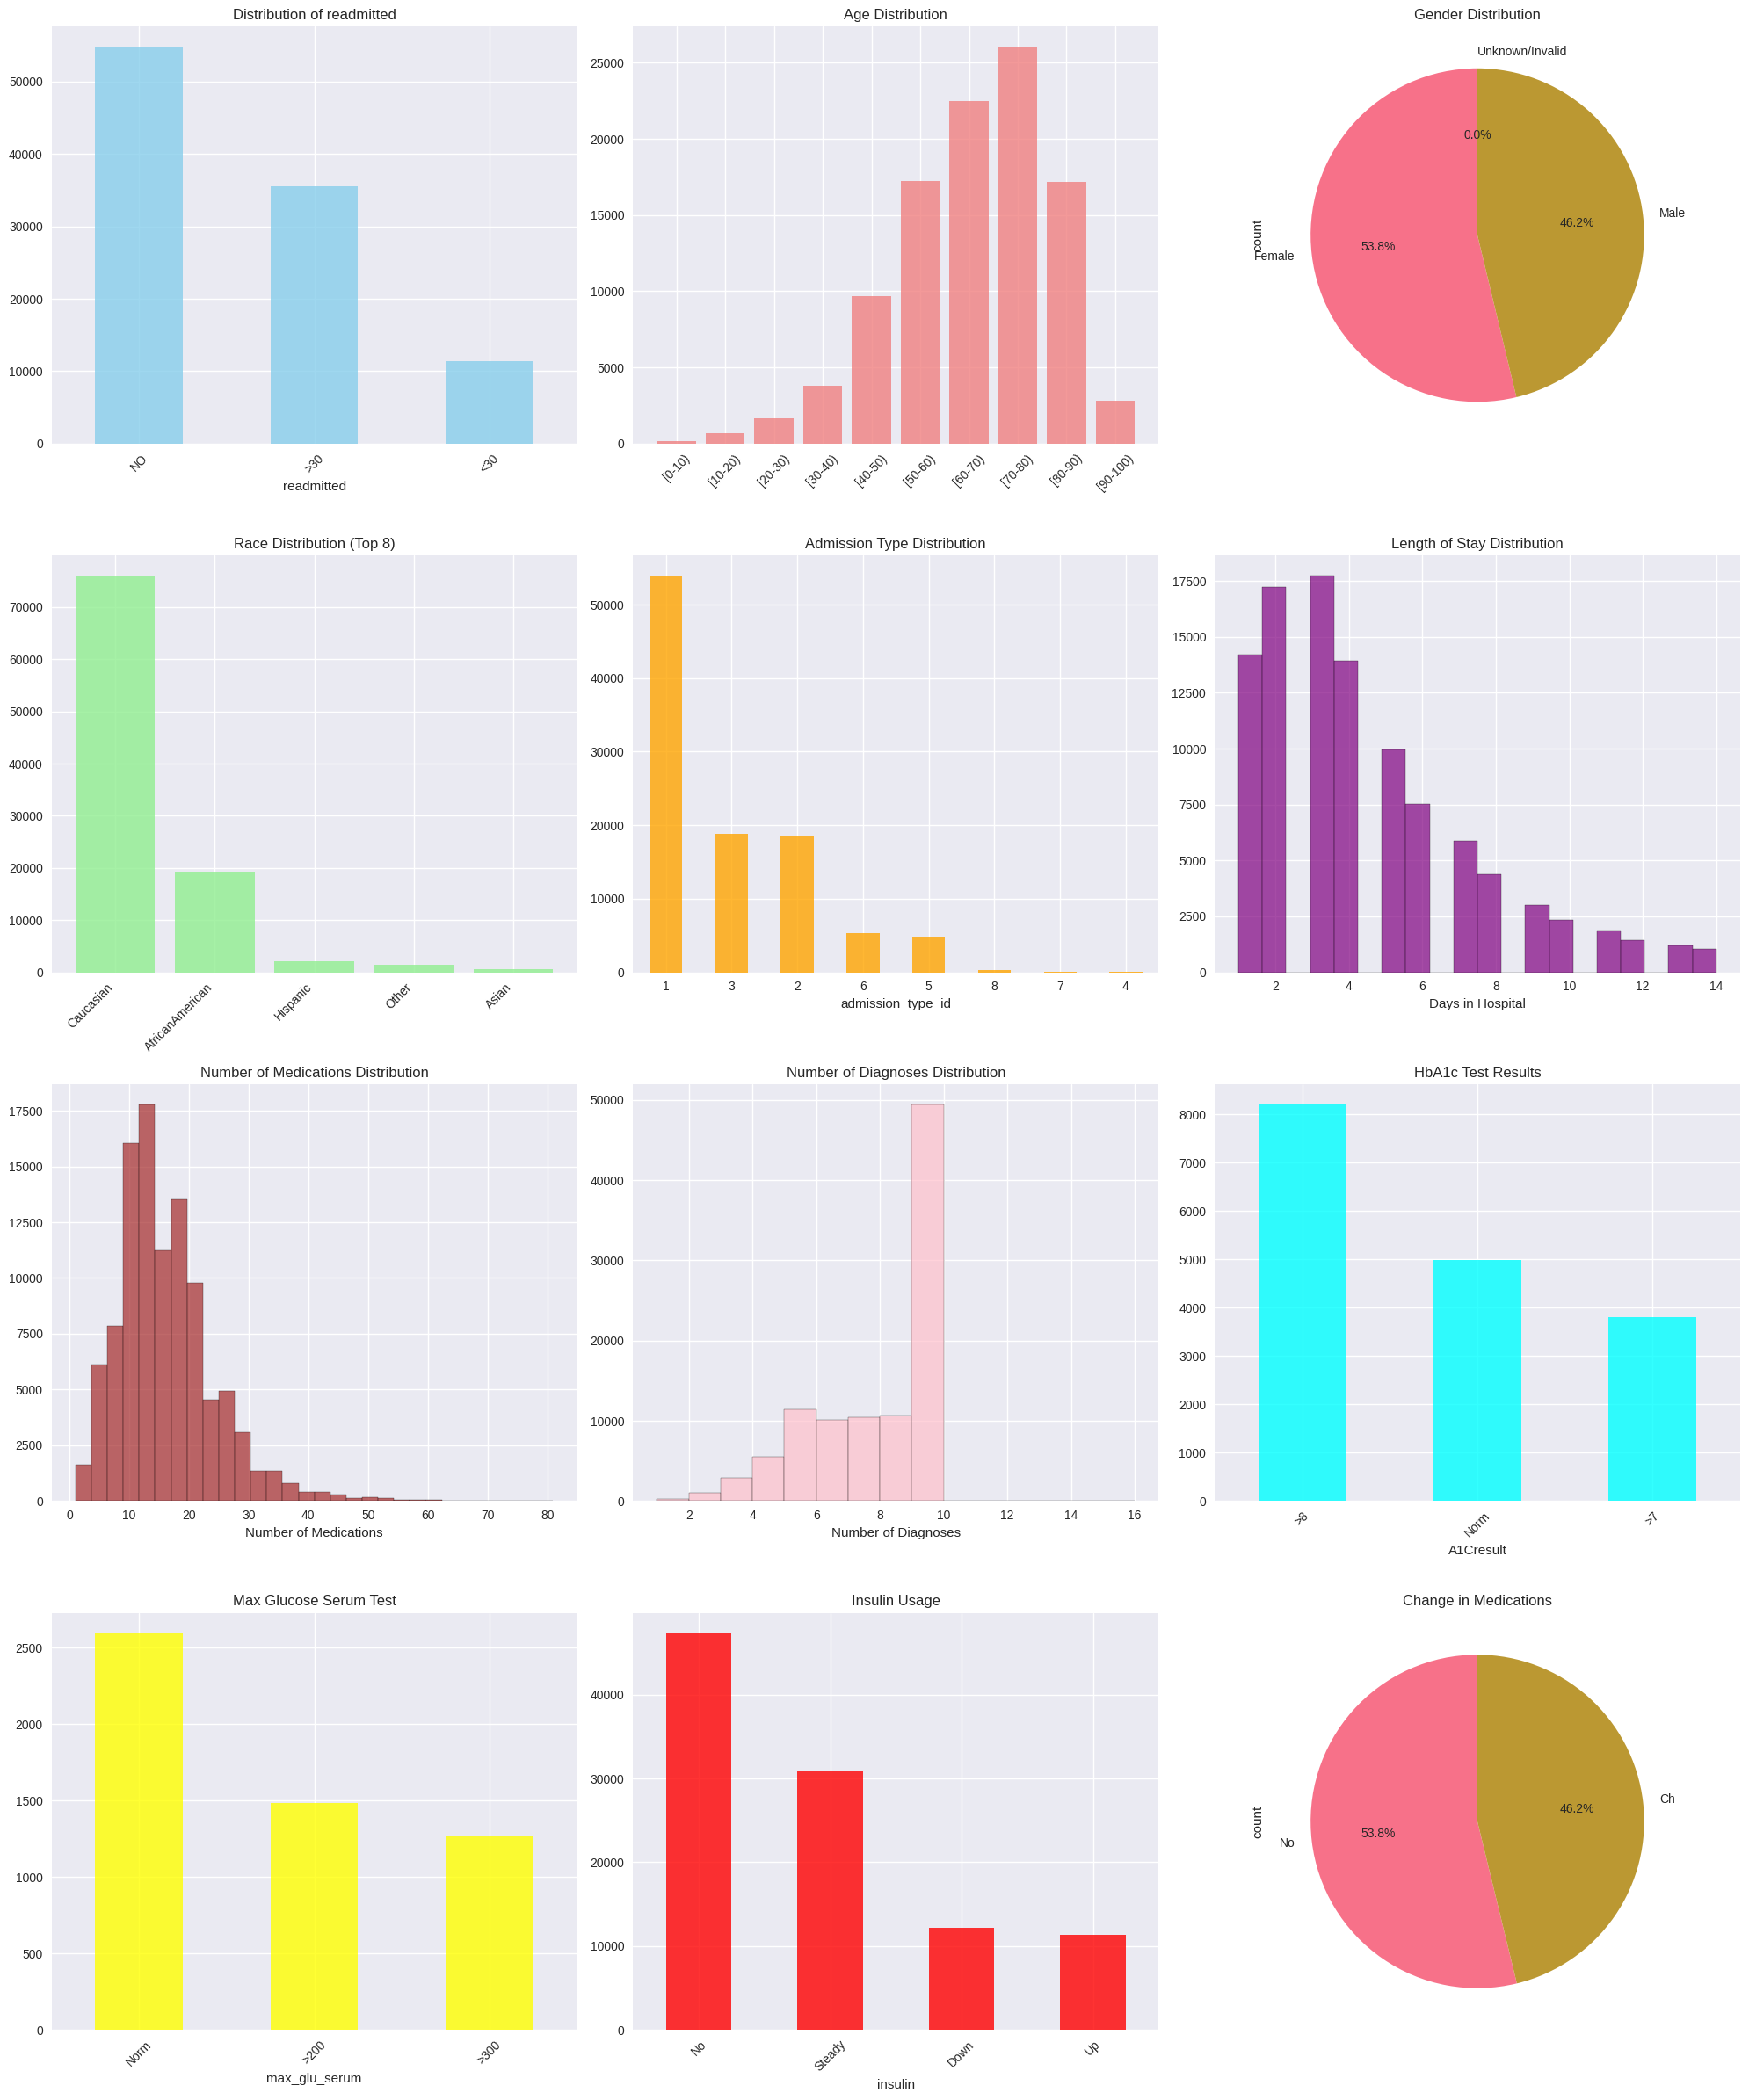

In [19]:
# Create visualizations
fig = plt.figure(figsize=(20, 24))

# 6.1 Target Distribution
print("6.1 Target Variable Distribution:")
plt.subplot(4, 3, 1)
if target_col in df.columns:
    df[target_col].value_counts().plot(kind='bar', color='skyblue', alpha=0.8)
    plt.title(f'Distribution of {target_col}')
    plt.xticks(rotation=45)

# 6.2 Age Distribution
plt.subplot(4, 3, 2)
if 'age' in df.columns:
    age_order = ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)',
                 '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']
    age_counts = df['age'].value_counts()
    # Reorder if age categories exist
    if any(age in age_counts.index for age in age_order):
        ordered_counts = []
        labels = []
        for age_range in age_order:
            if age_range in age_counts.index:
                ordered_counts.append(age_counts[age_range])
                labels.append(age_range)
        plt.bar(range(len(labels)), ordered_counts, color='lightcoral', alpha=0.8)
        plt.xticks(range(len(labels)), labels, rotation=45)
    else:
        df['age'].value_counts().plot(kind='bar', color='lightcoral', alpha=0.8)
        plt.xticks(rotation=45)
    plt.title('Age Distribution')

# 6.3 Gender Distribution
plt.subplot(4, 3, 3)
if 'gender' in df.columns:
    df['gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title('Gender Distribution')

# 6.4 Race Distribution
plt.subplot(4, 3, 4)
if 'race' in df.columns:
    race_counts = df['race'].value_counts().head(8)  # Top 8 races
    plt.bar(range(len(race_counts)), race_counts.values, color='lightgreen', alpha=0.8)
    plt.xticks(range(len(race_counts)), race_counts.index, rotation=45, ha='right')
    plt.title('Race Distribution (Top 8)')

# 6.5 Admission Type
plt.subplot(4, 3, 5)
if 'admission_type_id' in df.columns:
    df['admission_type_id'].value_counts().plot(kind='bar', color='orange', alpha=0.8)
    plt.title('Admission Type Distribution')
    plt.xticks(rotation=0)

# 6.6 Length of Stay
plt.subplot(4, 3, 6)
if 'time_in_hospital' in df.columns:
    plt.hist(df['time_in_hospital'], bins=20, color='purple', alpha=0.7, edgecolor='black')
    plt.title('Length of Stay Distribution')
    plt.xlabel('Days in Hospital')

# 6.7 Number of Medications
plt.subplot(4, 3, 7)
if 'num_medications' in df.columns:
    plt.hist(df['num_medications'], bins=30, color='brown', alpha=0.7, edgecolor='black')
    plt.title('Number of Medications Distribution')
    plt.xlabel('Number of Medications')

# 6.8 Number of Diagnoses
plt.subplot(4, 3, 8)
if 'number_diagnoses' in df.columns:
    plt.hist(df['number_diagnoses'], bins=15, color='pink', alpha=0.7, edgecolor='black')
    plt.title('Number of Diagnoses Distribution')
    plt.xlabel('Number of Diagnoses')

# 6.9 HbA1c Test Results
plt.subplot(4, 3, 9)
if 'A1Cresult' in df.columns:
    df['A1Cresult'].value_counts().plot(kind='bar', color='cyan', alpha=0.8)
    plt.title('HbA1c Test Results')
    plt.xticks(rotation=45)

# 6.10 Glucose Serum Test
plt.subplot(4, 3, 10)
if 'max_glu_serum' in df.columns:
    df['max_glu_serum'].value_counts().plot(kind='bar', color='yellow', alpha=0.8)
    plt.title('Max Glucose Serum Test')
    plt.xticks(rotation=45)

# 6.11 Insulin Usage
plt.subplot(4, 3, 11)
if 'insulin' in df.columns:
    df['insulin'].value_counts().plot(kind='bar', color='red', alpha=0.8)
    plt.title('Insulin Usage')
    plt.xticks(rotation=45)

# 6.12 Change in Medications
plt.subplot(4, 3, 12)
if 'change' in df.columns:
    df['change'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title('Change in Medications')

plt.tight_layout()
plt.show()

Numeric columns (11): ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']
Categorical columns (41): ['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted', 'diag_1_group', 'diag_2_group', 'diag_3_group', 'diag_combination']

Numeric Variable Distributions (11 variables):


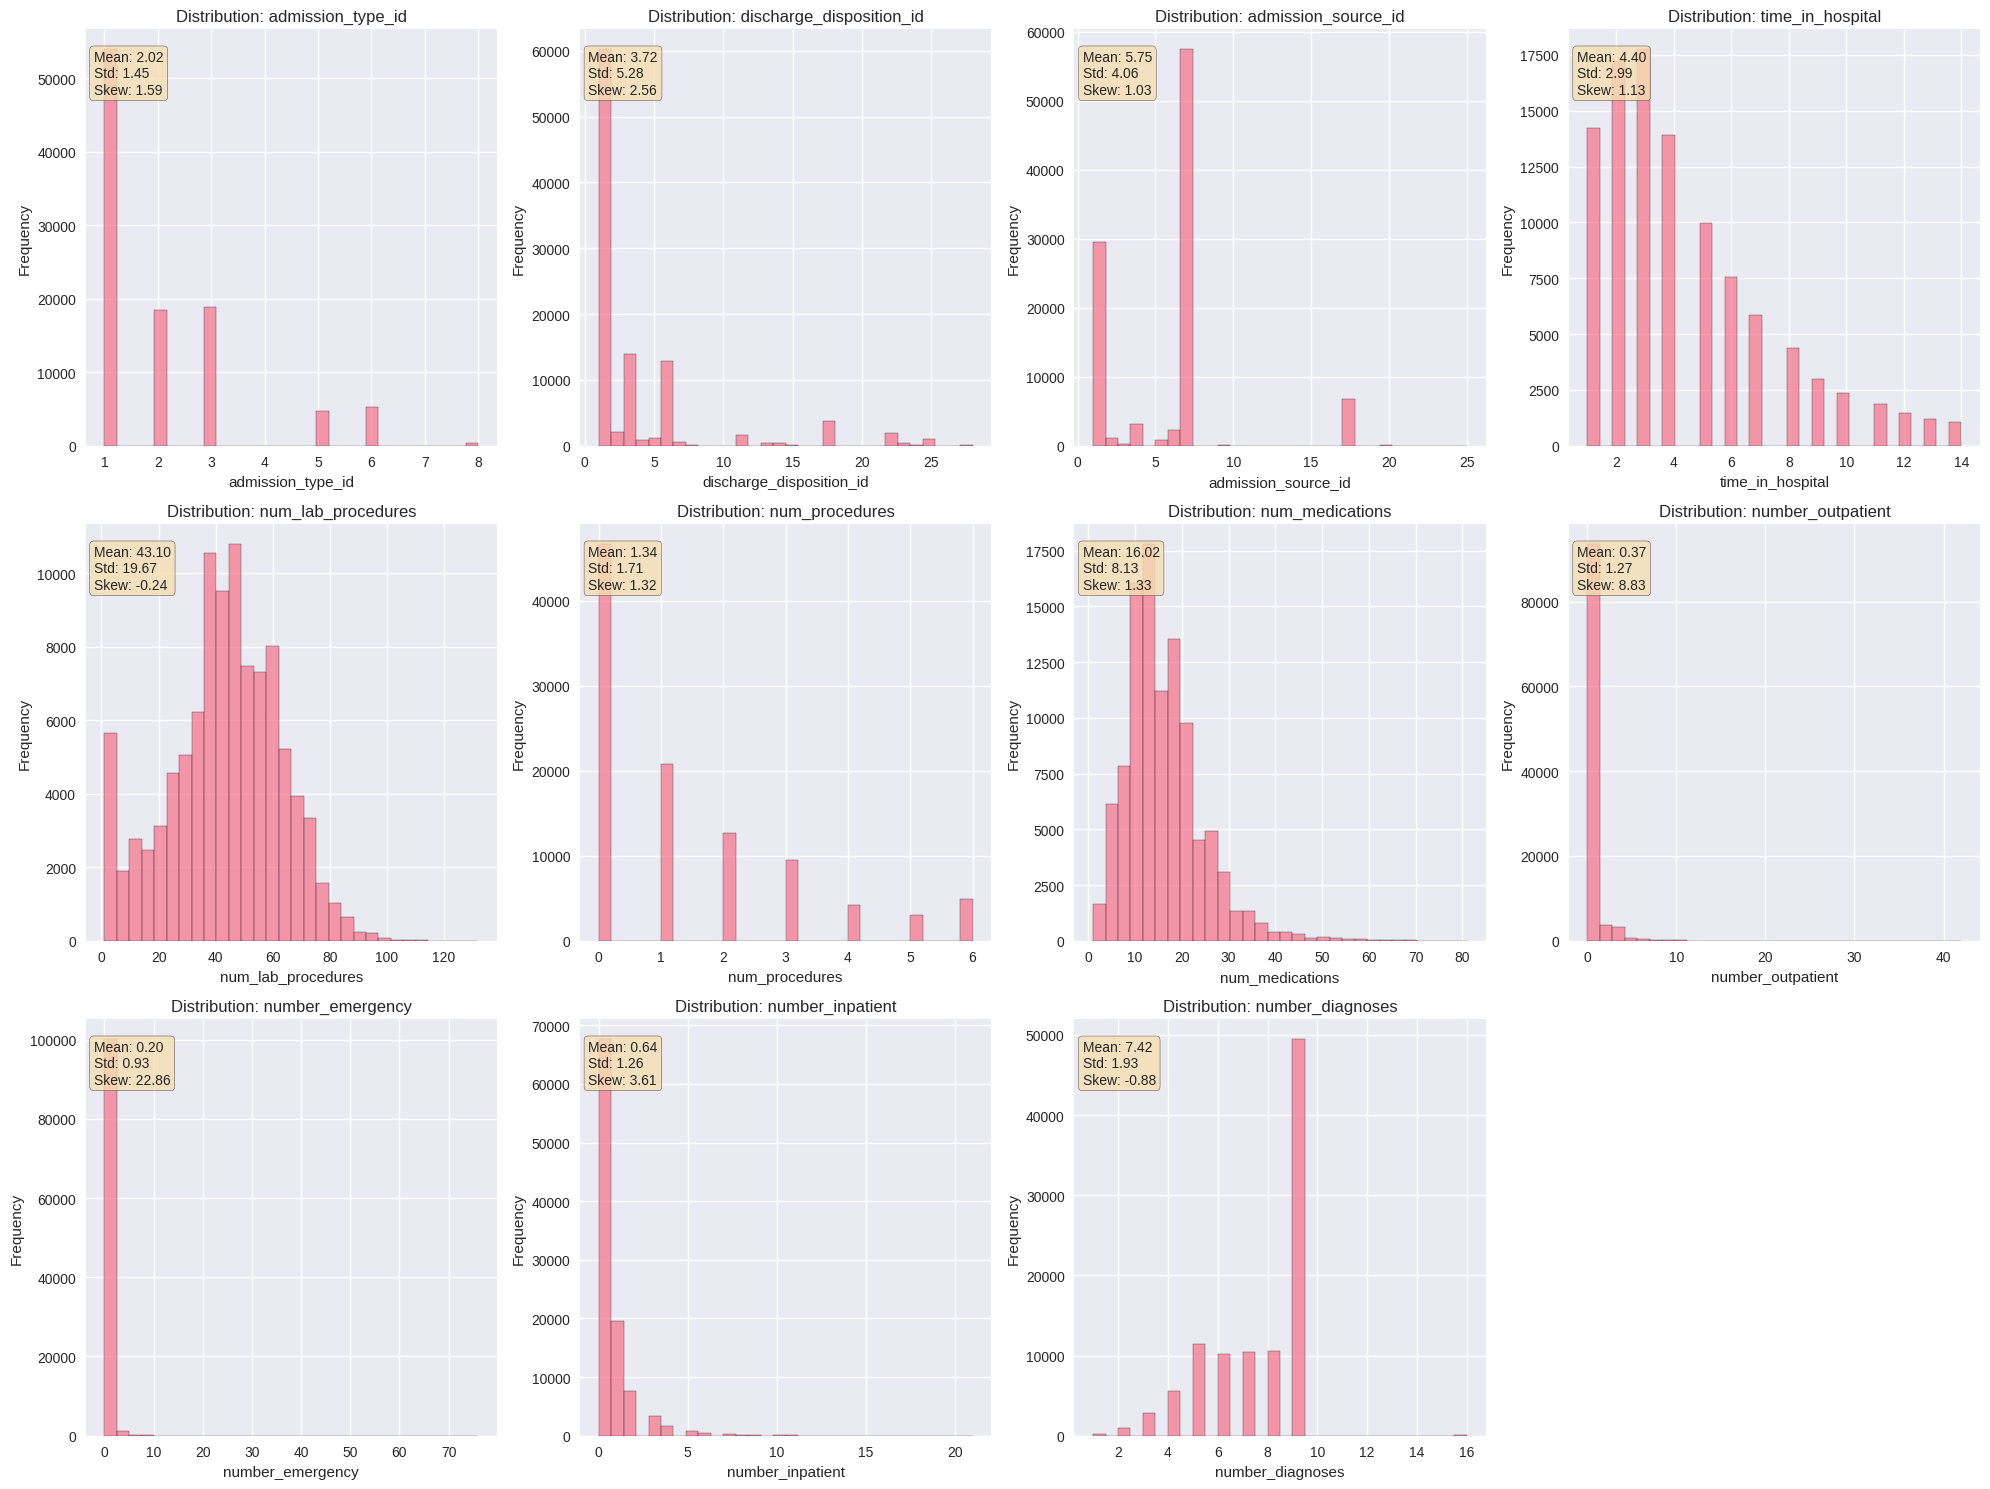


Categorical Variable Distributions (41 variables):


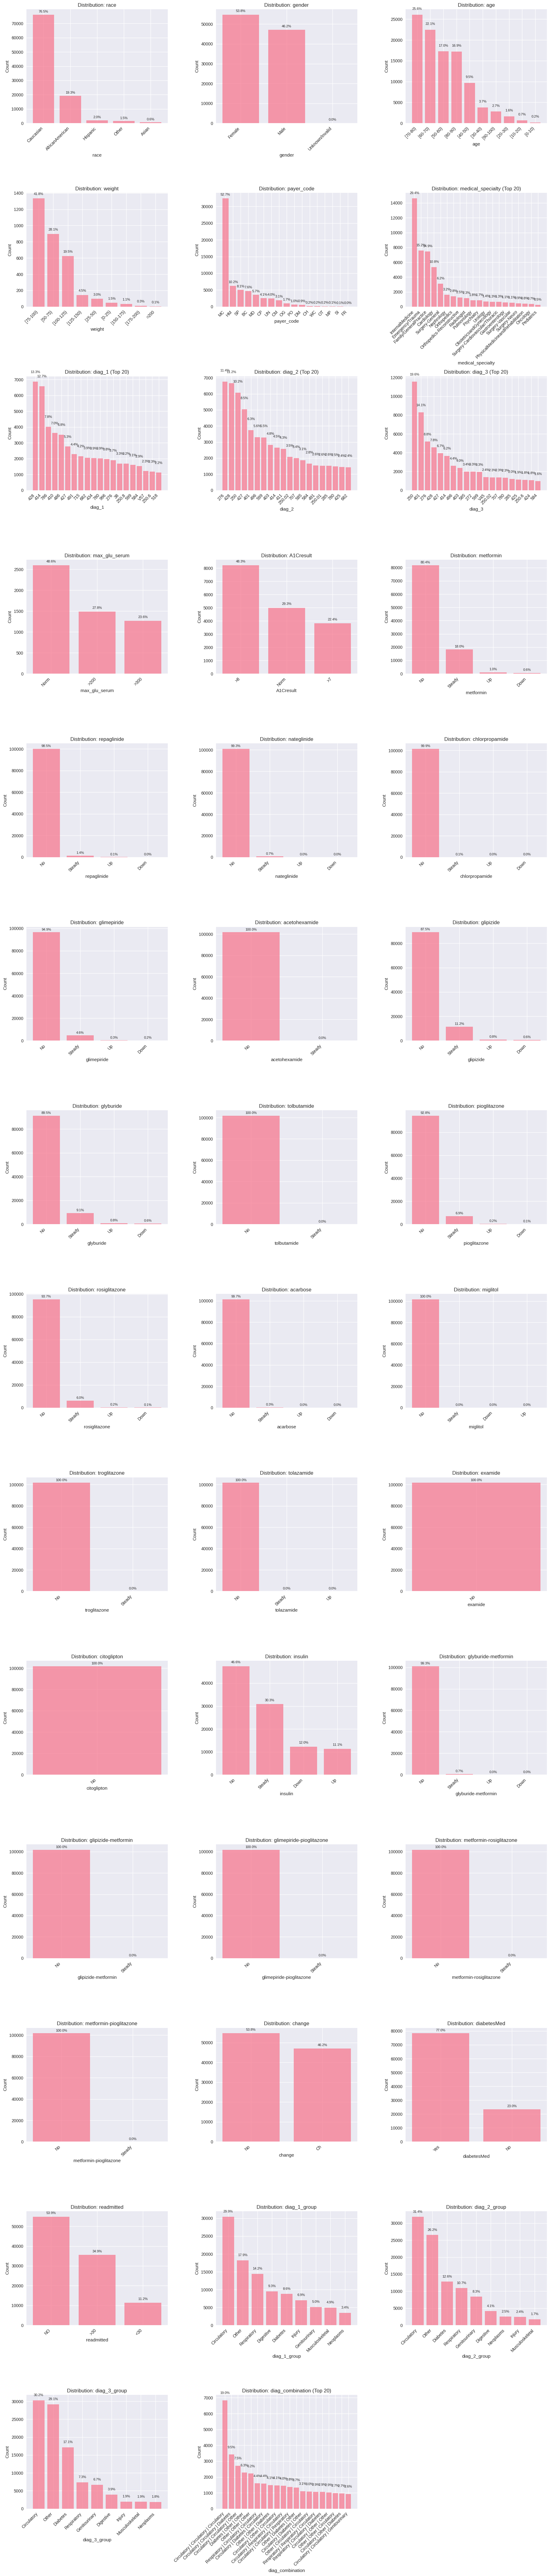


Numeric Variables Summary Statistics:
       admission_type_id  discharge_disposition_id  admission_source_id  \
count      101766.000000             101766.000000        101766.000000   
mean            2.024006                  3.715642             5.754437   
std             1.445403                  5.280166             4.064081   
min             1.000000                  1.000000             1.000000   
25%             1.000000                  1.000000             1.000000   
50%             1.000000                  1.000000             7.000000   
75%             3.000000                  4.000000             7.000000   
max             8.000000                 28.000000            25.000000   

       time_in_hospital  num_lab_procedures  num_procedures  num_medications  \
count     101766.000000       101766.000000   101766.000000    101766.000000   
mean           4.395987           43.095641        1.339730        16.021844   
std            2.985108           19.674362  

In [31]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Numeric columns ({len(numeric_cols)}): {numeric_cols}")
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")

# Function to plot numeric distributions
def plot_numeric_distributions(data, cols, title_prefix=""):
    n_cols = min(4, len(cols))
    n_rows = (len(cols) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)

    for i, col in enumerate(cols):
        row, col_idx = divmod(i, n_cols)
        ax = axes[row, col_idx]

        # Remove missing values for plotting
        clean_data = data[col].dropna()

        if len(clean_data) > 0:
            ax.hist(clean_data, bins=30, alpha=0.7, edgecolor='black')
            ax.set_title(f'{title_prefix}{col}')
            ax.set_xlabel(col)
            ax.set_ylabel('Frequency')

            # Add statistics
            ax.text(0.02, 0.95, f'Mean: {clean_data.mean():.2f}\nStd: {clean_data.std():.2f}\nSkew: {clean_data.skew():.2f}',
                   transform=ax.transAxes, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    # Remove empty subplots
    for i in range(len(cols), n_rows * n_cols):
        row, col_idx = divmod(i, n_cols)
        fig.delaxes(axes[row, col_idx])

    plt.tight_layout()
    plt.show()

# Function to plot categorical distributions
def plot_categorical_distributions(data, cols, title_prefix="", max_categories=20):
    n_cols = min(3, len(cols))
    n_rows = (len(cols) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6*n_rows))
    if n_rows == 1 and n_cols > 1:
        axes = axes.reshape(1, -1)
    elif n_rows == 1 and n_cols == 1:
        axes = np.array([axes])

    for i, col in enumerate(cols):
        row, col_idx = divmod(i, n_cols) if n_cols > 1 else (0, 0)
        ax = axes[row, col_idx] if n_cols > 1 or n_rows > 1 else axes[0]

        # Get value counts
        value_counts = data[col].value_counts()

        # If too many categories, show top categories
        if len(value_counts) > max_categories:
            value_counts = value_counts.head(max_categories)
            title_suffix = f" (Top {max_categories})"
        else:
            title_suffix = ""

        # Create bar plot
        if len(value_counts) > 0:
            bars = ax.bar(range(len(value_counts)), value_counts.values, alpha=0.7)
            ax.set_title(f'{title_prefix}{col}{title_suffix}')
            ax.set_xlabel(col)
            ax.set_ylabel('Count')

            # Set x-tick labels
            ax.set_xticks(range(len(value_counts)))
            ax.set_xticklabels(value_counts.index, rotation=45, ha='right')

            # Add percentage labels on bars
            total = value_counts.sum()
            for j, bar in enumerate(bars):
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height + total*0.01,
                       f'{height/total*100:.1f}%', ha='center', va='bottom', fontsize=8)

    # Remove empty subplots
    total_subplots = n_rows * n_cols if n_cols > 1 else n_rows
    for i in range(len(cols), total_subplots):
        if n_cols > 1 or n_rows > 1:
            row, col_idx = divmod(i, n_cols) if n_cols > 1 else (i, 0)
            fig.delaxes(axes[row, col_idx] if n_cols > 1 or n_rows > 1 else axes[i])

    plt.tight_layout()
    plt.show()

# Plot numeric distributions
if numeric_cols:
    print(f"\nNumeric Variable Distributions ({len(numeric_cols)} variables):")
    plot_numeric_distributions(df, numeric_cols, "Distribution: ")

# Plot categorical distributions
if categorical_cols:
    print(f"\nCategorical Variable Distributions ({len(categorical_cols)} variables):")
    plot_categorical_distributions(df, categorical_cols, "Distribution: ")

# Summary statistics for numeric variables
if numeric_cols:
    print("\nNumeric Variables Summary Statistics:")
    print(df[numeric_cols].describe())

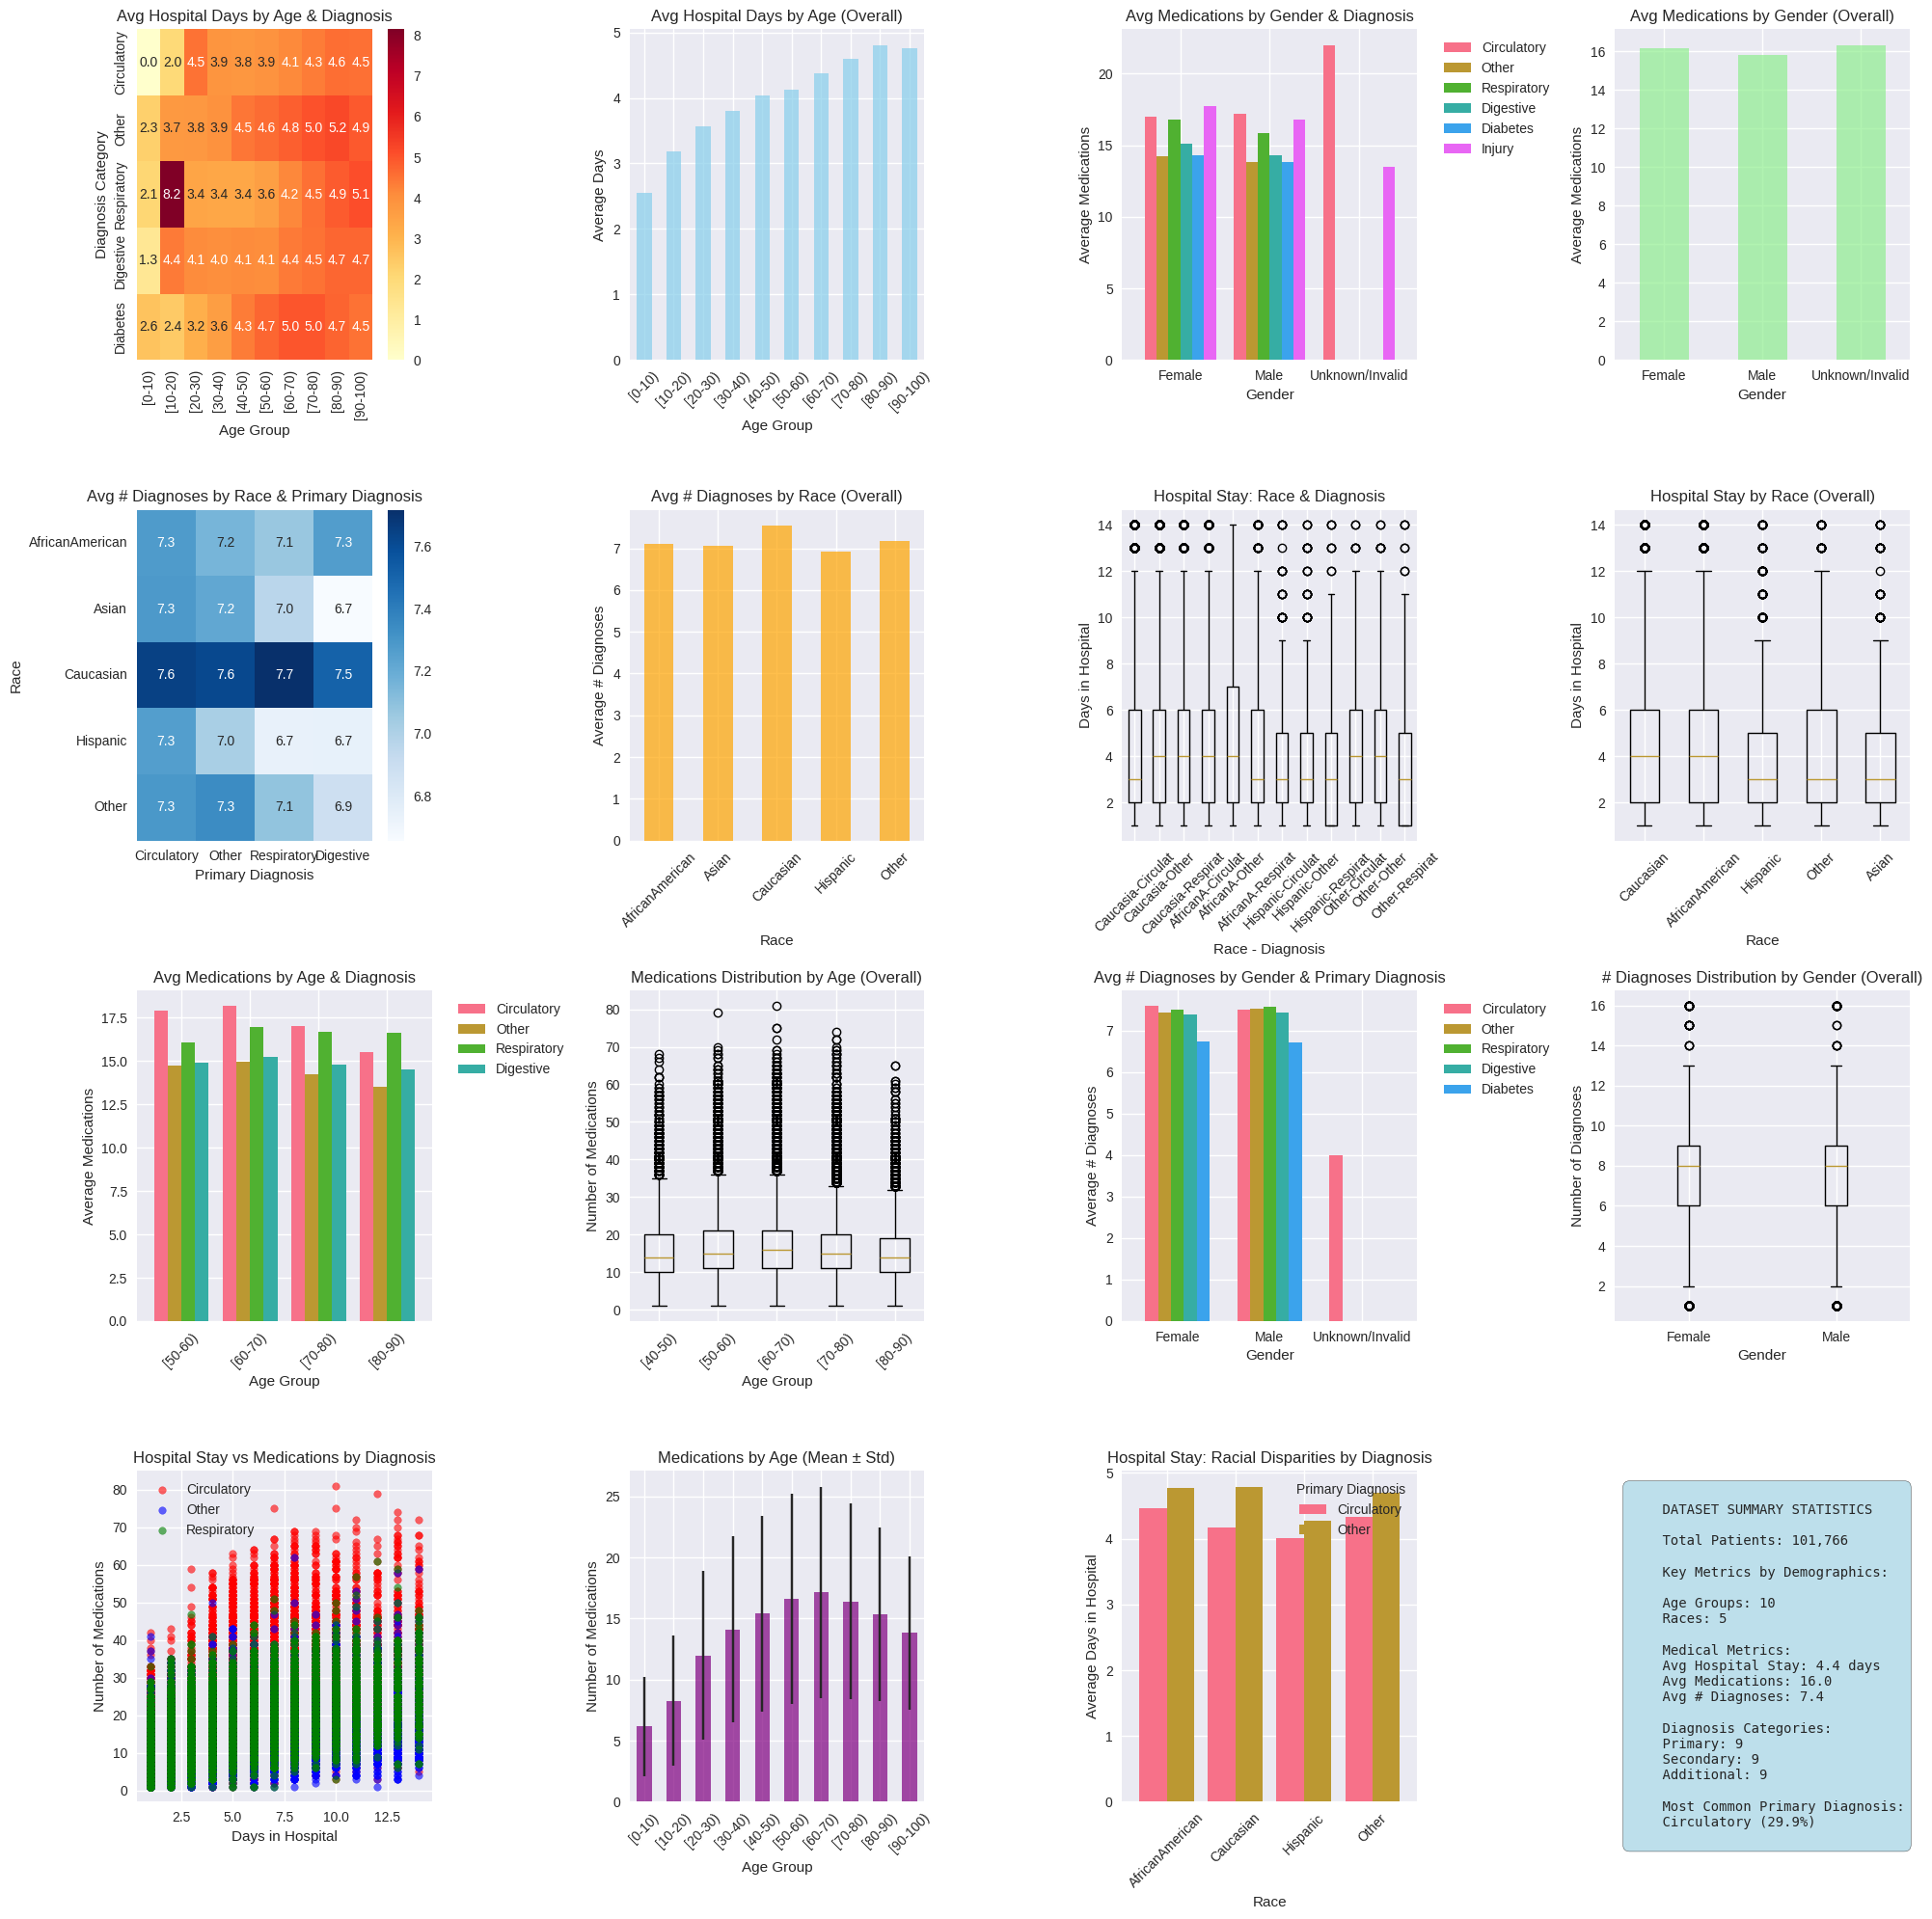

In [20]:
# DEMOGRAPHIC & MEDICAL CHARACTERISTICS BY DIAGNOSIS
if 'diag_1_group' in df.columns:
    # Create comprehensive analysis charts
    fig, axes = plt.subplots(4, 4, figsize=(20, 20))

    # 1. Time in hospital by Age and Diagnosis
    if 'time_in_hospital' in df.columns and 'age' in df.columns:
        ax = axes[0, 0]
        age_hospital_diag = df.pivot_table(values='time_in_hospital',
                                         index='age',
                                         columns='diag_1_group',
                                         aggfunc='mean').fillna(0)

        # Select top 5 diagnoses for clarity
        top_diag = df['diag_1_group'].value_counts().head(5).index
        age_hospital_subset = age_hospital_diag[top_diag]

        sns.heatmap(age_hospital_subset.T, annot=True, fmt='.1f', cmap='YlOrRd', ax=ax)
        ax.set_title('Avg Hospital Days by Age & Diagnosis')
        ax.set_xlabel('Age Group')
        ax.set_ylabel('Diagnosis Category')

    # 2. Time in hospital by Age (no diagnosis grouping)
    if 'time_in_hospital' in df.columns and 'age' in df.columns:
        ax = axes[0, 1]
        age_hospital = df.groupby('age')['time_in_hospital'].mean()
        age_hospital.plot(kind='bar', ax=ax, color='skyblue', alpha=0.7)
        ax.set_title('Avg Hospital Days by Age (Overall)')
        ax.set_xlabel('Age Group')
        ax.set_ylabel('Average Days')
        ax.tick_params(axis='x', rotation=45)

    # 3. Medications by Gender and Diagnosis
    if 'num_medications' in df.columns and 'gender' in df.columns:
        ax = axes[0, 2]
        gender_med_diag = df.pivot_table(values='num_medications',
                                       index='gender',
                                       columns='diag_1_group',
                                       aggfunc='mean').fillna(0)

        top_diag_meds = df['diag_1_group'].value_counts().head(6).index
        gender_med_subset = gender_med_diag[top_diag_meds]

        gender_med_subset.plot(kind='bar', ax=ax, width=0.8)
        ax.set_title('Avg Medications by Gender & Diagnosis')
        ax.set_xlabel('Gender')
        ax.set_ylabel('Average Medications')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.tick_params(axis='x', rotation=0)

    # 4. Medications by Gender (no diagnosis grouping)
    if 'num_medications' in df.columns and 'gender' in df.columns:
        ax = axes[0, 3]
        gender_med = df.groupby('gender')['num_medications'].mean()
        gender_med.plot(kind='bar', ax=ax, color='lightgreen', alpha=0.7)
        ax.set_title('Avg Medications by Gender (Overall)')
        ax.set_xlabel('Gender')
        ax.set_ylabel('Average Medications')
        ax.tick_params(axis='x', rotation=0)

    # 5. Number of diagnoses by Race and Primary Diagnosis
    if 'number_diagnoses' in df.columns and 'race' in df.columns:
        ax = axes[1, 0]
        # Focus on top races to avoid overcrowding
        top_races = df['race'].value_counts().head(5).index
        df_race_subset = df[df['race'].isin(top_races)]

        race_numdiag_diag = df_race_subset.pivot_table(values='number_diagnoses',
                                                     index='race',
                                                     columns='diag_1_group',
                                                     aggfunc='mean').fillna(0)

        top_diag_race = df['diag_1_group'].value_counts().head(4).index
        race_numdiag_subset = race_numdiag_diag[top_diag_race]

        sns.heatmap(race_numdiag_subset, annot=True, fmt='.1f', cmap='Blues', ax=ax)
        ax.set_title('Avg # Diagnoses by Race & Primary Diagnosis')
        ax.set_xlabel('Primary Diagnosis')
        ax.set_ylabel('Race')

    # 6. Number of diagnoses by Race (no diagnosis grouping)
    if 'number_diagnoses' in df.columns and 'race' in df.columns:
        ax = axes[1, 1]
        top_races = df['race'].value_counts().head(8).index
        race_numdiag = df[df['race'].isin(top_races)].groupby('race')['number_diagnoses'].mean()
        race_numdiag.plot(kind='bar', ax=ax, color='orange', alpha=0.7)
        ax.set_title('Avg # Diagnoses by Race (Overall)')
        ax.set_xlabel('Race')
        ax.set_ylabel('Average # Diagnoses')
        ax.tick_params(axis='x', rotation=45)

    # 7. Hospital stay by Race and Diagnosis
    if 'time_in_hospital' in df.columns and 'race' in df.columns:
        ax = axes[1, 2]
        top_races = df['race'].value_counts().head(4).index
        df_race_subset = df[df['race'].isin(top_races)]

        # Box plot by race and diagnosis
        race_diag_data = []
        race_diag_labels = []

        for race in top_races:
            for diag in df['diag_1_group'].value_counts().head(3).index:
                subset = df_race_subset[(df_race_subset['race'] == race) &
                                      (df_race_subset['diag_1_group'] == diag)]['time_in_hospital']
                if len(subset) > 5:
                    race_diag_data.append(subset.values)
                    race_diag_labels.append(f"{race[:8]}-{diag[:8]}")

        if race_diag_data:
            ax.boxplot(race_diag_data, labels=race_diag_labels)
            ax.set_title('Hospital Stay: Race & Diagnosis')
            ax.set_xlabel('Race - Diagnosis')
            ax.set_ylabel('Days in Hospital')
            ax.tick_params(axis='x', rotation=45)

    # 8. Hospital stay by Race (no diagnosis grouping)
    if 'time_in_hospital' in df.columns and 'race' in df.columns:
        ax = axes[1, 3]
        top_races = df['race'].value_counts().head(6).index
        race_hospital_data = []
        race_labels = []

        for race in top_races:
            subset = df[df['race'] == race]['time_in_hospital']
            if len(subset) > 10:
                race_hospital_data.append(subset.values)
                race_labels.append(race)

        if race_hospital_data:
            ax.boxplot(race_hospital_data, labels=race_labels)
            ax.set_title('Hospital Stay by Race (Overall)')
            ax.set_xlabel('Race')
            ax.set_ylabel('Days in Hospital')
            ax.tick_params(axis='x', rotation=45)

    # 9. Medications by Age Group and Diagnosis
    if 'num_medications' in df.columns and 'age' in df.columns:
        ax = axes[2, 0]
        # Select specific age groups for clarity
        key_ages = ['[50-60)', '[60-70)', '[70-80)', '[80-90)']
        available_ages = [age for age in key_ages if age in df['age'].unique()]

        if available_ages:
            df_age_subset = df[df['age'].isin(available_ages)]
            age_med_diag = df_age_subset.pivot_table(values='num_medications',
                                                   index='age',
                                                   columns='diag_1_group',
                                                   aggfunc='mean').fillna(0)

            top_diag_age = df['diag_1_group'].value_counts().head(4).index
            age_med_subset = age_med_diag[top_diag_age]

            age_med_subset.plot(kind='bar', ax=ax, width=0.8)
            ax.set_title('Avg Medications by Age & Diagnosis')
            ax.set_xlabel('Age Group')
            ax.set_ylabel('Average Medications')
            ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
            ax.tick_params(axis='x', rotation=45)

    # 10. Medications distribution by Age (no diagnosis grouping)
    if 'num_medications' in df.columns and 'age' in df.columns:
        ax = axes[2, 1]
        age_med_data = []
        age_labels = []

        key_ages = ['[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)']
        available_ages = [age for age in key_ages if age in df['age'].unique()]

        for age in available_ages:
            subset = df[df['age'] == age]['num_medications']
            if len(subset) > 20:
                age_med_data.append(subset.values)
                age_labels.append(age)

        if age_med_data:
            ax.boxplot(age_med_data, labels=age_labels)
            ax.set_title('Medications Distribution by Age (Overall)')
            ax.set_xlabel('Age Group')
            ax.set_ylabel('Number of Medications')
            ax.tick_params(axis='x', rotation=45)

    # 11. Diagnosis count patterns by Gender and Primary Diagnosis
    if 'number_diagnoses' in df.columns and 'gender' in df.columns:
        ax = axes[2, 2]
        gender_numdiag_diag = df.pivot_table(values='number_diagnoses',
                                           index='gender',
                                           columns='diag_1_group',
                                           aggfunc='mean').fillna(0)

        top_diag_gender = df['diag_1_group'].value_counts().head(5).index
        gender_numdiag_subset = gender_numdiag_diag[top_diag_gender]

        gender_numdiag_subset.plot(kind='bar', ax=ax, width=0.7)
        ax.set_title('Avg # Diagnoses by Gender & Primary Diagnosis')
        ax.set_xlabel('Gender')
        ax.set_ylabel('Average # Diagnoses')
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        ax.tick_params(axis='x', rotation=0)

    # 12. Diagnosis count by Gender (no diagnosis grouping)
    if 'number_diagnoses' in df.columns and 'gender' in df.columns:
        ax = axes[2, 3]
        gender_numdiag_data = []
        gender_labels = []

        for gender in df['gender'].unique():
            if pd.notna(gender):
                subset = df[df['gender'] == gender]['number_diagnoses']
                if len(subset) > 50:
                    gender_numdiag_data.append(subset.values)
                    gender_labels.append(gender)

        if gender_numdiag_data:
            ax.boxplot(gender_numdiag_data, labels=gender_labels)
            ax.set_title('# Diagnoses Distribution by Gender (Overall)')
            ax.set_xlabel('Gender')
            ax.set_ylabel('Number of Diagnoses')

    # 13. Combined analysis: Time vs Medications by Diagnosis
    if 'time_in_hospital' in df.columns and 'num_medications' in df.columns:
        ax = axes[3, 0]

        # Create scatter plot colored by diagnosis
        top_3_diag = df['diag_1_group'].value_counts().head(3).index
        colors = ['red', 'blue', 'green']

        for i, diag in enumerate(top_3_diag):
            subset = df[df['diag_1_group'] == diag]
            if len(subset) > 20:
                ax.scatter(subset['time_in_hospital'], subset['num_medications'],
                         alpha=0.6, color=colors[i], label=diag, s=30)

        ax.set_title('Hospital Stay vs Medications by Diagnosis')
        ax.set_xlabel('Days in Hospital')
        ax.set_ylabel('Number of Medications')
        ax.legend()

    # 14. Age group medication patterns
    if 'num_medications' in df.columns and 'age' in df.columns:
        ax = axes[3, 1]
        age_med_stats = df.groupby('age')['num_medications'].agg(['mean', 'std']).fillna(0)

        age_med_stats['mean'].plot(kind='bar', ax=ax, yerr=age_med_stats['std'],
                                 color='purple', alpha=0.7, capsize=4)
        ax.set_title('Medications by Age (Mean ± Std)')
        ax.set_xlabel('Age Group')
        ax.set_ylabel('Number of Medications')
        ax.tick_params(axis='x', rotation=45)

    # 15. Racial disparities in hospital stay by diagnosis
    if 'time_in_hospital' in df.columns and 'race' in df.columns:
        ax = axes[3, 2]

        # Focus on top 2 diagnoses and top 4 races
        top_2_diag = df['diag_1_group'].value_counts().head(2).index
        top_4_races = df['race'].value_counts().head(4).index

        race_hospital_diag = df[df['race'].isin(top_4_races)].pivot_table(
            values='time_in_hospital',
            index='race',
            columns='diag_1_group',
            aggfunc='mean'
        ).fillna(0)

        race_hospital_subset = race_hospital_diag[top_2_diag]
        race_hospital_subset.plot(kind='bar', ax=ax, width=0.8)
        ax.set_title('Hospital Stay: Racial Disparities by Diagnosis')
        ax.set_xlabel('Race')
        ax.set_ylabel('Average Days in Hospital')
        ax.legend(title='Primary Diagnosis')
        ax.tick_params(axis='x', rotation=45)

    # 16. Overall summary statistics
    ax = axes[3, 3]
    ax.axis('off')

    # Create summary text
    summary_text = f"""
    DATASET SUMMARY STATISTICS

    Total Patients: {len(df):,}

    Key Metrics by Demographics:

    Age Groups: {df['age'].nunique() if 'age' in df.columns else 'N/A'}
    Races: {df['race'].nunique() if 'race' in df.columns else 'N/A'}

    Medical Metrics:
    Avg Hospital Stay: {df['time_in_hospital'].mean():.1f} days
    Avg Medications: {df['num_medications'].mean():.1f}
    Avg # Diagnoses: {df['number_diagnoses'].mean():.1f}

    Diagnosis Categories:
    Primary: {df['diag_1_group'].nunique()}
    Secondary: {df['diag_2_group'].nunique() if 'diag_2_group' in df.columns else 'N/A'}
    Additional: {df['diag_3_group'].nunique() if 'diag_3_group' in df.columns else 'N/A'}

    Most Common Primary Diagnosis:
    {df['diag_1_group'].mode()[0]} ({(df['diag_1_group'].value_counts().iloc[0]/len(df)*100):.1f}%)
    """

    ax.text(0.05, 0.95, summary_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))

    plt.tight_layout()
    plt.show()

In [21]:
# DIAGNOSIS PATTERN ANALYSIS
if 'diag_1_group' in df.columns:
    primary_diag_counts = df['diag_1_group'].value_counts()
    print("Primary Diagnosis Distribution:")
    for diag, count in primary_diag_counts.items():
        pct = (count / len(df)) * 100
        print(f"• {diag}: {count:,} patients ({pct:.1f}%)")

    # Additional diagnosis analysis
    if 'diag_2_group' in df.columns and 'diag_3_group' in df.columns:
        print(f"\nDiagnosis Position Comparison:")
        diag_comparison = pd.DataFrame({
            'Primary': df['diag_1_group'].value_counts(),
            'Secondary': df['diag_2_group'].value_counts(),
            'Additional': df['diag_3_group'].value_counts()
        }).fillna(0)

        print(diag_comparison.head())

Primary Diagnosis Distribution:
• Circulatory: 30,437 patients (29.9%)
• Other: 18,172 patients (17.9%)
• Respiratory: 14,423 patients (14.2%)
• Digestive: 9,475 patients (9.3%)
• Diabetes: 8,757 patients (8.6%)
• Injury: 6,974 patients (6.9%)
• Genitourinary: 5,117 patients (5.0%)
• Musculoskeletal: 4,957 patients (4.9%)
• Neoplasms: 3,433 patients (3.4%)

Diagnosis Position Comparison:
               Primary  Secondary  Additional
Circulatory      30437      31881       30306
Diabetes          8757      12794       17157
Digestive         9475       4170        3930
Genitourinary     5117       8376        6680
Injury            6974       2428        1946


Total records with valid age and diag_1_group: 101,745
Unique age groups: 10
Unique primary diagnoses: 9

Age groups: ['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']

Top 5 diagnoses analysis:
Total unique diagnoses appearing in top 5: 7

Age Group [0-10) (161 patients):
  1. Diabetes: 136 patients (84.5%)
  2. Other: 11 patients (6.8%)
  3. Respiratory: 10 patients (6.2%)
  4. Digestive: 3 patients (1.9%)
  5. Genitourinary: 1 patients (0.6%)

Age Group [10-20) (691 patients):
  1. Diabetes: 475 patients (68.7%)
  2. Other: 105 patients (15.2%)
  3. Respiratory: 45 patients (6.5%)
  4. Injury: 27 patients (3.9%)
  5. Digestive: 16 patients (2.3%)

Age Group [20-30) (1,656 patients):
  1. Diabetes: 679 patients (41.0%)
  2. Other: 572 patients (34.5%)
  3. Digestive: 131 patients (7.9%)
  4. Respiratory: 76 patients (4.6%)
  5. Genitourinary: 61 patients (3.7%)

Age Group [30-40) (3,775 patients):
  1. Other: 1,202 patients

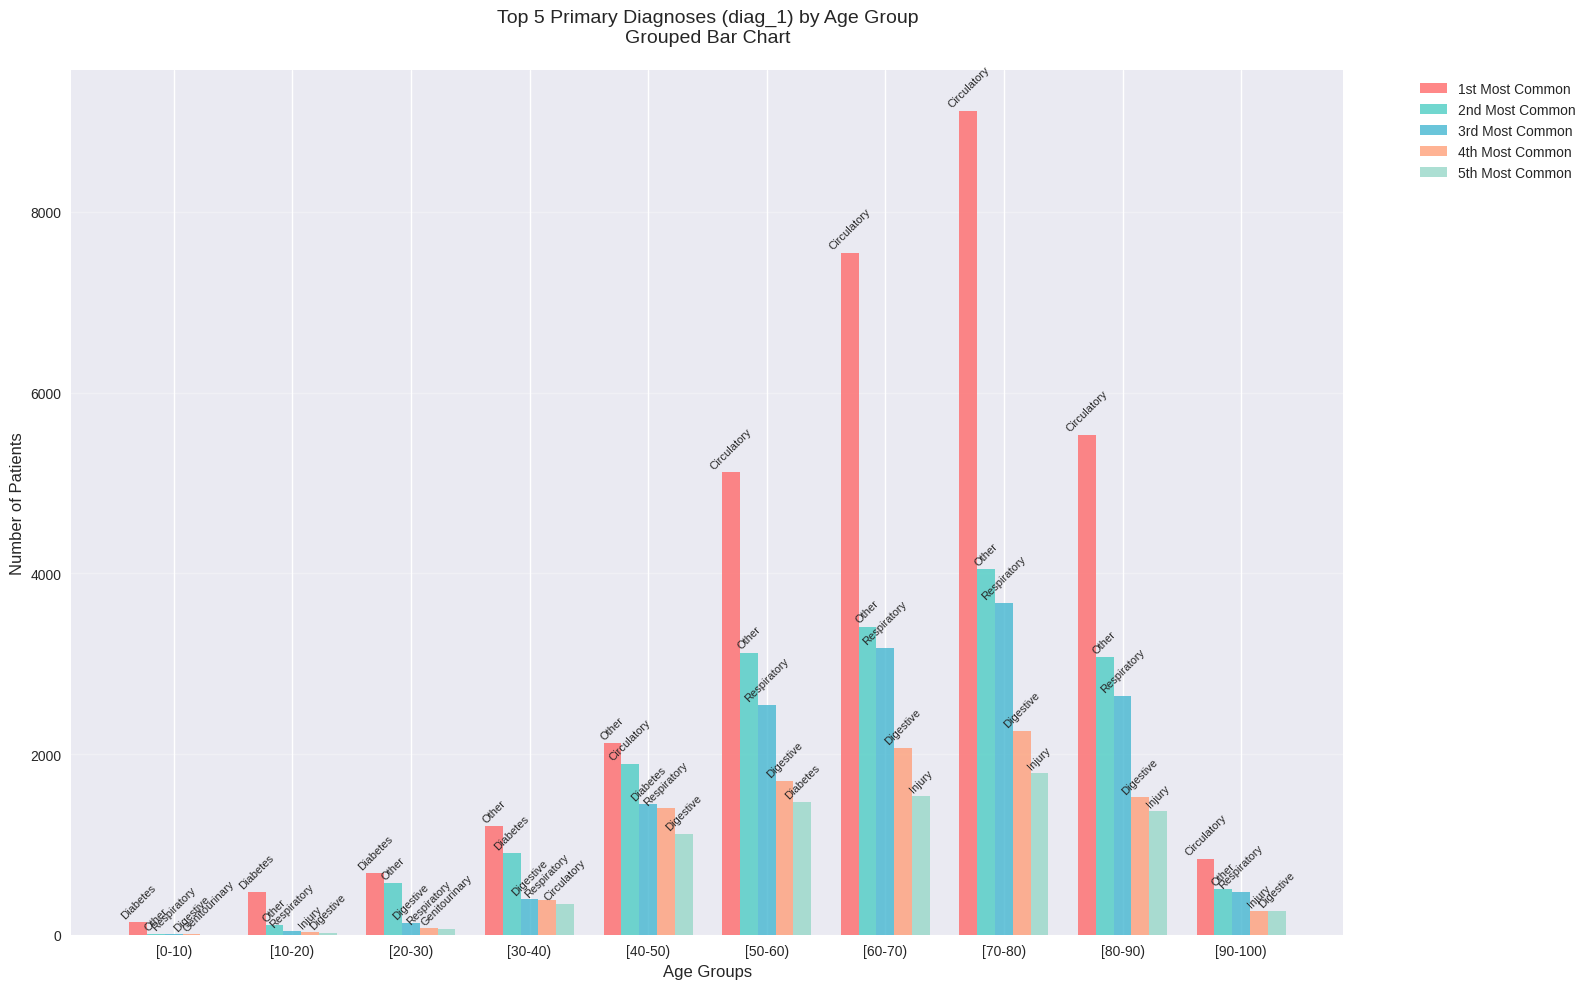

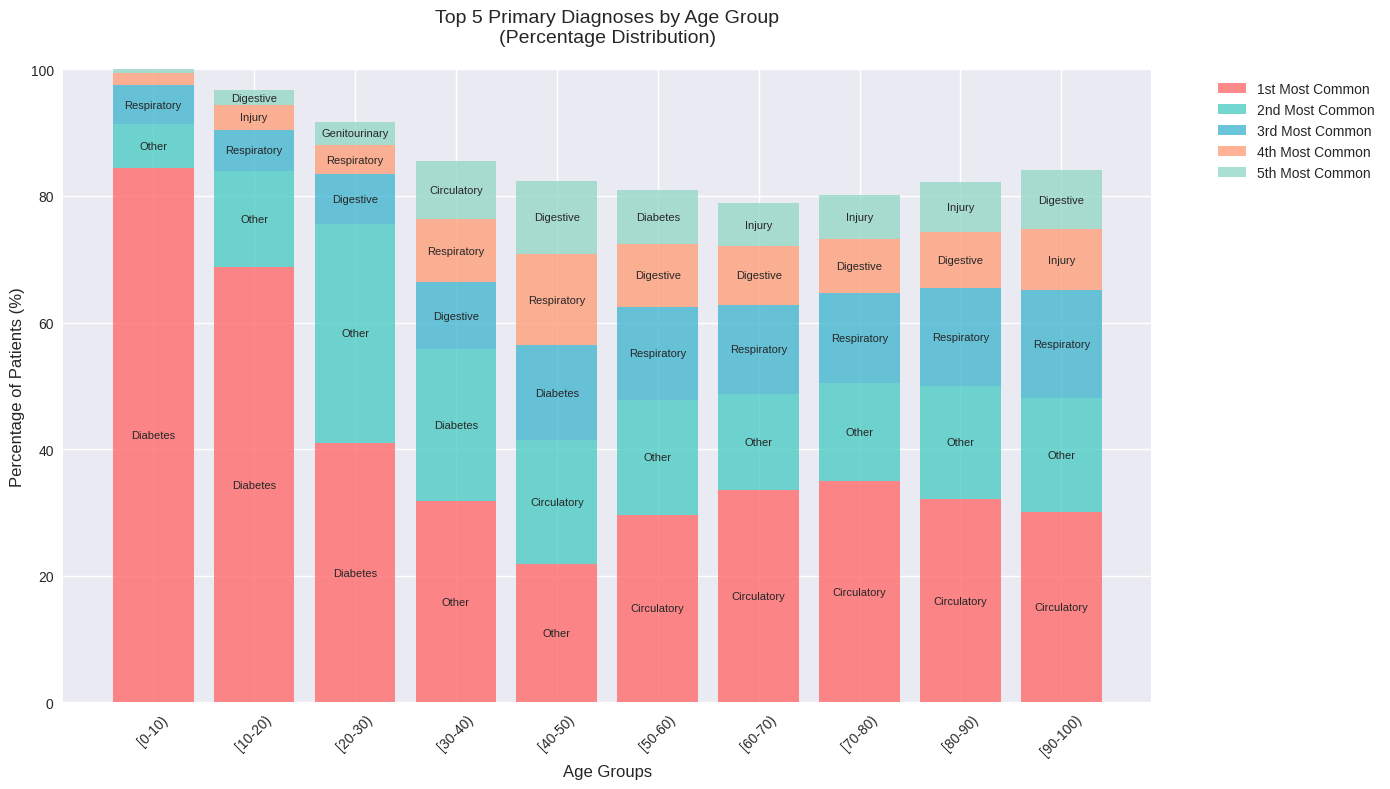


DIAGNOSIS-AGE HEATMAP ANALYSIS


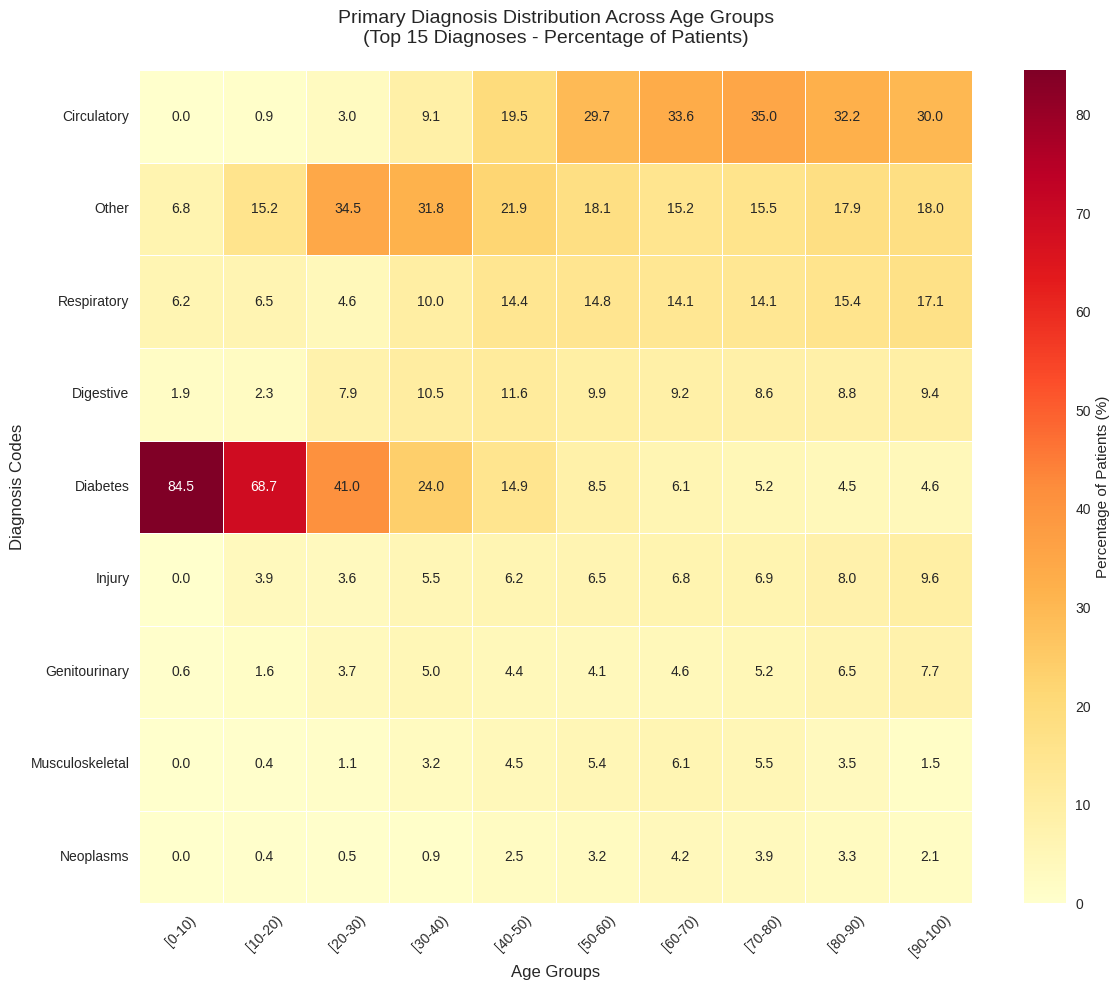


SUMMARY STATISTICS
Analysis Summary:
- Total patients analyzed: 101,745
- Age groups: 10
- Unique primary diagnoses: 7 appearing in top 5

Most consistent diagnoses across age groups:
Diagnosis codes appearing in top 5 across multiple age groups:
  Other: appears in top 5 for 10/10 age groups
  Respiratory: appears in top 5 for 10/10 age groups
  Digestive: appears in top 5 for 10/10 age groups
  Circulatory: appears in top 5 for 7/10 age groups
  Diabetes: appears in top 5 for 6/10 age groups
  Injury: appears in top 5 for 5/10 age groups
  Genitourinary: appears in top 5 for 2/10 age groups

Diagnosis diversity by age group:
  [0-10): Top 5 diagnoses cover 100.0% of patients (161/161)
  [10-20): Top 5 diagnoses cover 96.7% of patients (668/691)
  [20-30): Top 5 diagnoses cover 91.7% of patients (1,519/1,656)
  [30-40): Top 5 diagnoses cover 85.5% of patients (3,227/3,775)
  [40-50): Top 5 diagnoses cover 82.4% of patients (7,978/9,683)
  [50-60): Top 5 diagnoses cover 80.9% of patie

In [51]:
from collections import defaultdict
# Top 5 Primary diagnosis by age group
# Remove missing values
diag_col = 'diag_1_group'
clean_data = df[['age', diag_col]].dropna()
print(f"Total records with valid age and {diag_col}: {len(clean_data):,}")
print(f"Unique age groups: {clean_data['age'].nunique()}")
print(f"Unique primary diagnoses: {clean_data[diag_col].nunique()}")

# Get age groups and sort them properly
age_groups = sorted(clean_data['age'].unique())
print(f"\nAge groups: {age_groups}")

def get_top_diagnoses_by_age(data, top_n=5):
    """Get top N diagnoses for each age group"""

    age_diagnosis_data = {}
    all_top_diagnoses = set()

    for age_group in age_groups:
        age_data = data[data['age'] == age_group]

        # Get top diagnoses for this age group
        top_diag = age_data[diag_col].value_counts().head(top_n)

        age_diagnosis_data[age_group] = {
            'diagnoses': top_diag.index.tolist(),
            'counts': top_diag.values.tolist(),
            'total_patients': len(age_data)
        }

        # Add to set of all top diagnoses
        all_top_diagnoses.update(top_diag.index.tolist())

    return age_diagnosis_data, list(all_top_diagnoses)

# Get top 5 diagnoses for each age group
top_diagnoses_data, all_unique_diagnoses = get_top_diagnoses_by_age(clean_data, top_n=5)

print(f"\nTop 5 diagnoses analysis:")
print(f"Total unique diagnoses appearing in top 5: {len(all_unique_diagnoses)}")

# Print summary for each age group
for age_group in age_groups:
    data = top_diagnoses_data[age_group]
    print(f"\nAge Group {age_group} ({data['total_patients']:,} patients):")
    for i, (diag, count) in enumerate(zip(data['diagnoses'], data['counts']), 1):
        percentage = count / data['total_patients'] * 100
        print(f"  {i}. {diag}: {count:,} patients ({percentage:.1f}%)")

def create_grouped_bar_chart(age_diagnosis_data, age_groups, all_diagnoses):
    """Create grouped bar chart showing top diagnoses by age group"""

    # Create data matrix for plotting
    # Rows = age groups, Columns = top 5 positions (1st, 2nd, 3rd, 4th, 5th most common)

    fig, ax = plt.subplots(figsize=(16, 10))

    # Set up the bar chart
    x_pos = np.arange(len(age_groups))
    bar_width = 0.15

    # Colors for the top 5 positions
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']

    # Create bars for each position (1st through 5th most common)
    for pos in range(5):  # Top 5 positions
        counts = []
        labels = []

        for age_group in age_groups:
            data = age_diagnosis_data[age_group]
            if pos < len(data['counts']):
                counts.append(data['counts'][pos])
                labels.append(data['diagnoses'][pos])
            else:
                counts.append(0)
                labels.append('')

        # Create bars
        bars = ax.bar(x_pos + pos * bar_width, counts, bar_width,
                     label=f'{pos+1}{"st" if pos==0 else "nd" if pos==1 else "rd" if pos==2 else "th"} Most Common',
                     color=colors[pos], alpha=0.8)

        # Add diagnosis code labels on top of bars
        for i, (bar, label) in enumerate(zip(bars, labels)):
            if bar.get_height() > 0:
                ax.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 20,
                       label, ha='center', va='bottom', rotation=45, fontsize=8)

    # Customize the chart
    ax.set_xlabel('Age Groups', fontsize=12)
    ax.set_ylabel('Number of Patients', fontsize=12)
    ax.set_title('Top 5 Primary Diagnoses (diag_1) by Age Group\nGrouped Bar Chart', fontsize=14, pad=20)
    ax.set_xticks(x_pos + bar_width * 2)
    ax.set_xticklabels(age_groups)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

# Create the main grouped bar chart
create_grouped_bar_chart(top_diagnoses_data, age_groups, all_unique_diagnoses)

# Alternative visualization: Stacked bar chart showing percentages
def create_percentage_stacked_chart(age_diagnosis_data, age_groups):
    """Create stacked bar chart showing percentage distribution"""

    fig, ax = plt.subplots(figsize=(14, 8))
    # Colors for the top 5 positions (define here for this function)
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']

    # Prepare data for stacked chart
    diagnosis_colors = {}
    color_palette = plt.cm.Set3(np.linspace(0, 1, len(all_unique_diagnoses)))

    for i, diag in enumerate(all_unique_diagnoses):
        diagnosis_colors[diag] = color_palette[i]

    bottoms = np.zeros(len(age_groups))

    # Create legend mapping
    legend_handles = []
    legend_labels = []

    for rank in range(5):  # Top 5 positions
        values = []
        current_diagnoses = []

        for age_group in age_groups:
            data = age_diagnosis_data[age_group]
            if rank < len(data['counts']):
                percentage = data['counts'][rank] / data['total_patients'] * 100
                values.append(percentage)
                current_diagnoses.append(data['diagnoses'][rank])
            else:
                values.append(0)
                current_diagnoses.append('')

        # Plot this rank level
        bars = ax.bar(age_groups, values, bottom=bottoms,
                     color=colors[rank], alpha=0.8,
                     label=f'{rank+1}{"st" if rank==0 else "nd" if rank==1 else "rd" if rank==2 else "th"} Most Common')

        # Add diagnosis labels
        for i, (bar, diag) in enumerate(zip(bars, current_diagnoses)):
            if bar.get_height() > 2:  # Only label if bar is tall enough
                ax.text(bar.get_x() + bar.get_width()/2.,
                       bottoms[i] + bar.get_height()/2.,
                       diag, ha='center', va='center', fontsize=8, rotation=0)

        bottoms += values

    ax.set_ylabel('Percentage of Patients (%)', fontsize=12)
    ax.set_xlabel('Age Groups', fontsize=12)
    ax.set_title('Top 5 Primary Diagnoses by Age Group\n(Percentage Distribution)', fontsize=14, pad=20)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_ylim(0, 100)

    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Create percentage stacked chart
create_percentage_stacked_chart(top_diagnoses_data, age_groups)

# Heat map visualization
def create_diagnosis_age_heatmap(data):
    """Create heatmap showing diagnosis frequency across age groups"""

    # Create a matrix of diagnosis codes vs age groups
    diagnosis_age_matrix = defaultdict(dict)

    for age_group in age_groups:
        age_data = data[data['age'] == age_group]
        diag_counts = age_data[diag_col].value_counts()
        total_patients = len(age_data)

        # Get top 10 most common diagnoses overall
        overall_top_diag = data[diag_col].value_counts().head(15).index

        for diag in overall_top_diag:
            count = diag_counts.get(diag, 0)
            percentage = count / total_patients * 100 if total_patients > 0 else 0
            diagnosis_age_matrix[diag][age_group] = percentage

    # Convert to DataFrame
    heatmap_df = pd.DataFrame(diagnosis_age_matrix).T
    heatmap_df = heatmap_df.fillna(0)

    # Create heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(heatmap_df, annot=True, fmt='.1f', cmap='YlOrRd',
                cbar_kws={'label': 'Percentage of Patients (%)'},
                linewidths=0.5)

    plt.title('Primary Diagnosis Distribution Across Age Groups\n(Top 15 Diagnoses - Percentage of Patients)',
              fontsize=14, pad=20)
    plt.xlabel('Age Groups', fontsize=12)
    plt.ylabel('Diagnosis Codes', fontsize=12)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    return heatmap_df

# Create heatmap
print(f"\n" + "="*60)
print("DIAGNOSIS-AGE HEATMAP ANALYSIS")
print("="*60)

heatmap_data = create_diagnosis_age_heatmap(clean_data)

# Summary statistics
print(f"\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)

print(f"Analysis Summary:")
print(f"- Total patients analyzed: {len(clean_data):,}")
print(f"- Age groups: {len(age_groups)}")
print(f"- Unique primary diagnoses: {len(all_unique_diagnoses)} appearing in top 5")

# Most consistent diagnoses across age groups
print(f"\nMost consistent diagnoses across age groups:")
diagnosis_appearance_count = defaultdict(int)
for age_group in age_groups:
    for diag in top_diagnoses_data[age_group]['diagnoses']:
        diagnosis_appearance_count[diag] += 1

consistent_diagnoses = sorted(diagnosis_appearance_count.items(), key=lambda x: x[1], reverse=True)
print("Diagnosis codes appearing in top 5 across multiple age groups:")
for diag, count in consistent_diagnoses[:10]:
    print(f"  {diag}: appears in top 5 for {count}/{len(age_groups)} age groups")

# Age group with most diagnosis diversity
print(f"\nDiagnosis diversity by age group:")
for age_group in age_groups:
    data = top_diagnoses_data[age_group]
    total_in_top5 = sum(data['counts'])
    coverage = total_in_top5 / data['total_patients'] * 100
    print(f"  {age_group}: Top 5 diagnoses cover {coverage:.1f}% of patients "
          f"({total_in_top5:,}/{data['total_patients']:,})")

Top 10 Diagnosis Combinations:
- Circulatory | Circulatory | Circulatory: 6,843
- Circulatory | Circulatory | Diabetes: 3,416
- Circulatory | Circulatory | Other: 2,708
- Diabetes | Other | Other: 2,274
- Other | Other | Other: 2,215
- Respiratory | Circulatory | Circulatory: 1,594
- Circulatory | Diabetes | Circulatory: 1,586
- Other | Other | Diabetes: 1,482
- Circulatory | Other | Circulatory: 1,472
- Circulatory | Respiratory | Circulatory: 1,442


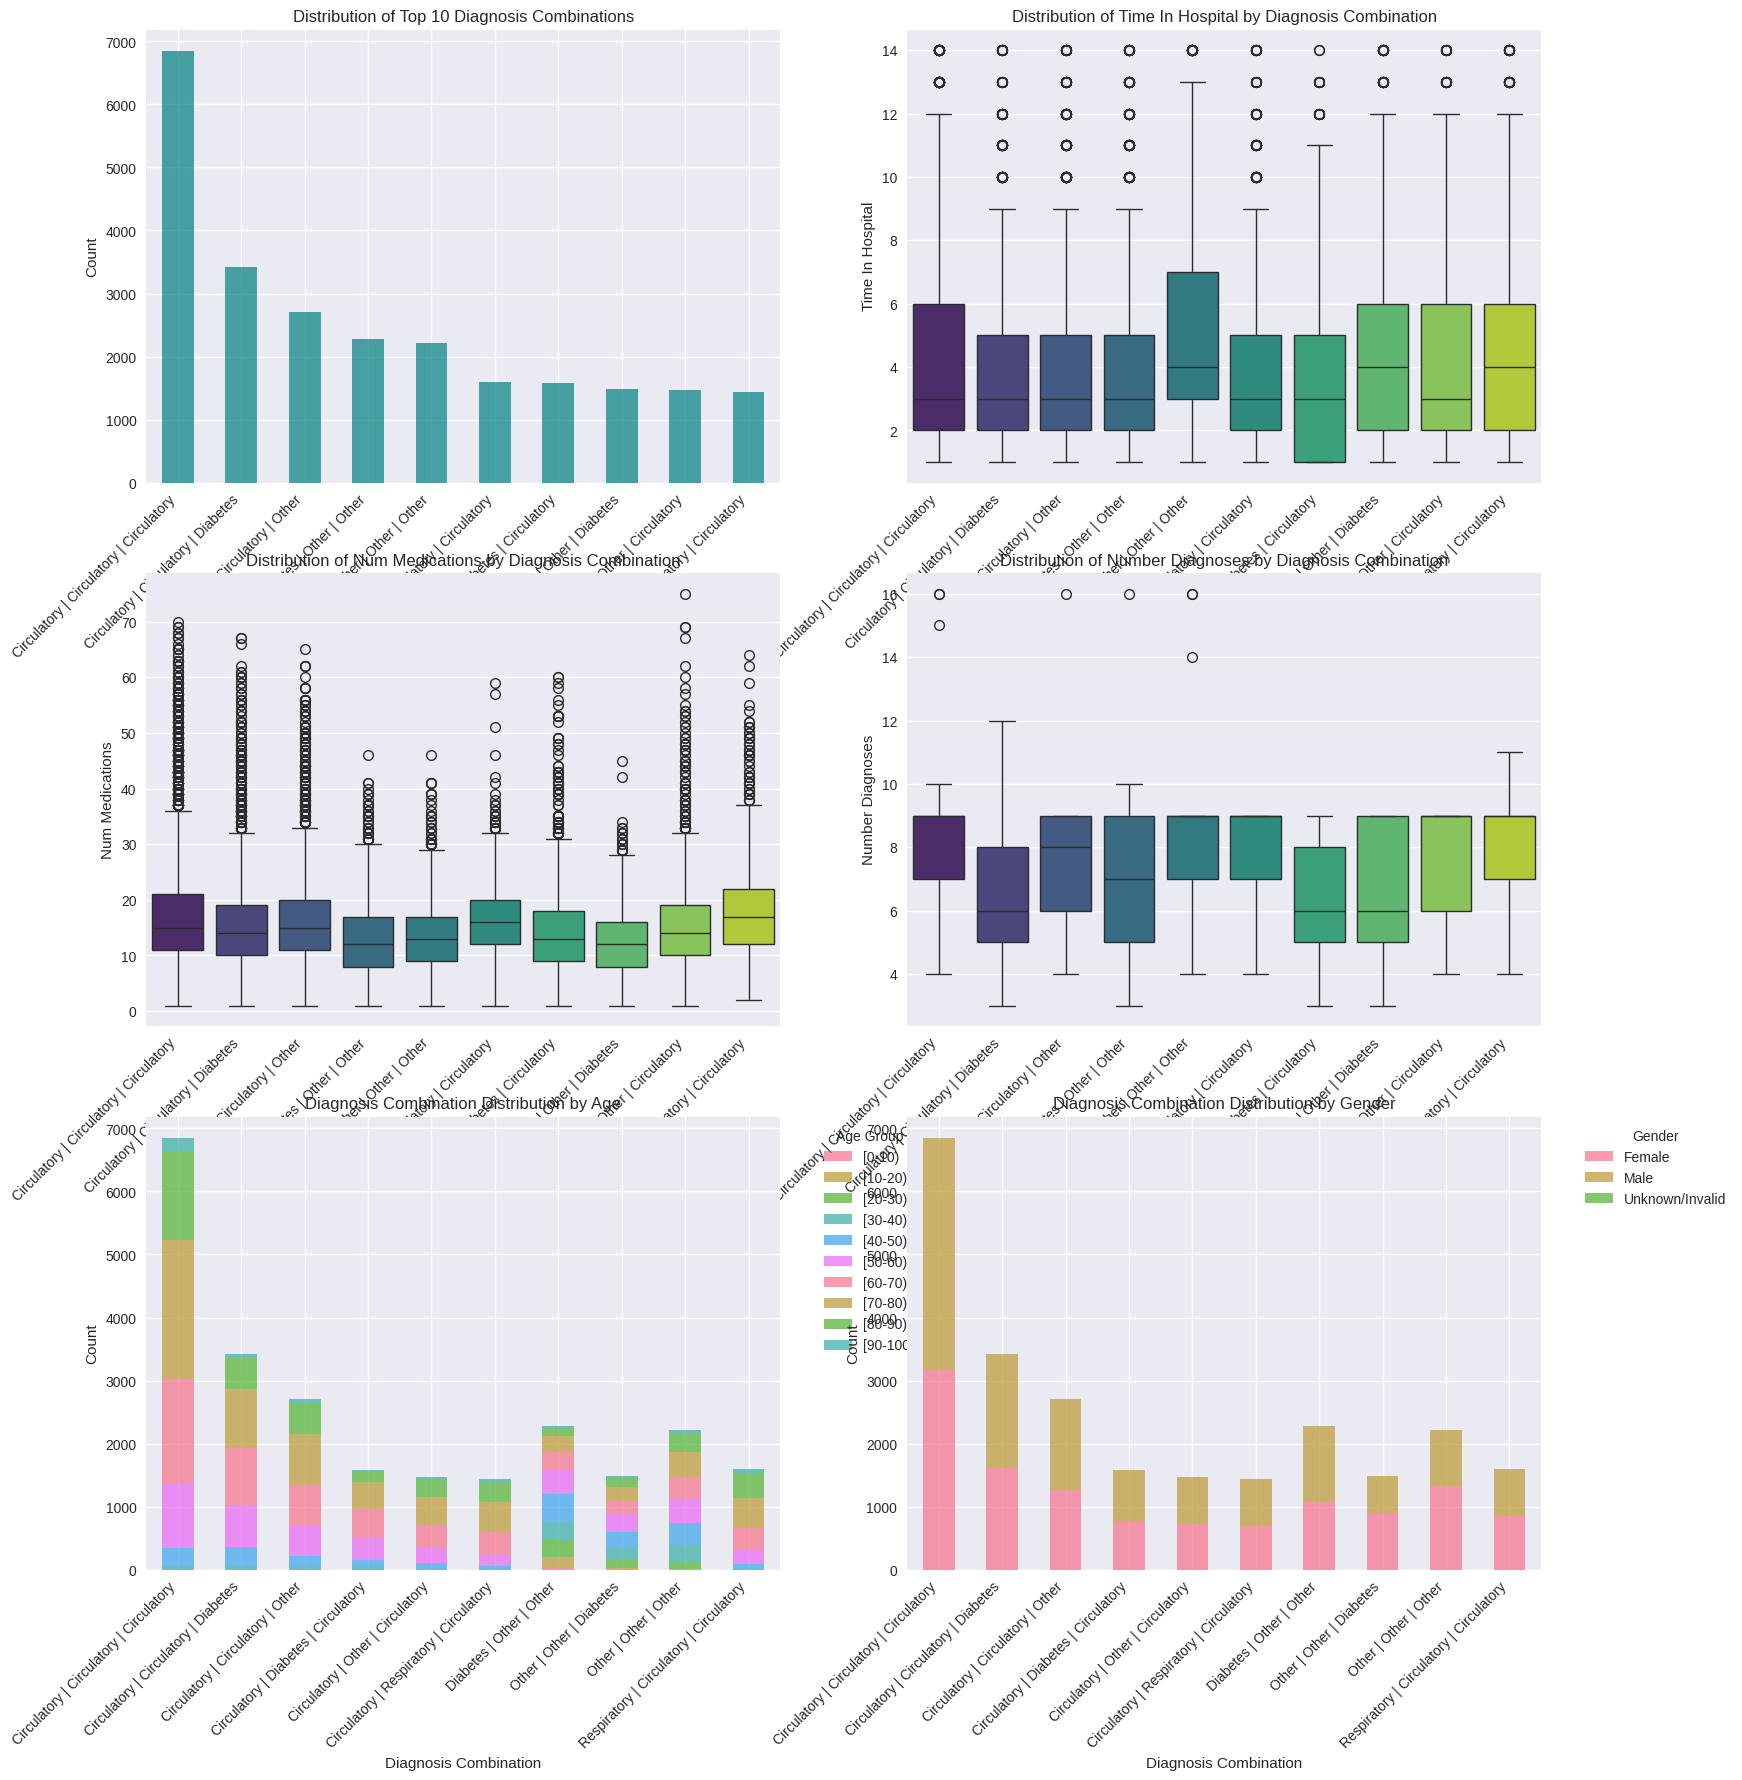

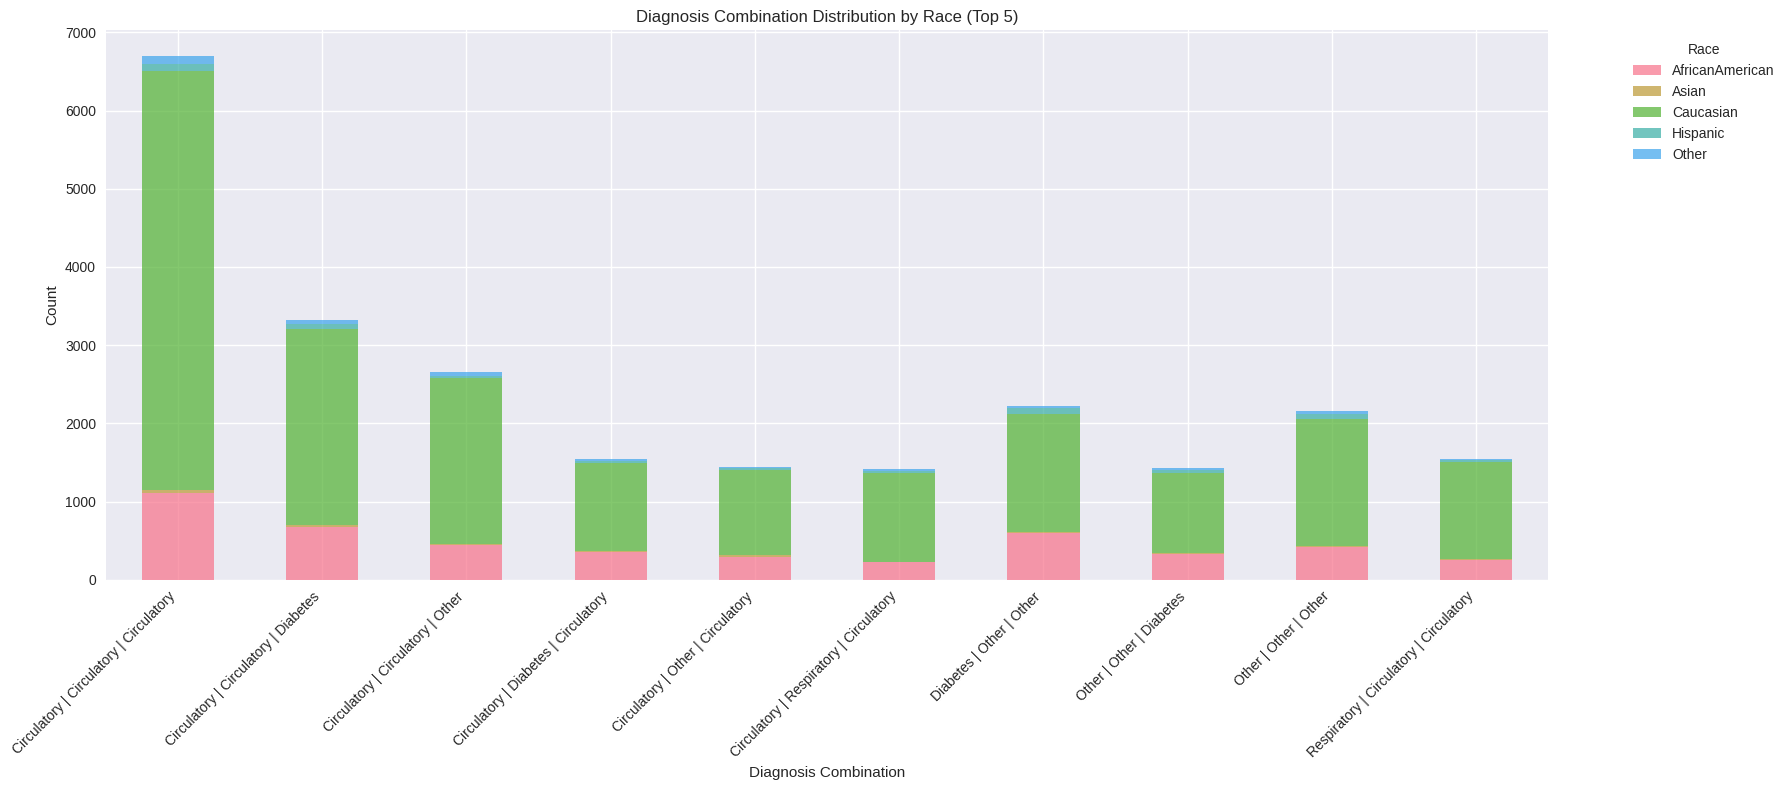

In [22]:
# Combine diagnosis groups into combinations
df['diag_combination'] = df['diag_1_group'].astype(str) + ' | ' + df['diag_2_group'].astype(str) + ' | ' + df['diag_3_group'].astype(str)

# Remove combinations with 'Unknown' or 'nan' values
df_cleaned_combinations = df[
    (~df['diag_1_group'].isin(['Unknown', 'nan'])) &
    (~df['diag_2_group'].isin(['Unknown', 'nan'])) &
    (~df['diag_3_group'].isin(['Unknown', 'nan']))
].copy()

# Get the top N combinations for analysis
top_n_combinations = df_cleaned_combinations['diag_combination'].value_counts().head(10).index.tolist()
df_top_combinations = df_cleaned_combinations[df_cleaned_combinations['diag_combination'].isin(top_n_combinations)].copy()

print(f"Top 10 Diagnosis Combinations:")
for combo, count in df_top_combinations['diag_combination'].value_counts().items():
    print(f"- {combo}: {count:,}")

# Plotting distributions by top diagnosis combinations
diag_metrics = ['time_in_hospital', 'num_medications', 'number_diagnoses']

plt.figure(figsize=(18, 20))

# Distribution of Count for Top Combinations
plt.subplot(3, 2, 1)
df_top_combinations['diag_combination'].value_counts().plot(kind='bar', color='teal', alpha=0.7)
plt.title('Distribution of Top 10 Diagnosis Combinations')
plt.xlabel('Diagnosis Combination')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Plot distributions of numerical metrics by diagnosis combination
for i, metric in enumerate(diag_metrics):
    plt.subplot(3, 2, i + 2)
    if metric in df_top_combinations.columns and 'diag_combination' in df_top_combinations.columns:
        # Use boxplot to show distribution and outliers
        sns.boxplot(x='diag_combination', y=metric, data=df_top_combinations, palette='viridis', order=top_n_combinations)
        plt.title(f'Distribution of {metric.replace("_", " ").title()} by Diagnosis Combination')
        plt.xlabel('Diagnosis Combination')
        plt.ylabel(metric.replace("_", " ").title())
        plt.xticks(rotation=45, ha='right')


# Add plots broken down by age, race, and gender for top combinations

# Break down by Age
if 'age' in df_top_combinations.columns:
    plt.subplot(3, 2, 5)
    age_combination_counts = df_top_combinations.groupby('diag_combination')['age'].value_counts().unstack().fillna(0)
    age_combination_counts.plot(kind='bar', stacked=True, ax=plt.gca(), alpha=0.7)
    plt.title('Diagnosis Combination Distribution by Age')
    plt.xlabel('Diagnosis Combination')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

# Break down by Gender
if 'gender' in df_top_combinations.columns:
    plt.subplot(3, 2, 6)
    gender_combination_counts = df_top_combinations.groupby('diag_combination')['gender'].value_counts().unstack().fillna(0)
    gender_combination_counts.plot(kind='bar', stacked=True, ax=plt.gca(), alpha=0.7)
    plt.title('Diagnosis Combination Distribution by Gender')
    plt.xlabel('Diagnosis Combination')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# Break down by Race (Top 5 races)
if 'race' in df_top_combinations.columns:
    plt.figure(figsize=(18, 8))
    top_races_in_combinations = df_top_combinations['race'].value_counts().head(5).index.tolist()
    df_top_combinations_race = df_top_combinations[df_top_combinations['race'].isin(top_races_in_combinations)].copy()
    race_combination_counts = df_top_combinations_race.groupby('diag_combination')['race'].value_counts().unstack().fillna(0)
    race_combination_counts.plot(kind='bar', stacked=True, ax=plt.gca(), alpha=0.7)
    plt.title('Diagnosis Combination Distribution by Race (Top 5)')
    plt.xlabel('Diagnosis Combination')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()

# 7. CORRELATION ANALYSIS

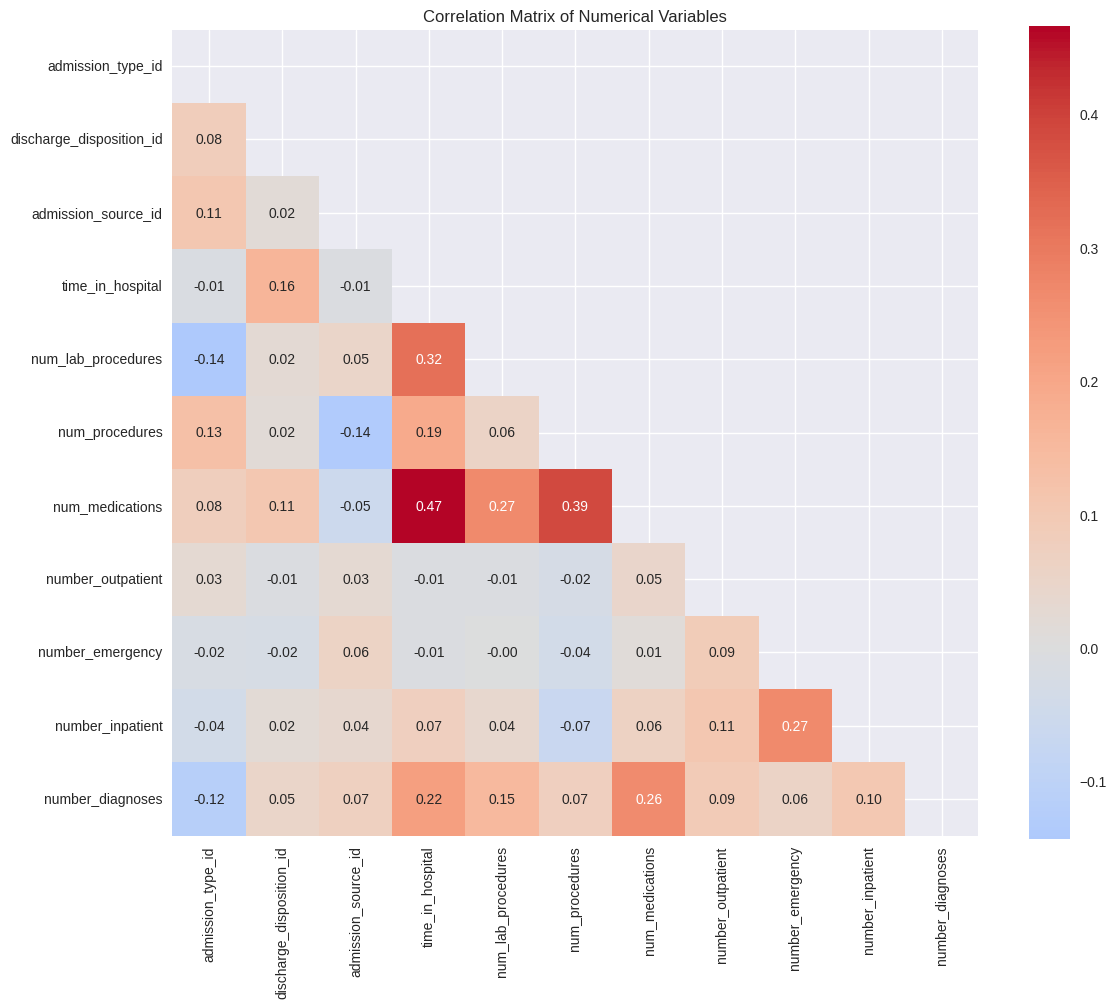

Highly correlated pairs (|correlation| > 0.5):


In [23]:
# Select numerical columns for correlation
numeric_df = df.select_dtypes(include=[np.number])
if len(numeric_df.columns) > 1:
    correlation_matrix = numeric_df.corr()

    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
                center=0, square=True, fmt='.2f')
    plt.title('Correlation Matrix of Numerical Variables')
    plt.tight_layout()
    plt.show()

    # Find highly correlated pairs
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_val = correlation_matrix.iloc[i, j]
            if abs(corr_val) > 0.5:  # High correlation threshold
                high_corr_pairs.append((
                    correlation_matrix.columns[i],
                    correlation_matrix.columns[j],
                    corr_val
                ))

    print("Highly correlated pairs (|correlation| > 0.5):")
    for col1, col2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
        print(f"  {col1} - {col2}: {corr:.3f}")

# 8. READMISSION PATTERN ANALYSIS

8.1 Readmission Rate by Age Group (%):
readmitted    <30    >30     NO
age                            
[0-10)       1.86  16.15  81.99
[10-20)      5.79  32.42  61.79
[20-30)     14.24  30.78  54.98
[30-40)     11.23  31.44  57.32
[40-50)     10.60  33.85  55.55
[50-60)      9.67  34.29  56.04
[60-70)     11.13  35.12  53.75
[70-80)     11.77  36.35  51.88
[80-90)     12.08  36.19  51.73
[90-100)    11.10  28.93  59.97


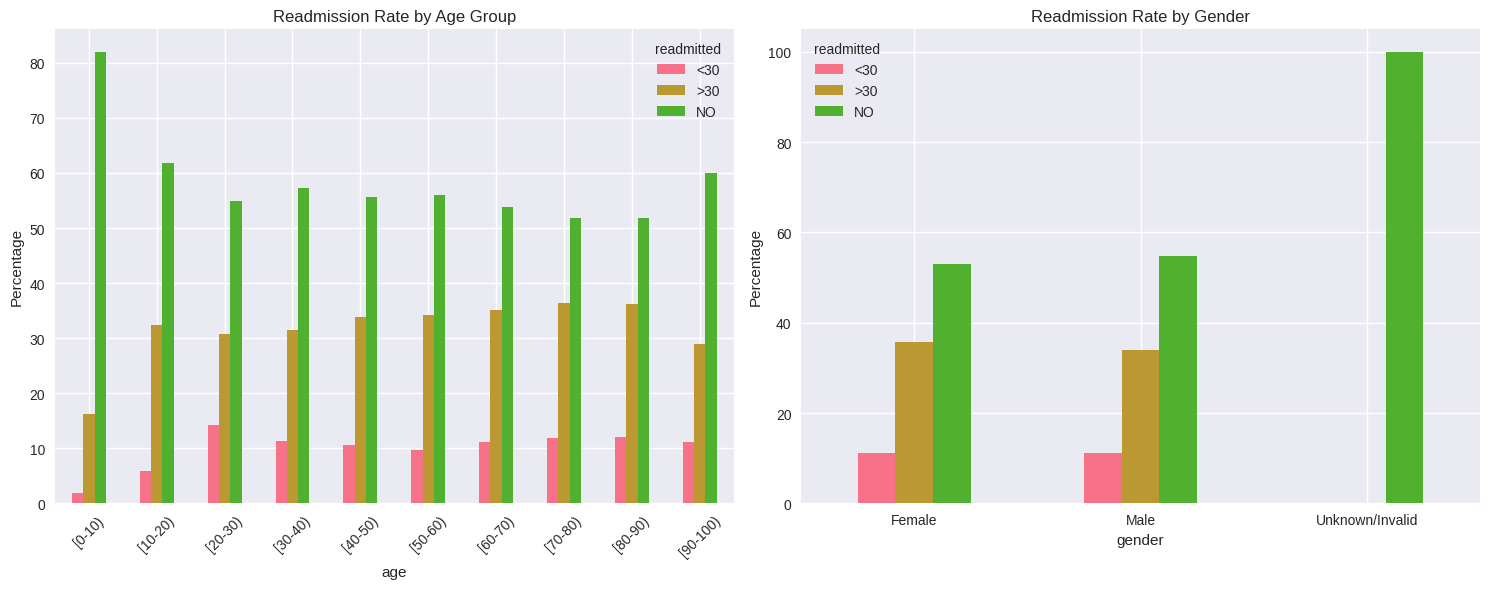

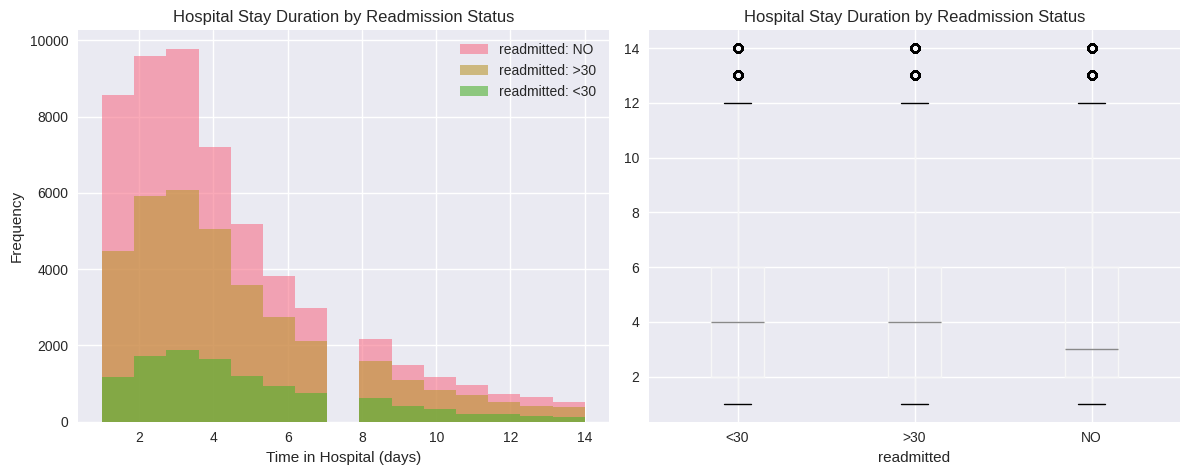

In [24]:
if target_col in df.columns:
    # 8.1 Readmission by Age Group
    if 'age' in df.columns:
        age_readmission = pd.crosstab(df['age'], df[target_col], normalize='index') * 100
        print("8.1 Readmission Rate by Age Group (%):")
        print(age_readmission.round(2))

        plt.figure(figsize=(15, 6))
        plt.subplot(1, 2, 1)
        age_readmission.plot(kind='bar', stacked=False, ax=plt.gca())
        plt.title('Readmission Rate by Age Group')
        plt.xticks(rotation=45)
        plt.ylabel('Percentage')
        plt.legend(title=target_col)

    # 8.2 Readmission by Gender
    if 'gender' in df.columns:
        plt.subplot(1, 2, 2)
        gender_readmission = pd.crosstab(df['gender'], df[target_col], normalize='index') * 100
        gender_readmission.plot(kind='bar', ax=plt.gca())
        plt.title('Readmission Rate by Gender')
        plt.xticks(rotation=0)
        plt.ylabel('Percentage')
        plt.legend(title=target_col)

    plt.tight_layout()
    plt.show()

    # 8.3 Readmission by Hospital Stay Duration
    if 'time_in_hospital' in df.columns:
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        for readmit_status in df[target_col].unique():
            subset = df[df[target_col] == readmit_status]['time_in_hospital']
            plt.hist(subset, alpha=0.6, label=f'{target_col}: {readmit_status}', bins=15)
        plt.xlabel('Time in Hospital (days)')
        plt.ylabel('Frequency')
        plt.title('Hospital Stay Duration by Readmission Status')
        plt.legend()

        # Box plot
        plt.subplot(1, 2, 2)
        df.boxplot(column='time_in_hospital', by=target_col, ax=plt.gca())
        plt.title('Hospital Stay Duration by Readmission Status')
        plt.suptitle('')  # Remove default title

        plt.tight_layout()
        plt.show()


In [25]:
# READMISSION ANALYSIS BY DIAGNOSIS
target_col = 'readmitted' if 'readmitted' in df.columns else df.columns[-1]
print(f"Only include <30 in readmitted")
if target_col in df.columns and 'diag_1_group' in df.columns:
    overall_readmit_rate = (df[target_col] == '<30').mean() * 100
    print(f"Overall readmission rate: {overall_readmit_rate:.2f}%")

    print(f"\nReadmission rates by primary diagnosis:")
    for diag_group in df['diag_1_group'].value_counts().head(8).index:
        if pd.notna(diag_group) and diag_group != 'Unknown':
            subset = df[df['diag_1_group'] == diag_group]
            diag_readmit_rate = (subset[target_col] == '<30').mean() * 100
            patient_count = len(subset)
            risk_ratio = diag_readmit_rate / overall_readmit_rate if overall_readmit_rate > 0 else 1

            risk_indicator = "🔴" if risk_ratio > 1.2 else "🟡" if risk_ratio > 0.8 else "🟢"
            print(f"{risk_indicator} {diag_group}: {diag_readmit_rate:.1f}% ({patient_count:,} patients, {risk_ratio:.2f}x)")

    print(f"\nReadmission rates by secondary diagnosis:")
    for diag_group in df['diag_2_group'].value_counts().head(8).index:
        if pd.notna(diag_group) and diag_group != 'Unknown':
            subset = df[df['diag_2_group'] == diag_group]
            diag_readmit_rate = (subset[target_col] == '<30').mean() * 100
            patient_count = len(subset)
            risk_ratio = diag_readmit_rate / overall_readmit_rate if overall_readmit_rate > 0 else 1

            risk_indicator = "🔴" if risk_ratio > 1.2 else "🟡" if risk_ratio > 0.8 else "🟢"
            print(f"{risk_indicator} {diag_group}: {diag_readmit_rate:.1f}% ({patient_count:,} patients, {risk_ratio:.2f}x)")



Only include <30 in readmitted
Overall readmission rate: 11.16%

Readmission rates by primary diagnosis:
🟡 Circulatory: 11.4% (30,437 patients, 1.03x)
🟡 Other: 11.5% (18,172 patients, 1.03x)
🟡 Respiratory: 9.7% (14,423 patients, 0.87x)
🟡 Digestive: 10.7% (9,475 patients, 0.96x)
🟡 Diabetes: 13.0% (8,757 patients, 1.16x)
🟡 Injury: 12.2% (6,974 patients, 1.10x)
🟡 Genitourinary: 10.8% (5,117 patients, 0.97x)
🟡 Musculoskeletal: 9.5% (4,957 patients, 0.85x)

Readmission rates by secondary diagnosis:
🟡 Circulatory: 11.1% (31,881 patients, 0.99x)
🟡 Other: 11.3% (26,553 patients, 1.01x)
🟡 Diabetes: 10.6% (12,794 patients, 0.95x)
🟡 Respiratory: 10.5% (10,895 patients, 0.94x)
🟡 Genitourinary: 11.8% (8,376 patients, 1.05x)
🟡 Digestive: 11.5% (4,170 patients, 1.03x)
🔴 Neoplasms: 14.9% (2,547 patients, 1.34x)
🟡 Injury: 11.4% (2,428 patients, 1.03x)


# 9. MEDICATION ANALYSIS

9.1 Diabetes Medication Usage:


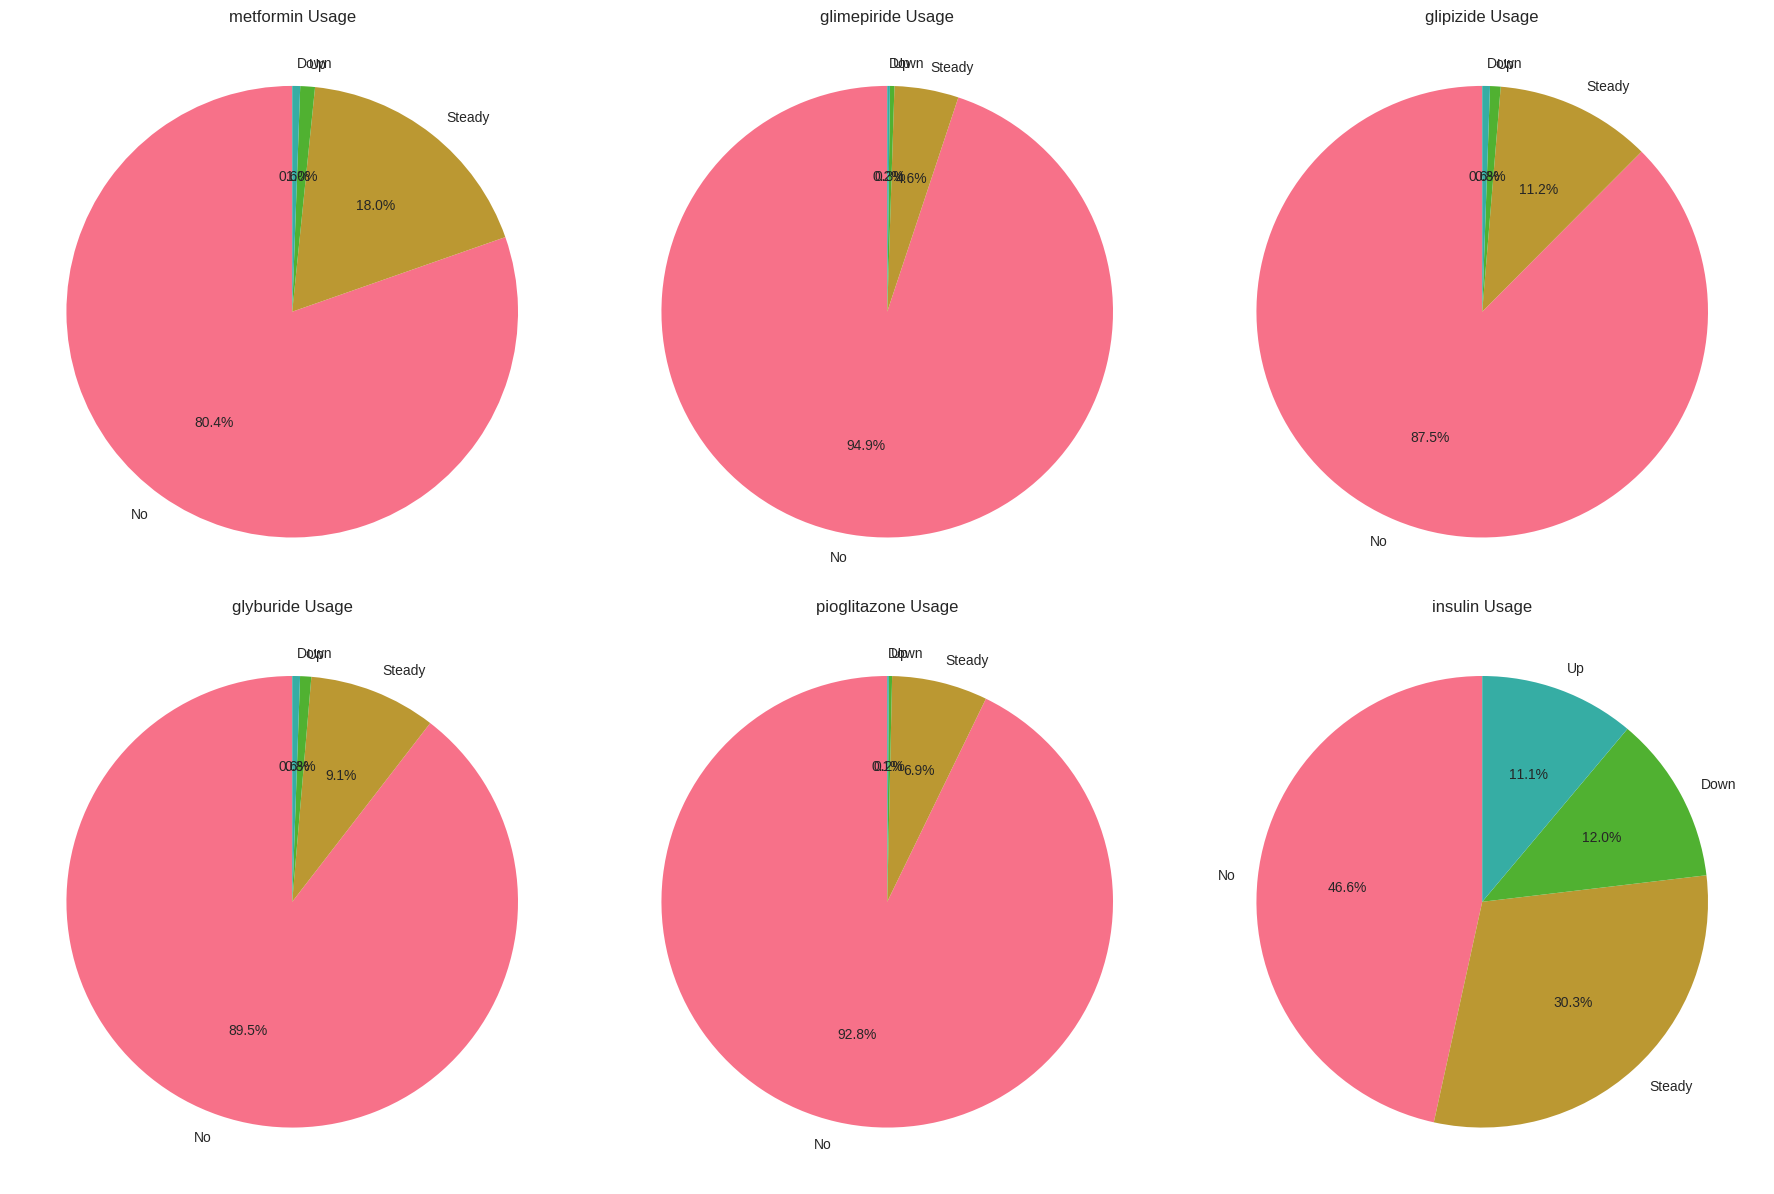


metformin distribution:
metformin
No        81778
Steady    18346
Up         1067
Down        575
Name: count, dtype: int64

glimepiride distribution:
glimepiride
No        96575
Steady     4670
Up          327
Down        194
Name: count, dtype: int64

glipizide distribution:
glipizide
No        89080
Steady    11356
Up          770
Down        560
Name: count, dtype: int64

glyburide distribution:
glyburide
No        91116
Steady     9274
Up          812
Down        564
Name: count, dtype: int64

pioglitazone distribution:
pioglitazone
No        94438
Steady     6976
Up          234
Down        118
Name: count, dtype: int64


In [26]:
# Find medication columns
med_cols = [col for col in df.columns if any(med in col.lower() for med in
           ['insulin', 'metformin', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone'])]

if med_cols:
    print(f"9.1 Diabetes Medication Usage:")

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()

    for i, med_col in enumerate(med_cols[:6]):  # Show first 6 medications
        if i < len(axes):
            med_counts = df[med_col].value_counts()
            axes[i].pie(med_counts.values, labels=med_counts.index, autopct='%1.1f%%', startangle=90)
            axes[i].set_title(f'{med_col} Usage')

    # Hide unused subplots
    for j in range(len(med_cols), len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

    # Medication usage statistics
    for med_col in med_cols[:5]:  # Show first 5
        print(f"\n{med_col} distribution:")
        print(df[med_col].value_counts())

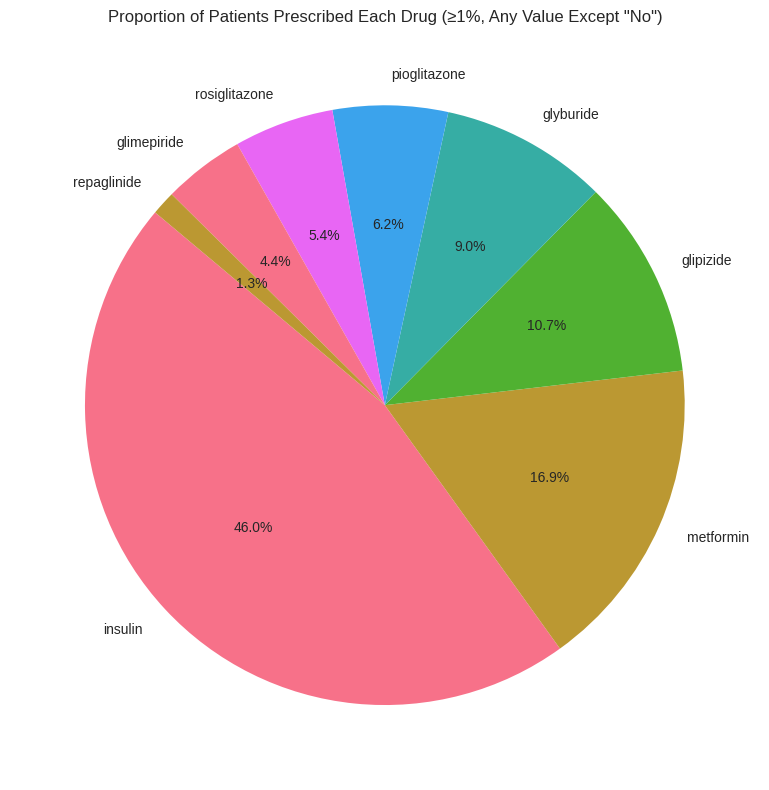

In [52]:
# Features 22 to 44 are drug columns
drug_cols = df.columns[22:45]
drug_sums = {}

total_patients = len(df)
for col in drug_cols:
    # Count all values except "No"
    drug_sums[col] = (df[col] != "No").sum()

# Filter out drugs with less than 1% usage
drug_sums_filtered = {k: v for k, v in drug_sums.items() if v / total_patients >= 0.01}

# Sort by usage count descending
sorted_drugs = sorted(drug_sums_filtered.items(), key=lambda x: x[1], reverse=True)
labels, values = zip(*sorted_drugs)

plt.figure(figsize=(10, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Patients Prescribed Each Drug (≥1%, Any Value Except "No")')
plt.tight_layout()
plt.show()

DRUG PRESCRIPTIONS BY DIAGNOSIS CODE ANALYSIS
Available medication columns:
 1. num_medications
    Unique values: 75
    Top values: [13, 12, 11, 15, 14]

 2. metformin
    Unique values: 4
    Top values: ['No', 'Steady', 'Up', 'Down']

 3. acetohexamide
    Unique values: 2
    Top values: ['No', 'Steady']

 4. glipizide
    Unique values: 4
    Top values: ['No', 'Steady', 'Up', 'Down']

 5. glyburide
    Unique values: 4
    Top values: ['No', 'Steady', 'Up', 'Down']

 6. tolbutamide
    Unique values: 2
    Top values: ['No', 'Steady']

 7. pioglitazone
    Unique values: 4
    Top values: ['No', 'Steady', 'Up', 'Down']

 8. rosiglitazone
    Unique values: 4
    Top values: ['No', 'Steady', 'Up', 'Down']

 9. acarbose
    Unique values: 4
    Top values: ['No', 'Steady', 'Up', 'Down']

10. miglitol
    Unique values: 4
    Top values: ['No', 'Steady', 'Down', 'Up']

11. troglitazone
    Unique values: 2
    Top values: ['No', 'Steady']

12. tolazamide
    Unique values: 3
    To

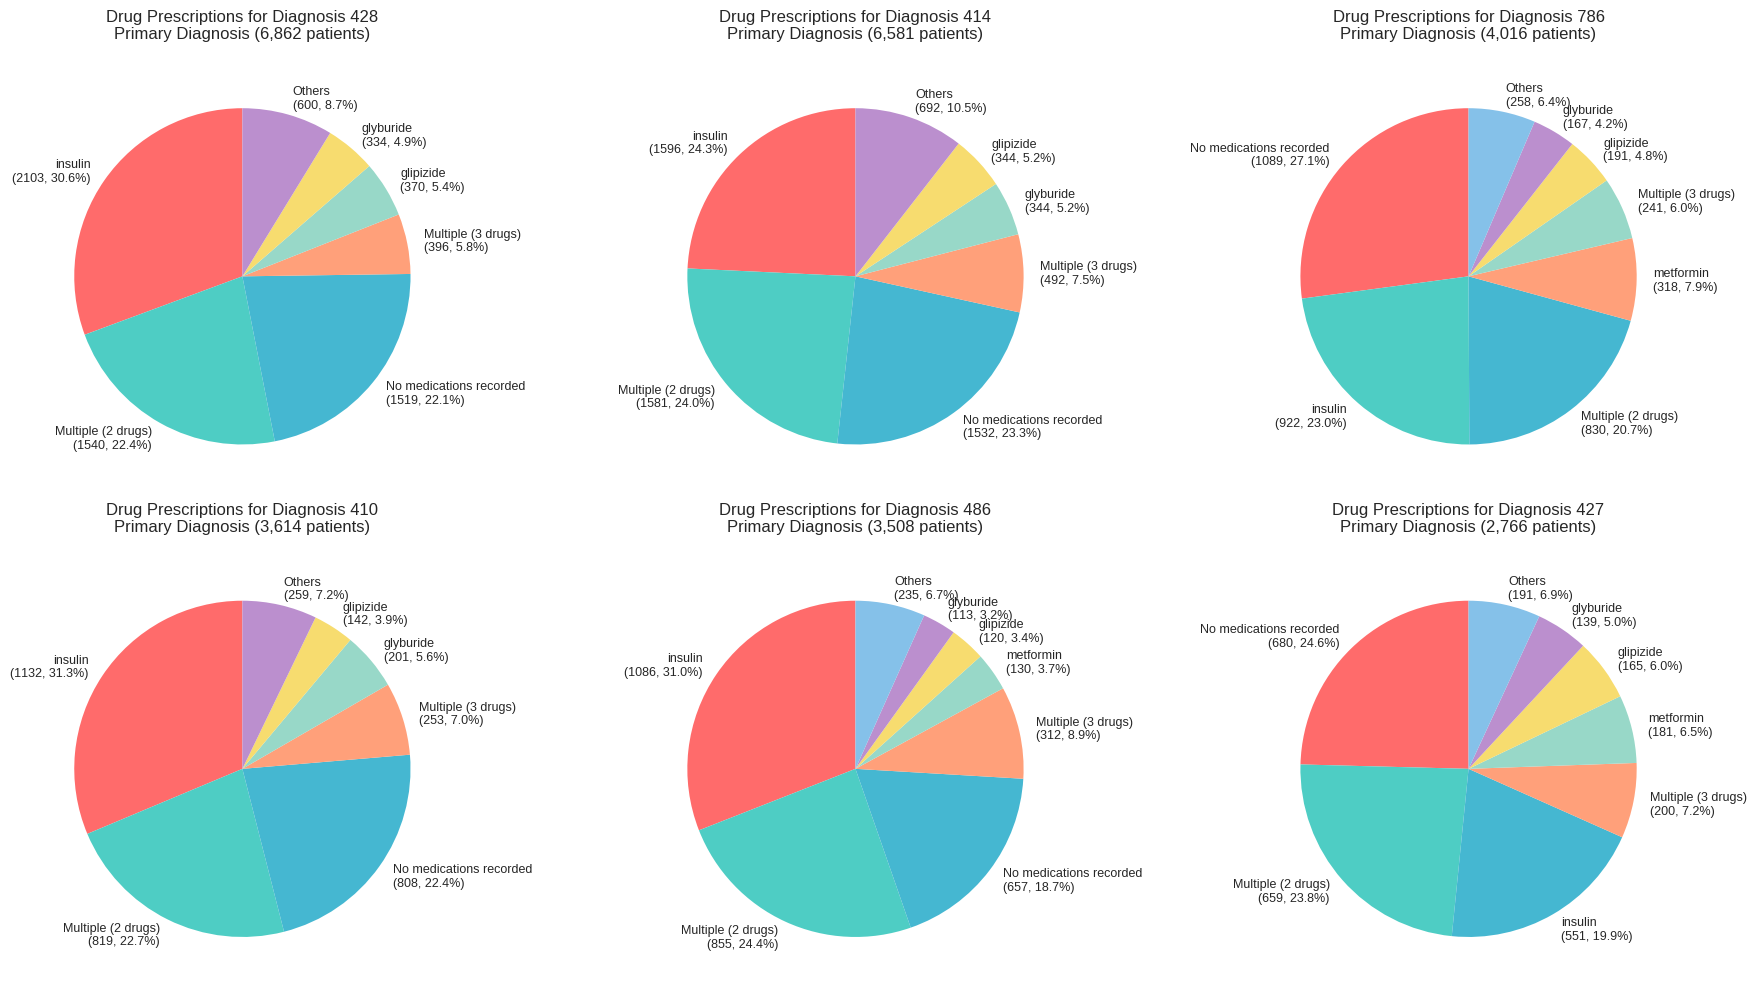


Detailed drug prescription statistics for diag_1:

Diagnosis 428 (6862 patients):
Individual drug prescription rates:
  insulin        : 3655/6862 (53.3%)
  glipizide      : 1023/6862 (14.9%)
  metformin      : 869/6862 (12.7%)
  glyburide      : 840/6862 (12.2%)
  pioglitazone   : 416/6862 ( 6.1%)
  glimepiride    : 388/6862 ( 5.7%)
  rosiglitazone  : 383/6862 ( 5.6%)
  repaglinide    : 182/6862 ( 2.7%)
  nateglinide    :  49/6862 ( 0.7%)
  acarbose       :  23/6862 ( 0.3%)

Diagnosis 414 (6581 patients):
Individual drug prescription rates:
  insulin        : 3246/6581 (49.3%)
  metformin      : 1058/6581 (16.1%)
  glipizide      : 986/6581 (15.0%)
  glyburide      : 944/6581 (14.3%)
  pioglitazone   : 600/6581 ( 9.1%)
  rosiglitazone  : 505/6581 ( 7.7%)
  glimepiride    : 403/6581 ( 6.1%)
  repaglinide    :  86/6581 ( 1.3%)
  nateglinide    :  48/6581 ( 0.7%)
  acarbose       :  26/6581 ( 0.4%)

Diagnosis 786 (4016 patients):
Individual drug prescription rates:
  insulin        : 15

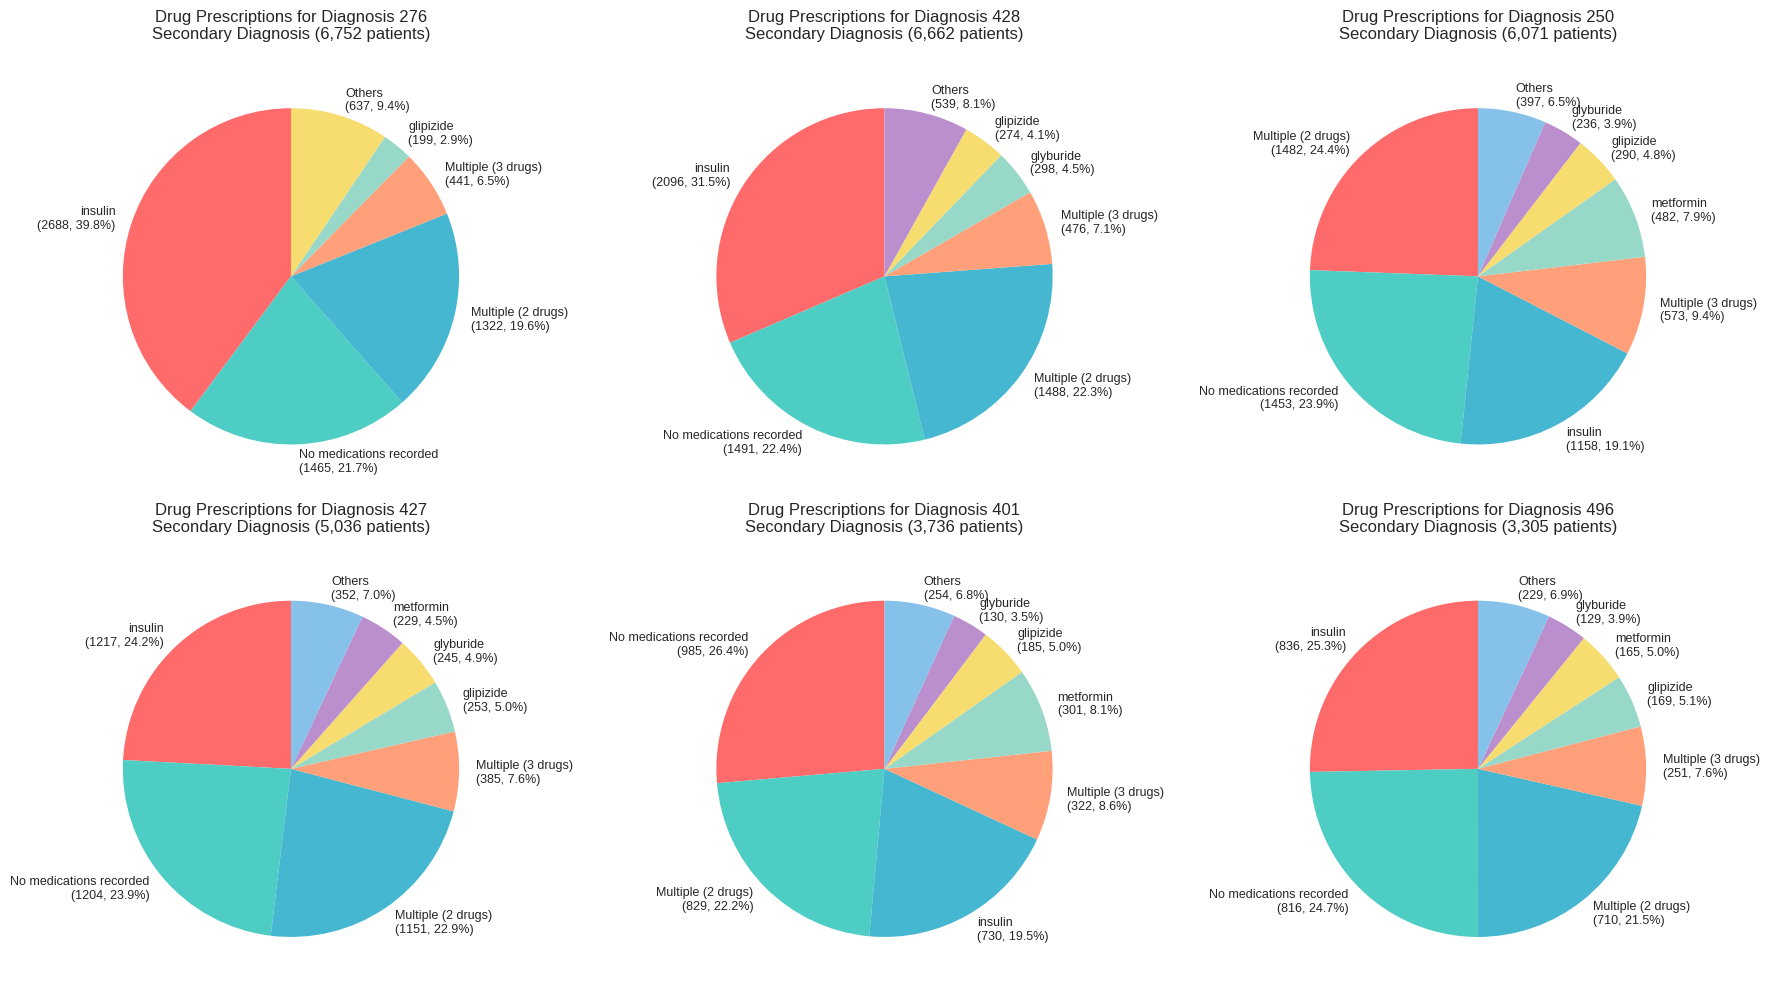


Detailed drug prescription statistics for diag_2:

Diagnosis 276 (6752 patients):
Individual drug prescription rates:
  insulin        : 4217/6752 (62.5%)
  metformin      : 1072/6752 (15.9%)
  glipizide      : 765/6752 (11.3%)
  glyburide      : 506/6752 ( 7.5%)
  pioglitazone   : 414/6752 ( 6.1%)
  rosiglitazone  : 349/6752 ( 5.2%)
  glimepiride    : 288/6752 ( 4.3%)
  repaglinide    :  82/6752 ( 1.2%)
  nateglinide    :  38/6752 ( 0.6%)
  acarbose       :  13/6752 ( 0.2%)

Diagnosis 428 (6662 patients):
Individual drug prescription rates:
  insulin        : 3691/6662 (55.4%)
  glipizide      : 915/6662 (13.7%)
  metformin      : 897/6662 (13.5%)
  glyburide      : 799/6662 (12.0%)
  pioglitazone   : 439/6662 ( 6.6%)
  rosiglitazone  : 426/6662 ( 6.4%)
  glimepiride    : 390/6662 ( 5.9%)
  repaglinide    : 144/6662 ( 2.2%)
  nateglinide    :  59/6662 ( 0.9%)
  acarbose       :  24/6662 ( 0.4%)

Diagnosis 250 (6071 patients):
Individual drug prescription rates:
  insulin        : 249

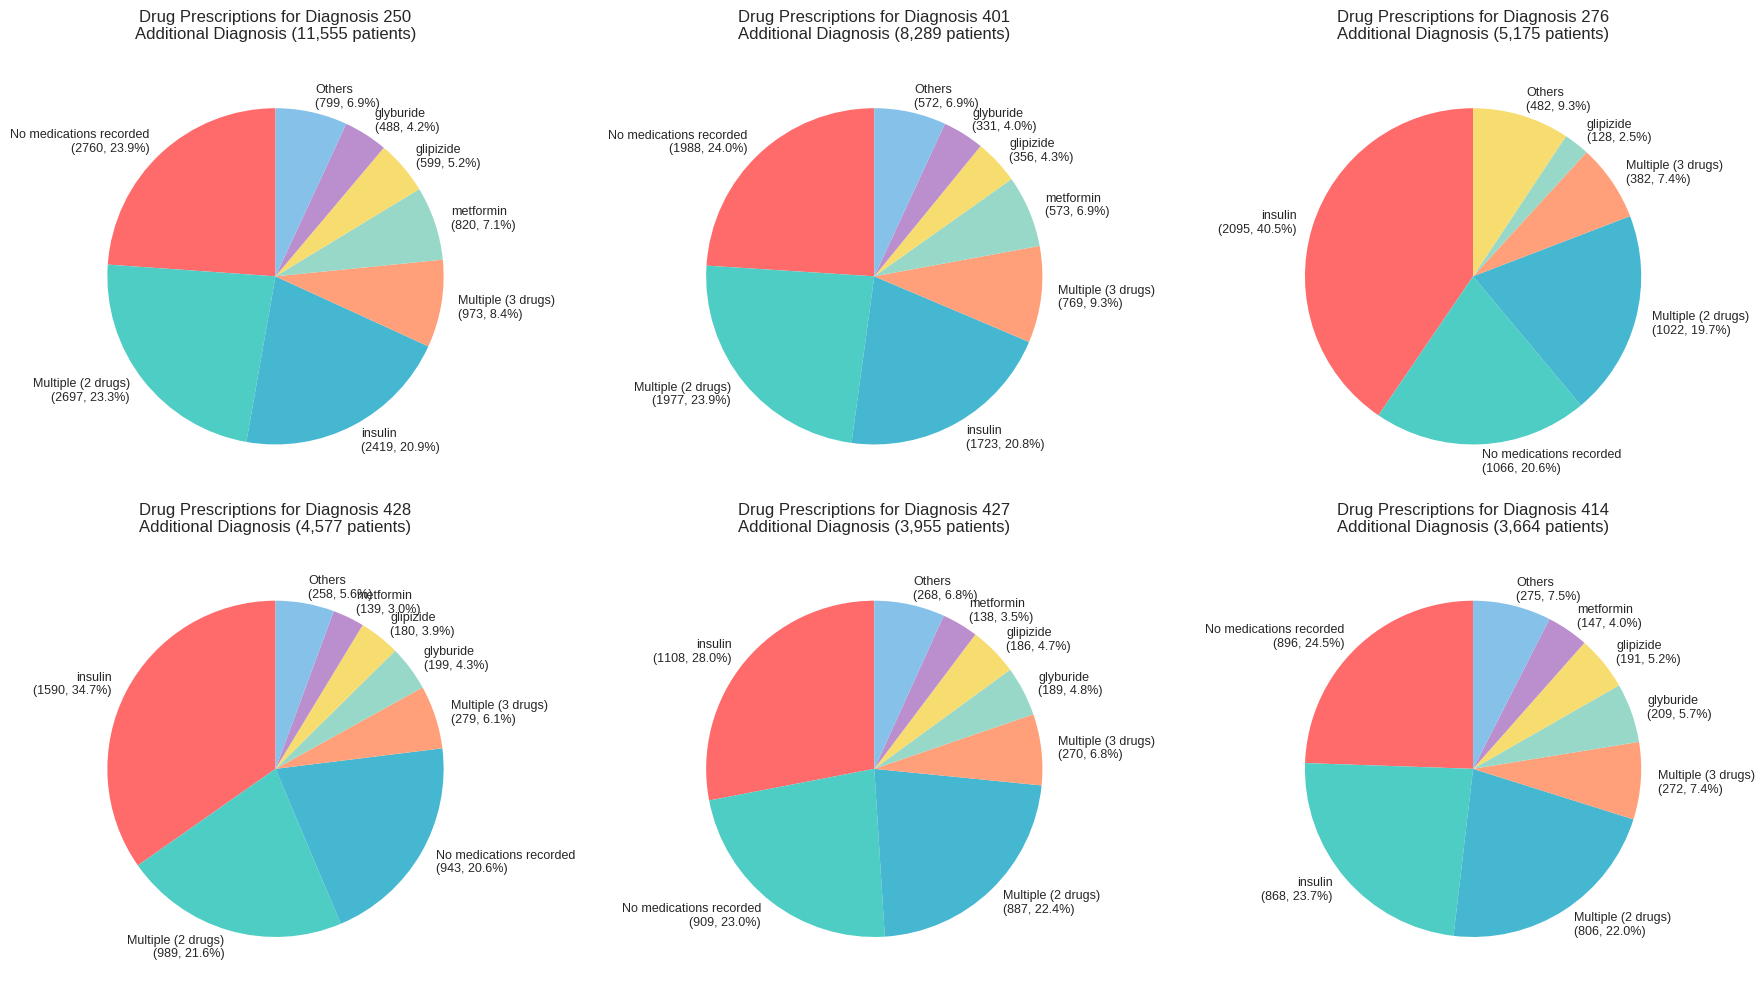


Detailed drug prescription statistics for diag_3:

Diagnosis 250 (11555 patients):
Individual drug prescription rates:
  insulin        : 4995/11555 (43.2%)
  metformin      : 3132/11555 (27.1%)
  glipizide      : 1682/11555 (14.6%)
  glyburide      : 1450/11555 (12.5%)
  pioglitazone   : 980/11555 ( 8.5%)
  rosiglitazone  : 810/11555 ( 7.0%)
  glimepiride    : 654/11555 ( 5.7%)
  repaglinide    : 121/11555 ( 1.0%)
  nateglinide    :  62/11555 ( 0.5%)
  acarbose       :  25/11555 ( 0.2%)

Diagnosis 401 (8289 patients):
Individual drug prescription rates:
  insulin        : 3693/8289 (44.6%)
  metformin      : 2321/8289 (28.0%)
  glipizide      : 1157/8289 (14.0%)
  glyburide      : 1083/8289 (13.1%)
  pioglitazone   : 740/8289 ( 8.9%)
  rosiglitazone  : 629/8289 ( 7.6%)
  glimepiride    : 454/8289 ( 5.5%)
  repaglinide    :  97/8289 ( 1.2%)
  nateglinide    :  55/8289 ( 0.7%)
  acarbose       :  21/8289 ( 0.3%)

Diagnosis 276 (5175 patients):
Individual drug prescription rates:
  insu

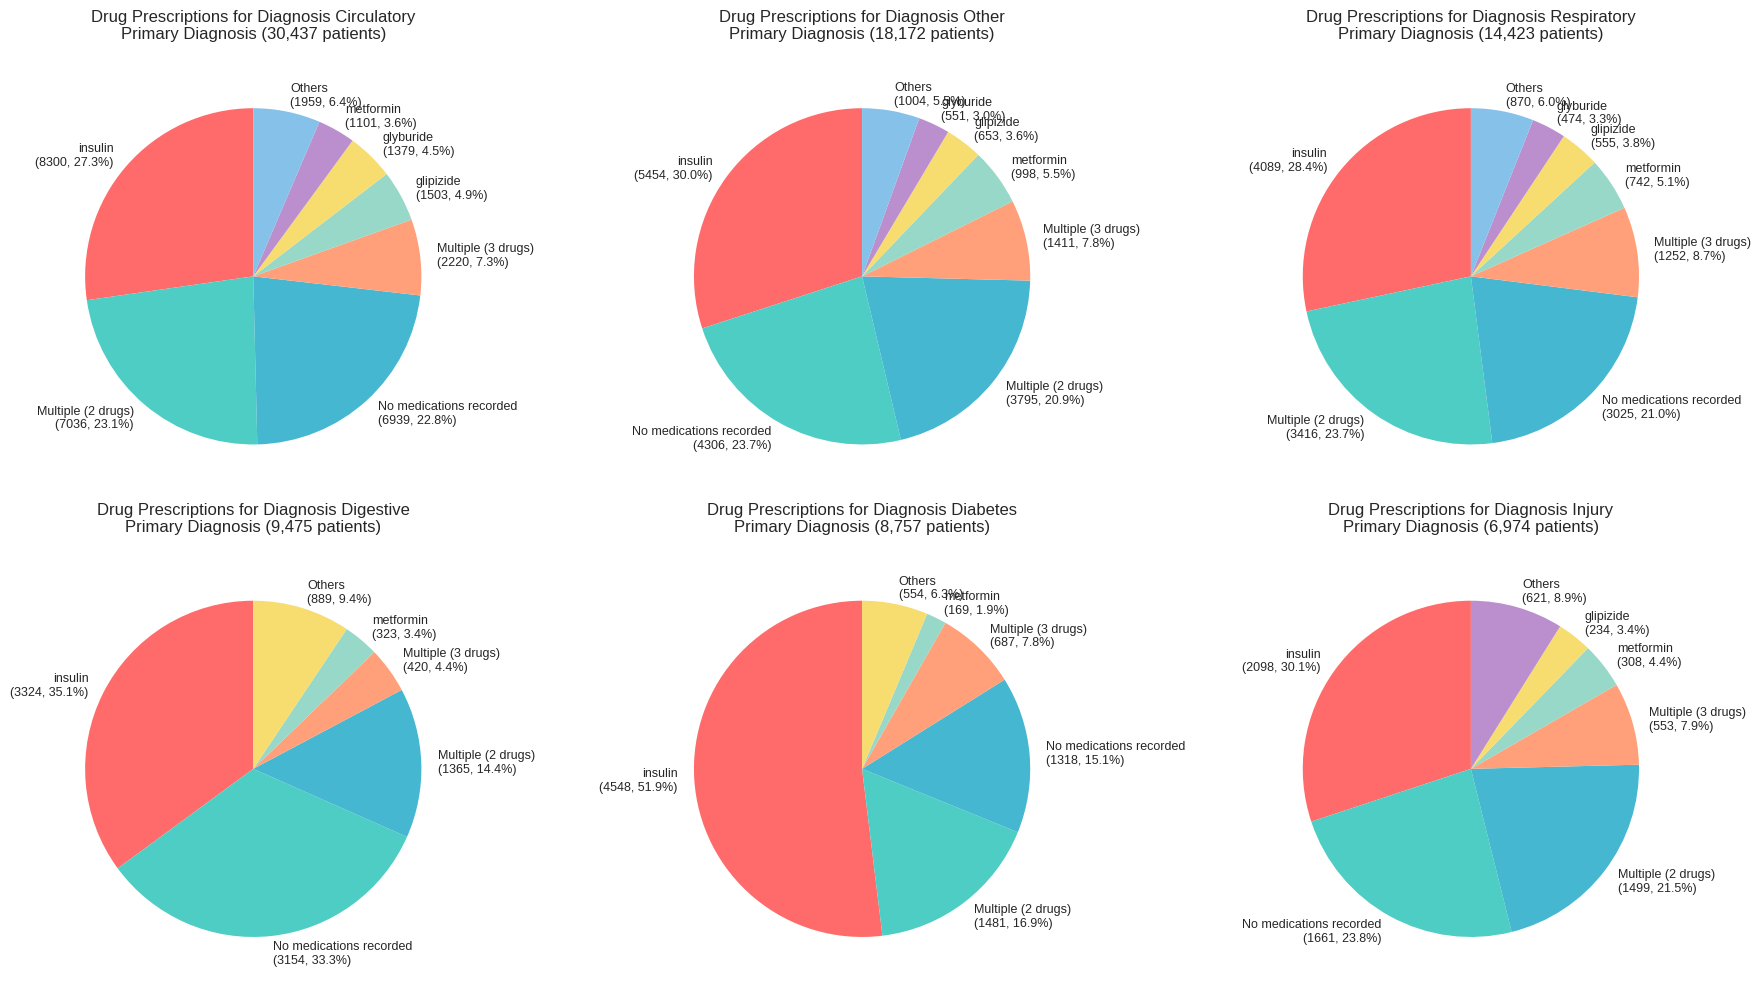


Detailed drug prescription statistics for diag_1_group:

Diagnosis Circulatory (30437 patients):
Individual drug prescription rates:
  insulin        : 15506/30437 (50.9%)
  metformin      : 5367/30437 (17.6%)
  glipizide      : 4399/30437 (14.5%)
  glyburide      : 3912/30437 (12.9%)
  pioglitazone   : 2273/30437 ( 7.5%)
  rosiglitazone  : 1953/30437 ( 6.4%)
  glimepiride    : 1802/30437 ( 5.9%)
  repaglinide    : 534/30437 ( 1.8%)
  nateglinide    : 214/30437 ( 0.7%)
  acarbose       : 101/30437 ( 0.3%)

Diagnosis Other (18172 patients):
Individual drug prescription rates:
  insulin        : 9422/18172 (51.8%)
  metformin      : 4008/18172 (22.1%)
  glipizide      : 2211/18172 (12.2%)
  glyburide      : 1736/18172 ( 9.6%)
  pioglitazone   : 1328/18172 ( 7.3%)
  rosiglitazone  : 1143/18172 ( 6.3%)
  glimepiride    : 830/18172 ( 4.6%)
  repaglinide    : 287/18172 ( 1.6%)
  nateglinide    : 154/18172 ( 0.8%)
  acarbose       :  50/18172 ( 0.3%)

Diagnosis Respiratory (14423 patients):


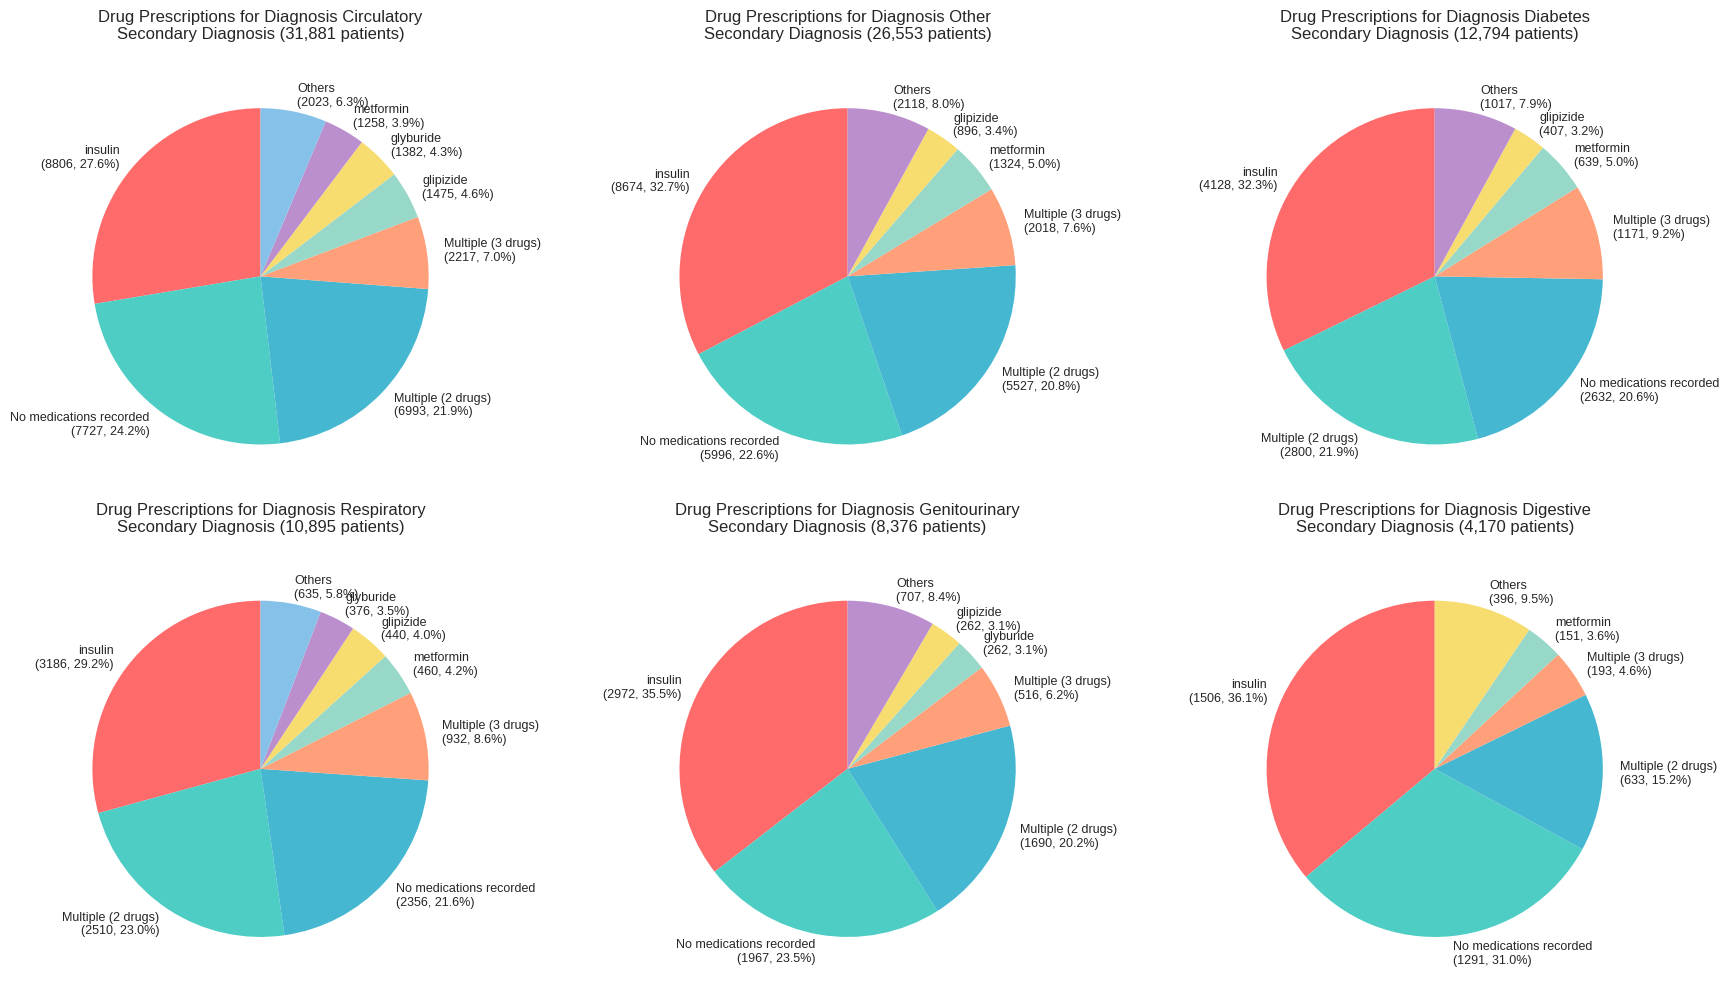


Detailed drug prescription statistics for diag_2_group:

Diagnosis Circulatory (31881 patients):
Individual drug prescription rates:
  insulin        : 15907/31881 (49.9%)
  metformin      : 5490/31881 (17.2%)
  glipizide      : 4296/31881 (13.5%)
  glyburide      : 3827/31881 (12.0%)
  pioglitazone   : 2280/31881 ( 7.2%)
  rosiglitazone  : 2007/31881 ( 6.3%)
  glimepiride    : 1855/31881 ( 5.8%)
  repaglinide    : 551/31881 ( 1.7%)
  nateglinide    : 247/31881 ( 0.8%)
  acarbose       :  98/31881 ( 0.3%)

Diagnosis Other (26553 patients):
Individual drug prescription rates:
  insulin        : 14677/26553 (55.3%)
  metformin      : 5645/26553 (21.3%)
  glipizide      : 3111/26553 (11.7%)
  glyburide      : 2436/26553 ( 9.2%)
  pioglitazone   : 1913/26553 ( 7.2%)
  rosiglitazone  : 1632/26553 ( 6.1%)
  glimepiride    : 1190/26553 ( 4.5%)
  repaglinide    : 342/26553 ( 1.3%)
  nateglinide    : 181/26553 ( 0.7%)
  acarbose       :  74/26553 ( 0.3%)

Diagnosis Diabetes (12794 patients):
I

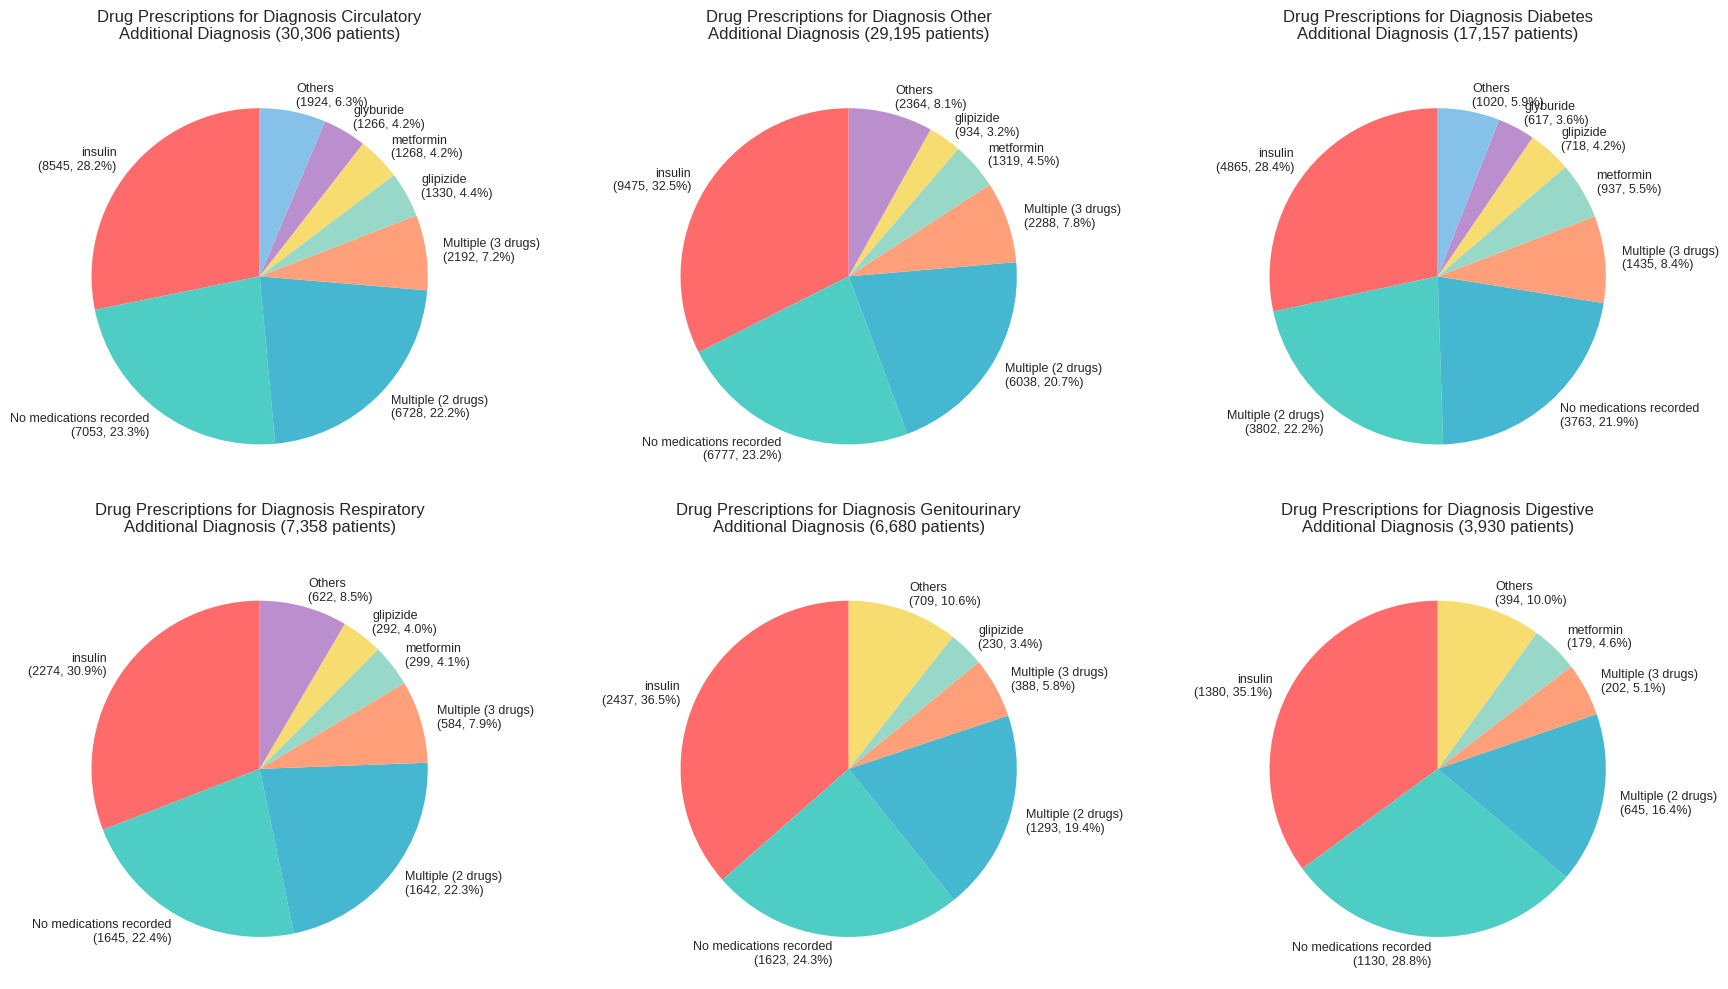


Detailed drug prescription statistics for diag_3_group:

Diagnosis Circulatory (30306 patients):
Individual drug prescription rates:
  insulin        : 15434/30306 (50.9%)
  metformin      : 5594/30306 (18.5%)
  glipizide      : 4016/30306 (13.3%)
  glyburide      : 3615/30306 (11.9%)
  pioglitazone   : 2257/30306 ( 7.4%)
  rosiglitazone  : 1961/30306 ( 6.5%)
  glimepiride    : 1696/30306 ( 5.6%)
  repaglinide    : 545/30306 ( 1.8%)
  nateglinide    : 246/30306 ( 0.8%)
  acarbose       : 113/30306 ( 0.4%)

Diagnosis Other (29195 patients):
Individual drug prescription rates:
  insulin        : 16164/29195 (55.4%)
  metformin      : 6028/29195 (20.6%)
  glipizide      : 3382/29195 (11.6%)
  glyburide      : 2737/29195 ( 9.4%)
  pioglitazone   : 2011/29195 ( 6.9%)
  rosiglitazone  : 1843/29195 ( 6.3%)
  glimepiride    : 1399/29195 ( 4.8%)
  repaglinide    : 421/29195 ( 1.4%)
  nateglinide    : 202/29195 ( 0.7%)
  acarbose       :  80/29195 ( 0.3%)

Diagnosis Diabetes (17157 patients):
I

In [56]:
from collections import Counter
print("DRUG PRESCRIPTIONS BY DIAGNOSIS CODE ANALYSIS")

medication_keywords = ['insulin', 'metformin', 'drug', 'medication', 'med_', 'glipizide',
                      'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose',
                      'miglitol', 'troglitazone', 'tolazamide', 'acetohexamide',
                      'tolbutamide', 'avandia', 'prandin', 'precose', 'diabeta']

# Find medication columns
medication_cols = []
for col in df.columns:
    if any(keyword in col.lower() for keyword in medication_keywords):
        medication_cols.append(col)

print("Available medication columns:")
for i, col in enumerate(medication_cols, 1):
    unique_vals = df[col].value_counts().head(5)
    print(f"{i:2d}. {col}")
    print(f"    Unique values: {df[col].nunique()}")
    print(f"    Top values: {list(unique_vals.index)}")
    print()

# Check if we have the expected diabetes medication columns
expected_cols = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
                'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',
                'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
                'miglitol', 'troglitazone', 'tolazamide', 'insulin']

available_drug_cols = [col for col in expected_cols if col in df.columns]
print(f"Standard diabetes medication columns found: {len(available_drug_cols)}")
print(f"Available drug columns: {available_drug_cols}")

distinct_colors = [
            '#FF6B6B',  # Red
            '#4ECDC4',  # Teal
            '#45B7D1',  # Blue
            '#FFA07A',  # Light Salmon
            '#98D8C8',  # Light Sea Green
            '#F7DC6F',  # Yellow
            '#BB8FCE',  # Light Purple
            '#85C1E9',  # Light Blue
            '#F8C471',  # Orange
            '#82E0AA',  # Light Green
            '#E8A49C',  # Light Pink
            '#A9CCE3',  # Powder Blue
            '#F9E79F',  # Light Yellow
            '#D7BDE2',  # Lavender
            '#A3E4D7',  # Aqua
            '#FADBD8',  # Misty Rose
            '#D5A6BD',  # Plum
            '#AED6F1',  # Alice Blue
            '#F4D03F',  # Gold
            '#ABEBC6'   # Mint Green
        ]

if not available_drug_cols:
    print("No standard medication columns found. Checking for alternative patterns...")
    # Look for any columns that might contain drug information
    possible_drug_cols = [col for col in df.columns if
                         'drug' in col.lower() or 'med' in col.lower() or
                         any(drug in col.lower() for drug in ['insulin', 'metformin'])]
    print(f"Possible drug columns: {possible_drug_cols}")
    available_drug_cols = possible_drug_cols

def get_drug_profile(row, drug_columns):
    """Get list of drugs prescribed for a patient"""
    prescribed_drugs = []
    for drug_col in drug_columns:
        if drug_col in row.index:
            value = row[drug_col]
            # Check different ways drugs might be encoded
            if pd.notna(value):
                # Common encodings: 'Yes', 'Up', 'Down', 'Steady', '1', 'Y'
                if str(value).lower() in ['yes', 'up', 'down', 'steady', '1', 'y', 'true']:
                    prescribed_drugs.append(drug_col)
                elif str(value).lower() not in ['no', 'n', '0', 'false', '?']:
                    # If it's not clearly a 'no', consider it prescribed
                    prescribed_drugs.append(drug_col)

    return prescribed_drugs if prescribed_drugs else ['No medications recorded']

def create_diagnosis_drug_pie_charts(data, diag_col, title_suffix, top_n_diag=8, min_patients=50):
    """Create pie charts showing drug distributions for top diagnosis codes"""

    if diag_col not in data.columns:
        print(f"Column {diag_col} not found")
        return

    if not available_drug_cols:
        print(f"No medication columns available for analysis")
        return

    print(f"\nAnalyzing drug prescriptions for {diag_col} {title_suffix}")
    print("-" * 60)

    # Get top diagnosis codes
    diag_counts = data[diag_col].value_counts()
    top_diagnoses = diag_counts[diag_counts >= min_patients].head(top_n_diag).index.tolist()

    print(f"Top {len(top_diagnoses)} diagnosis codes (≥{min_patients} patients):")
    for i, diag in enumerate(top_diagnoses, 1):
        count = diag_counts[diag]
        print(f"{i:2d}. {diag}: {count:,} patients")

    # Calculate grid dimensions
    n_cols = min(3, len(top_diagnoses))
    n_rows = (len(top_diagnoses) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))

    # Handle single subplot case
    if len(top_diagnoses) == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes if len(top_diagnoses) > 1 else [axes]
    else:
        axes = axes.flatten()

    for i, diag_code in enumerate(top_diagnoses):
        if i >= len(axes):
            break

        # Filter data for this diagnosis
        diag_data = data[data[diag_col] == diag_code].copy()

        # Get drug profiles for all patients with this diagnosis
        drug_combinations = []
        for idx, row in diag_data.iterrows():
            drugs = get_drug_profile(row, available_drug_cols)
            if len(drugs) == 1:
                drug_combinations.append(drugs[0])
            elif len(drugs) > 1:
                drug_combinations.append(f"Multiple ({len(drugs)} drugs)")
            else:
                drug_combinations.append("No medications recorded")

        # Count drug occurrences
        drug_counts = Counter(drug_combinations)

        # Prepare data for pie chart
        labels = []
        sizes = []

        # Group small categories into "Others"
        total_patients = len(diag_data)
        other_count = 0
        other_threshold = 0.03  # 3% threshold

        for drug, count in drug_counts.most_common():
            percentage = count / total_patients
            if percentage >= other_threshold or len(labels) < 5:
                labels.append(f"{drug}\n({count}, {percentage:.1%})")
                sizes.append(count)
            else:
                other_count += count

        if other_count > 0:
            labels.append(f"Others\n({other_count}, {other_count/total_patients:.1%})")
            sizes.append(other_count)

        # Select colors for this specific pie chart
        colors = distinct_colors[:len(sizes)]
        if len(sizes) > len(distinct_colors):
            # If we need more colors, cycle through the palette
            colors = (distinct_colors * ((len(sizes) // len(distinct_colors)) + 1))[:len(sizes)]

        # Create pie chart
        ax = axes[i]
        wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='',
                                         startangle=90, colors=colors[:len(sizes)])

        ax.set_title(f'Drug Prescriptions for Diagnosis {diag_code}\n'
                    f'{title_suffix} ({total_patients:,} patients)',
                    fontsize=12, pad=20)

        # Adjust text size
        for text in texts:
            text.set_fontsize(9)

    # Remove empty subplots
    for i in range(len(top_diagnoses), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

    # Print detailed statistics
    print(f"\nDetailed drug prescription statistics for {diag_col}:")
    for diag_code in top_diagnoses:
        diag_data = data[data[diag_col] == diag_code].copy()

        print(f"\nDiagnosis {diag_code} ({len(diag_data)} patients):")

        # Calculate individual drug prescription rates
        drug_stats = {}
        for drug_col in available_drug_cols:
            if drug_col in diag_data.columns:
                prescribed = 0
                total_with_data = 0
                for _, row in diag_data.iterrows():
                    if pd.notna(row[drug_col]):
                        total_with_data += 1
                        value = str(row[drug_col]).lower()
                        if value in ['yes', 'up', 'down', 'steady', '1', 'y', 'true']:
                            prescribed += 1

                if total_with_data > 0:
                    rate = prescribed / total_with_data
                    drug_stats[drug_col] = {'prescribed': prescribed, 'total': total_with_data, 'rate': rate}

        # Sort by prescription rate
        sorted_drugs = sorted(drug_stats.items(), key=lambda x: x[1]['rate'], reverse=True)

        print("Individual drug prescription rates:")
        for drug, stats in sorted_drugs[:10]:  # Top 10
            if stats['rate'] > 0:
                print(f"  {drug:15s}: {stats['prescribed']:3d}/{stats['total']:3d} "
                      f"({stats['rate']:5.1%})")

# Analyze individual diagnosis columns
diagnosis_columns = ['diag_1', 'diag_2', 'diag_3', 'diag_1_group', 'diag_2_group', 'diag_3_group']

for diag_col in diagnosis_columns:
    if diag_col in df.columns:
        if 'diag_1' in diag_col:
            title = "Primary Diagnosis"
        elif 'diag_2' in diag_col:
            title = "Secondary Diagnosis"
        else:
            title = "Additional Diagnosis"

        create_diagnosis_drug_pie_charts(df, diag_col, title, top_n_diag=6)









COMBINED ANALYSIS: DRUG PRESCRIPTIONS ACROSS ALL DIAGNOSIS POSITIONS
Top diagnosis codes across all positions (≥100 occurrences):
 1. 428: 18,101 total occurrences (Primary: 101745, Secondary: diag_2, Additional: diag_3)
 2. 250: 17,861 total occurrences (Primary: 101745, Secondary: diag_2, Additional: diag_3)
 3. 276: 13,816 total occurrences (Primary: 101745, Secondary: diag_2, Additional: diag_3)
 4. 414: 12,895 total occurrences (Primary: 101745, Secondary: diag_2, Additional: diag_3)
 5. 401: 12,371 total occurrences (Primary: 101745, Secondary: diag_2, Additional: diag_3)
 6. 427: 11,757 total occurrences (Primary: 101745, Secondary: diag_2, Additional: diag_3)
 7. 599: 6,824 total occurrences (Primary: 101745, Secondary: diag_2, Additional: diag_3)
 8. 496: 5,990 total occurrences (Primary: 101745, Secondary: diag_2, Additional: diag_3)


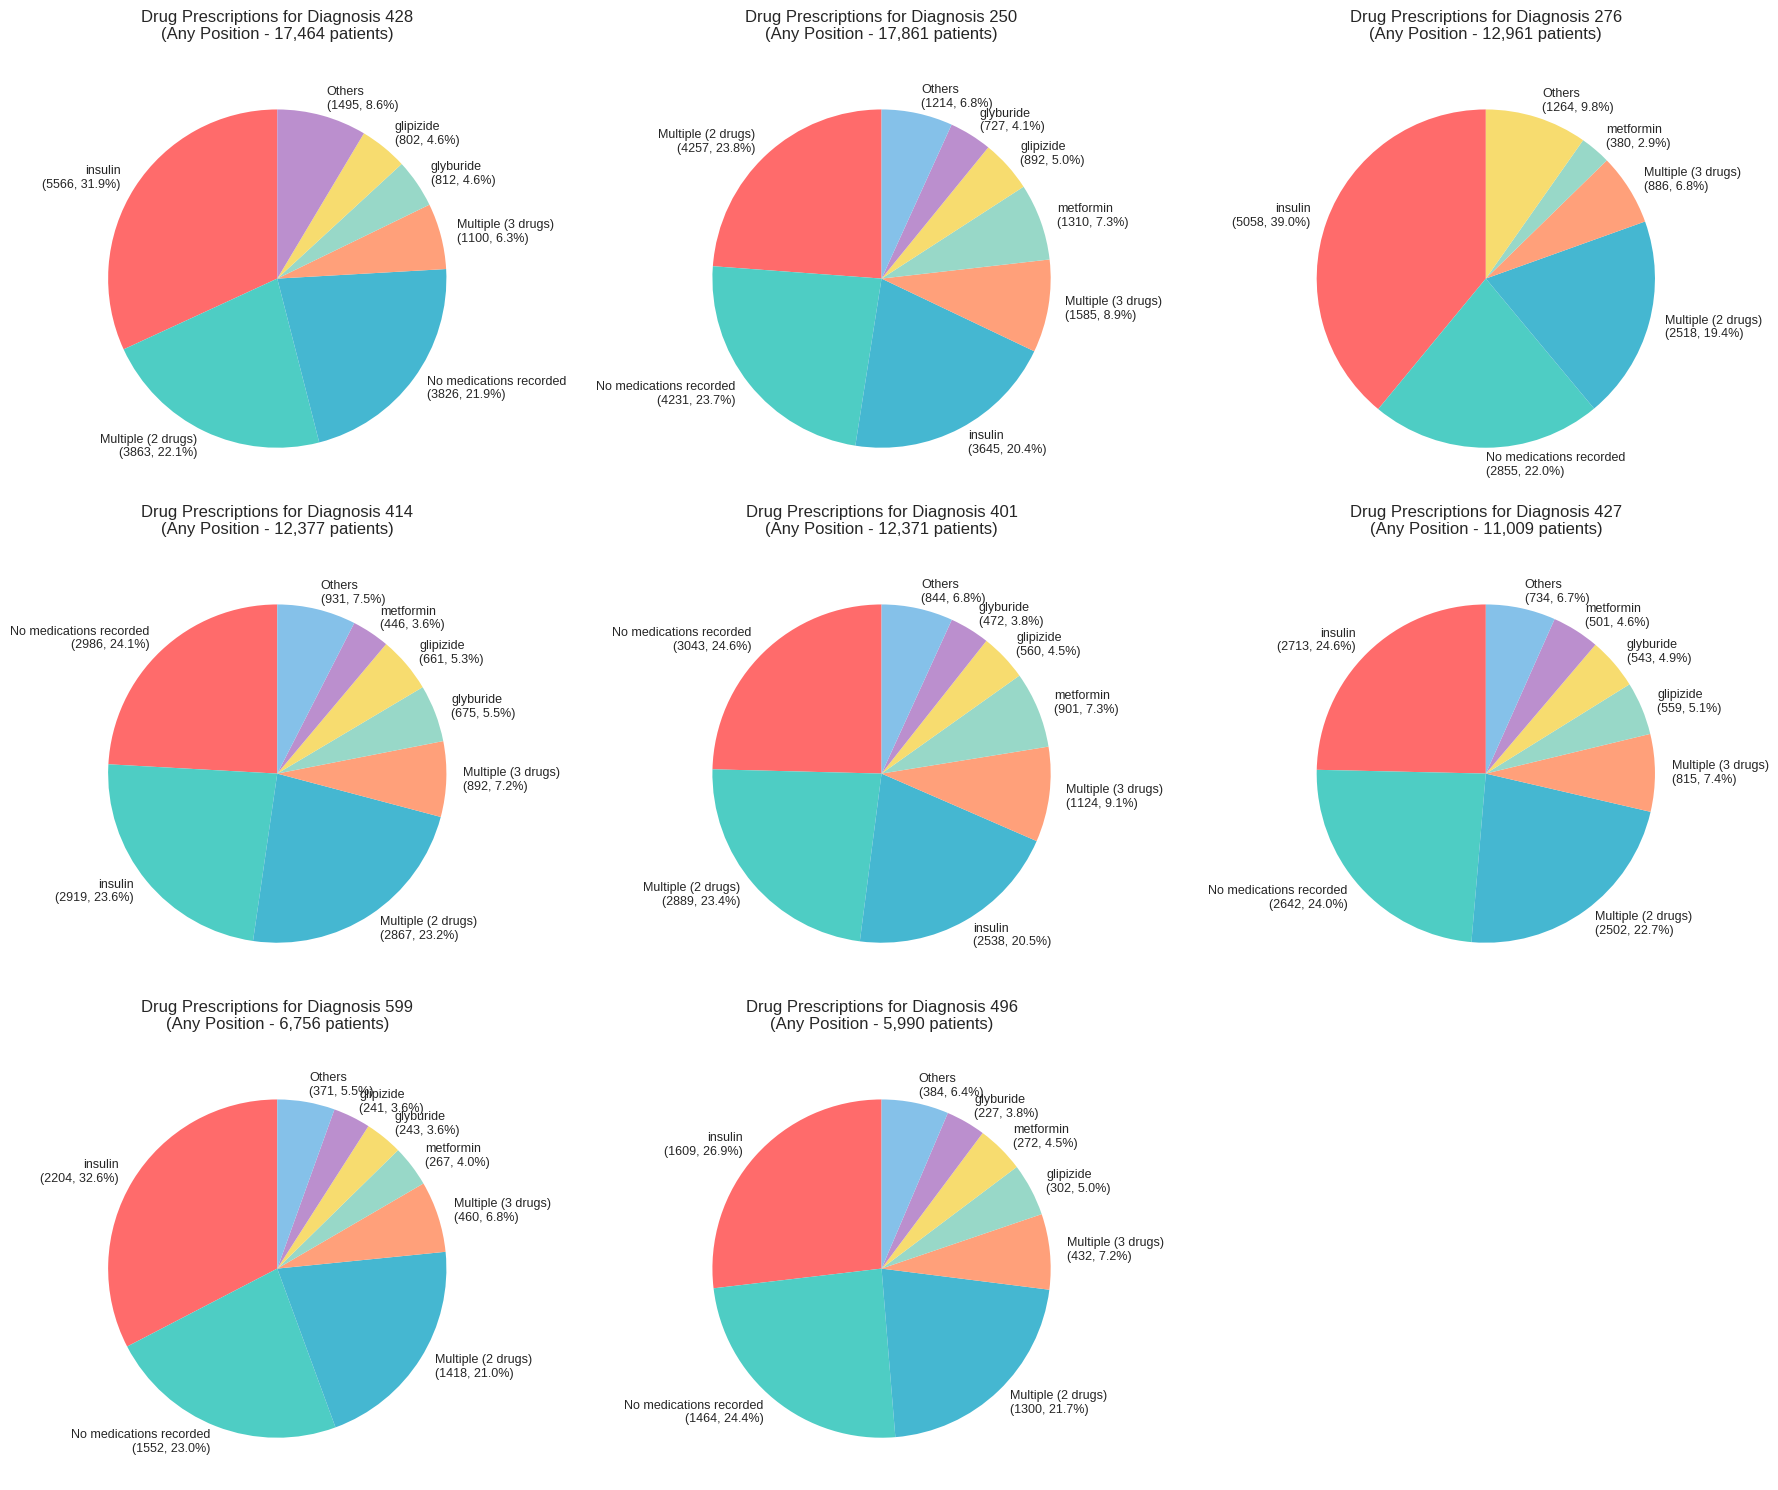

In [59]:
# Combined analysis across all three diagnosis columns
print(f"\n" + "="*80)
print("COMBINED ANALYSIS: DRUG PRESCRIPTIONS ACROSS ALL DIAGNOSIS POSITIONS")
print("="*80)

def create_combined_diagnosis_drug_analysis(data,
                                            diagnosis_columns=['diag_1', 'diag_2', 'diag_3'],
                                            diagnosis_positions_pre={'diag_1': 0, 'diag_2': 0, 'diag_3': 0, 'total': 0},
                                            min_patients=100):
    """Analyze drug prescriptions for diagnoses appearing in any position"""

    if not available_drug_cols:
        print("No medication columns available for combined analysis")
        return

    # Collect all diagnosis codes from all three positions
    all_diagnoses = []
    diagnosis_positions = {}

    for diag_col in diagnosis_columns:
        if diag_col in data.columns:
            for idx, diag in data[diag_col].dropna().items():
                all_diagnoses.append(diag)
                if diag not in diagnosis_positions:
                    diagnosis_positions[diag] = diagnosis_positions_pre
                diagnosis_positions[diag][diag_col] += 1
                diagnosis_positions[diag]['total'] += 1

    # Get top diagnoses across all positions
    diag_counter = Counter(all_diagnoses)
    top_combined_diagnoses = [diag for diag, count in diag_counter.most_common() if count >= min_patients][:8]

    print(f"Top diagnosis codes across all positions (≥{min_patients} occurrences):")
    for i, diag in enumerate(top_combined_diagnoses, 1):
        total_count = diag_counter[diag]
        pos_info = diagnosis_positions[diag]
        print(f"{i:2d}. {diag}: {total_count:,} total occurrences "
              f"(Primary: {pos_info[diagnosis_columns[0]]}, Secondary: {diagnosis_columns[1]}, "
              f"Additional: {diagnosis_columns[2]})")

    # Create pie charts for combined analysis
    n_cols = min(3, len(top_combined_diagnoses))
    n_rows = (len(top_combined_diagnoses) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(6*n_cols, 5*n_rows))

    if len(top_combined_diagnoses) == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = axes if len(top_combined_diagnoses) > 1 else [axes]
    else:
        axes = axes.flatten()

    for i, diag_code in enumerate(top_combined_diagnoses):
        if i >= len(axes):
            break

        # Get all patients with this diagnosis in any position
        mask = ((data[diagnosis_columns[0]] == diag_code) |
                (data[diagnosis_columns[1]] == diag_code) |
                (data[diagnosis_columns[2]] == diag_code))
        diag_patients = data[mask].copy()

        # Get drug profiles
        drug_combinations = []
        for idx, row in diag_patients.iterrows():
            drugs = get_drug_profile(row, available_drug_cols)
            if len(drugs) == 1:
                drug_combinations.append(drugs[0])
            elif len(drugs) > 1:
                drug_combinations.append(f"Multiple ({len(drugs)} drugs)")
            else:
                drug_combinations.append("No medications recorded")

        # Count and create pie chart
        drug_counts = Counter(drug_combinations)

        labels = []
        sizes = []

        total_patients = len(diag_patients)
        other_count = 0
        other_threshold = 0.03

        for drug, count in drug_counts.most_common():
            percentage = count / total_patients
            if percentage >= other_threshold or len(labels) < 5:
                labels.append(f"{drug}\n({count}, {percentage:.1%})")
                sizes.append(count)
            else:
                other_count += count

        if other_count > 0:
            labels.append(f"Others\n({other_count}, {other_count/total_patients:.1%})")
            sizes.append(other_count)

        # Select colors for this specific pie chart
        colors = distinct_colors[:len(sizes)]
        if len(sizes) > len(distinct_colors):
            # If we need more colors, cycle through the palette
            colors = (distinct_colors * ((len(sizes) // len(distinct_colors)) + 1))[:len(sizes)]


        ax = axes[i]
        wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='',
                                         startangle=90, colors=colors[:len(sizes)])

        ax.set_title(f'Drug Prescriptions for Diagnosis {diag_code}\n'
                    f'(Any Position - {total_patients:,} patients)',
                    fontsize=12, pad=20)

        for text in texts:
            text.set_fontsize(9)

    # Remove empty subplots
    for i in range(len(top_combined_diagnoses), len(axes)):
        if i < len(axes):
            fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# Run combined analysis for diag_1, diag_2, diag_3
create_combined_diagnosis_drug_analysis(df, min_patients=100)

Top diagnosis codes across all positions (≥100 occurrences):
 1. Circulatory: 92,624 total occurrences (Primary: 101745, Secondary: diag_2_group, Additional: diag_3_group)
 2. Other: 73,920 total occurrences (Primary: 101745, Secondary: diag_2_group, Additional: diag_3_group)
 3. Diabetes: 38,708 total occurrences (Primary: 101745, Secondary: diag_2_group, Additional: diag_3_group)
 4. Respiratory: 32,676 total occurrences (Primary: 101745, Secondary: diag_2_group, Additional: diag_3_group)
 5. Genitourinary: 20,173 total occurrences (Primary: 101745, Secondary: diag_2_group, Additional: diag_3_group)
 6. Digestive: 17,575 total occurrences (Primary: 101745, Secondary: diag_2_group, Additional: diag_3_group)
 7. Injury: 11,348 total occurrences (Primary: 101745, Secondary: diag_2_group, Additional: diag_3_group)
 8. Musculoskeletal: 8,636 total occurrences (Primary: 101745, Secondary: diag_2_group, Additional: diag_3_group)


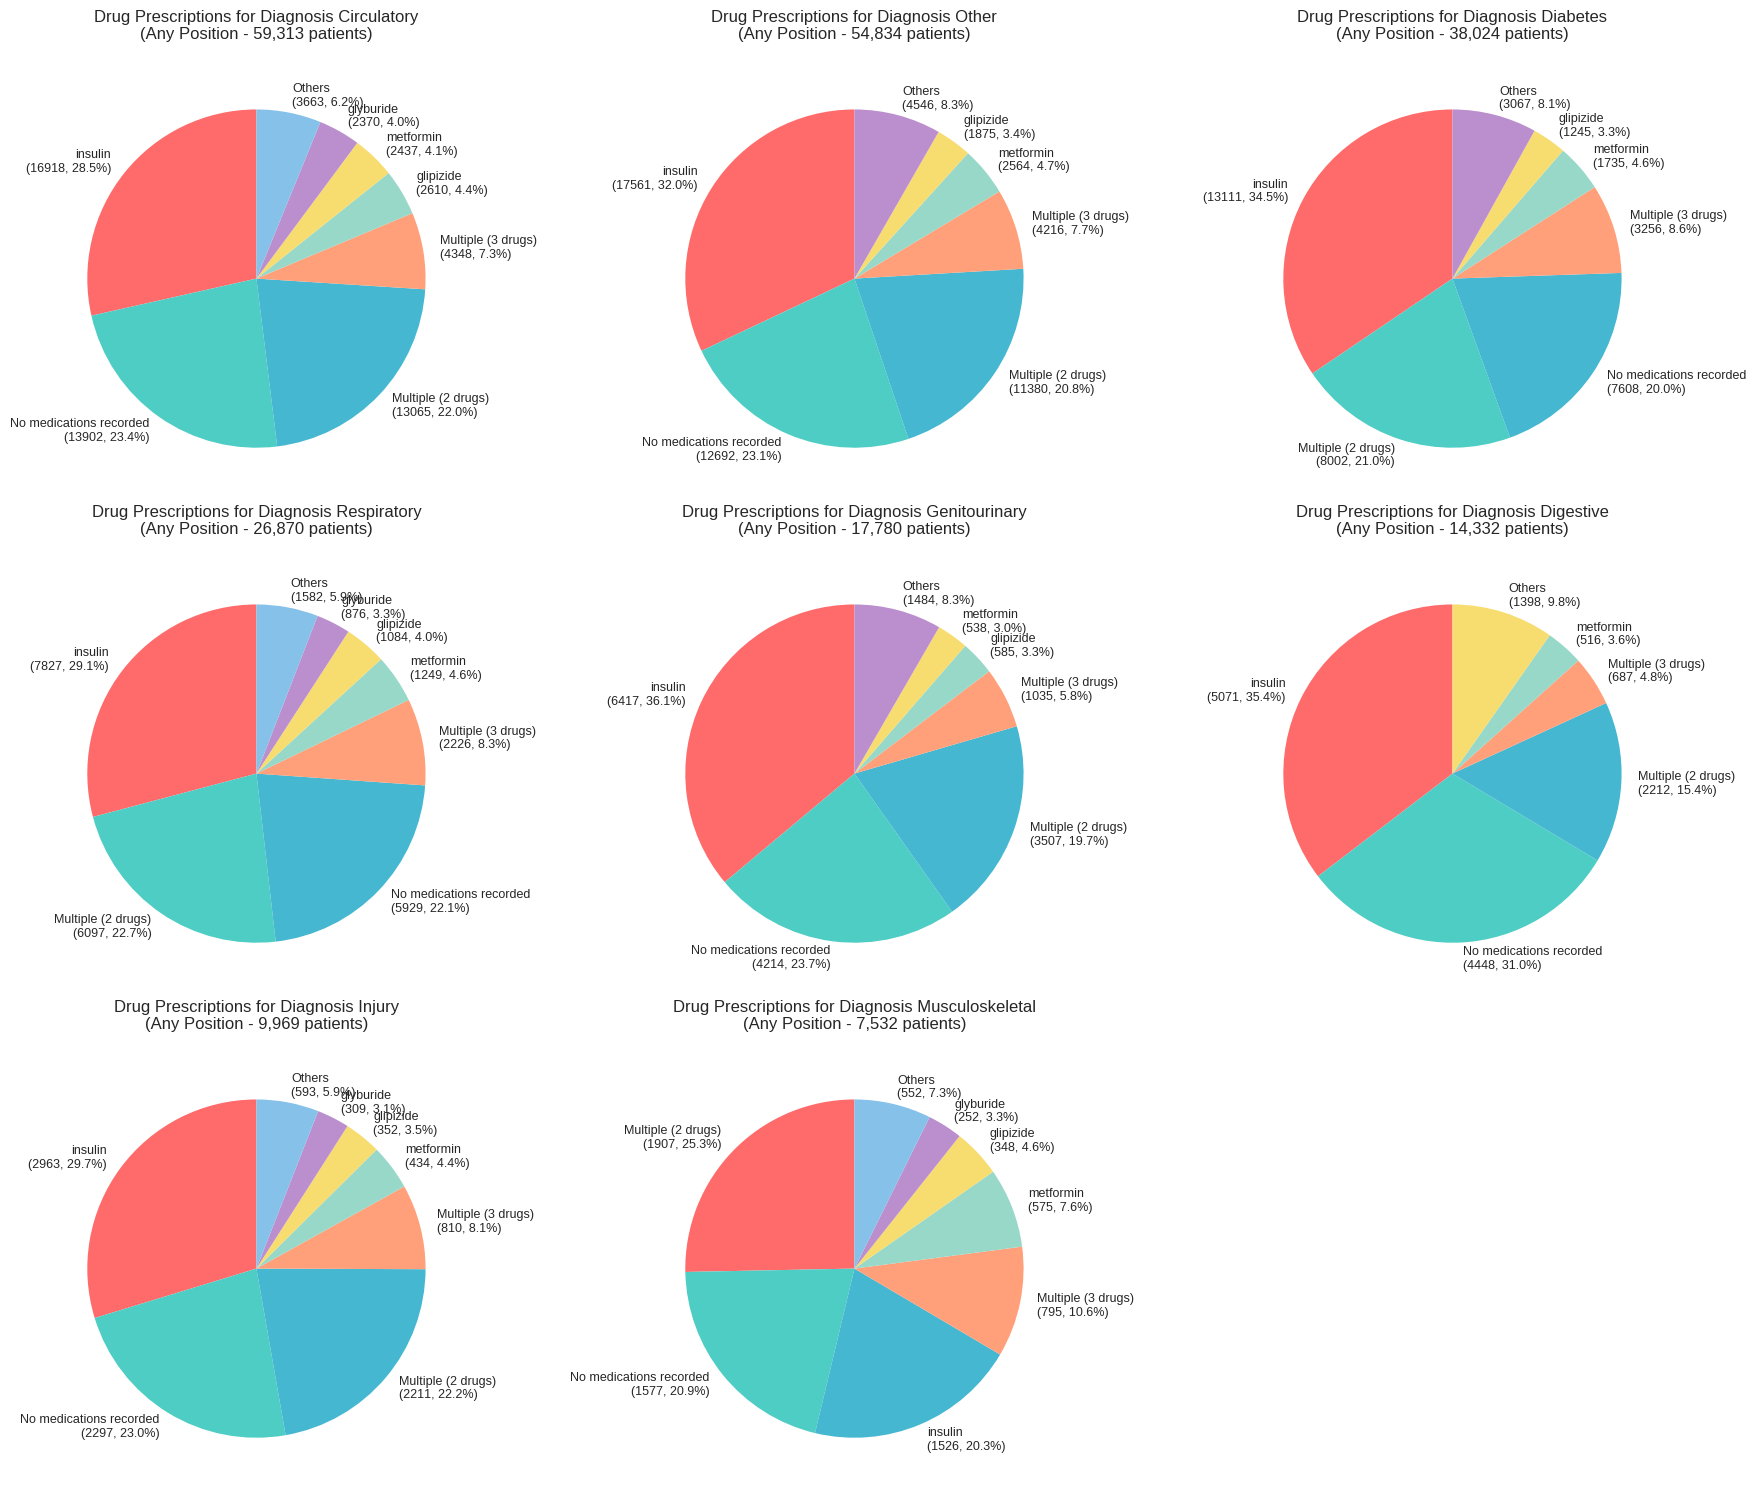


SUMMARY STATISTICS
Medication columns analyzed: 16
Medication columns: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, insulin

Overall drug prescription rates across all patients:
insulin        : 54,383/101,766 (53.4%)
metformin      : 19,988/101,766 (19.6%)
glipizide      : 12,686/101,766 (12.5%)
glyburide      : 10,650/101,766 (10.5%)
pioglitazone   : 7,328/101,766 ( 7.2%)
rosiglitazone  : 6,365/101,766 ( 6.3%)
glimepiride    : 5,191/101,766 ( 5.1%)
repaglinide    : 1,539/101,766 ( 1.5%)
nateglinide    :   703/101,766 ( 0.7%)
acarbose       :   308/101,766 ( 0.3%)
chlorpropamide :    86/101,766 ( 0.1%)
tolazamide     :    39/101,766 ( 0.0%)
miglitol       :    38/101,766 ( 0.0%)
tolbutamide    :    23/101,766 ( 0.0%)
troglitazone   :     3/101,766 ( 0.0%)
acetohexamide  :     1/101,766 ( 0.0%)


In [60]:
# Run combined analysis for diag_1_group, diag_2_group, diag_3_group
create_combined_diagnosis_drug_analysis(df,
                                        diagnosis_columns=['diag_1_group', 'diag_2_group', 'diag_3_group'],
                                        diagnosis_positions_pre={'diag_1_group': 0, 'diag_2_group': 0, 'diag_3_group': 0, 'total': 0})

# Summary statistics
print(f"\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)

if available_drug_cols:
    print(f"Medication columns analyzed: {len(available_drug_cols)}")
    print(f"Medication columns: {', '.join(available_drug_cols)}")

    # Overall drug prescription rates
    print(f"\nOverall drug prescription rates across all patients:")
    overall_drug_stats = {}

    for drug_col in available_drug_cols:
        if drug_col in df.columns:
            prescribed = 0
            total_with_data = 0

            for _, row in df.iterrows():
                if pd.notna(row[drug_col]):
                    total_with_data += 1
                    value = str(row[drug_col]).lower()
                    if value in ['yes', 'up', 'down', 'steady', '1', 'y', 'true']:
                        prescribed += 1

            if total_with_data > 0:
                rate = prescribed / total_with_data
                overall_drug_stats[drug_col] = {'prescribed': prescribed, 'total': total_with_data, 'rate': rate}

    # Sort by prescription rate
    sorted_overall = sorted(overall_drug_stats.items(), key=lambda x: x[1]['rate'], reverse=True)

    for drug, stats in sorted_overall:
        if stats['rate'] > 0:
            print(f"{drug:15s}: {stats['prescribed']:5,}/{stats['total']:5,} "
                  f"({stats['rate']:5.1%})")
else:
    print("No medication columns found for analysis")

# 10. OUTLIER DETECTION

numerical_cols: ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']

admission_type_id outliers:
  Lower bound: -2.00
  Upper bound: 6.00
  Number of outliers: 341 (0.34%)

discharge_disposition_id outliers:
  Lower bound: -3.50
  Upper bound: 8.50
  Number of outliers: 9818 (9.65%)

admission_source_id outliers:
  Lower bound: -8.00
  Upper bound: 16.00
  Number of outliers: 6956 (6.84%)

time_in_hospital outliers:
  Lower bound: -4.00
  Upper bound: 12.00
  Number of outliers: 2252 (2.21%)

num_lab_procedures outliers:
  Lower bound: -8.00
  Upper bound: 96.00
  Number of outliers: 143 (0.14%)

num_procedures outliers:
  Lower bound: -3.00
  Upper bound: 5.00
  Number of outliers: 4954 (4.87%)

num_medications outliers:
  Lower bound: -5.00
  Upper bound: 35.00
  Number of outliers: 2557 (2.51%)

number_ou

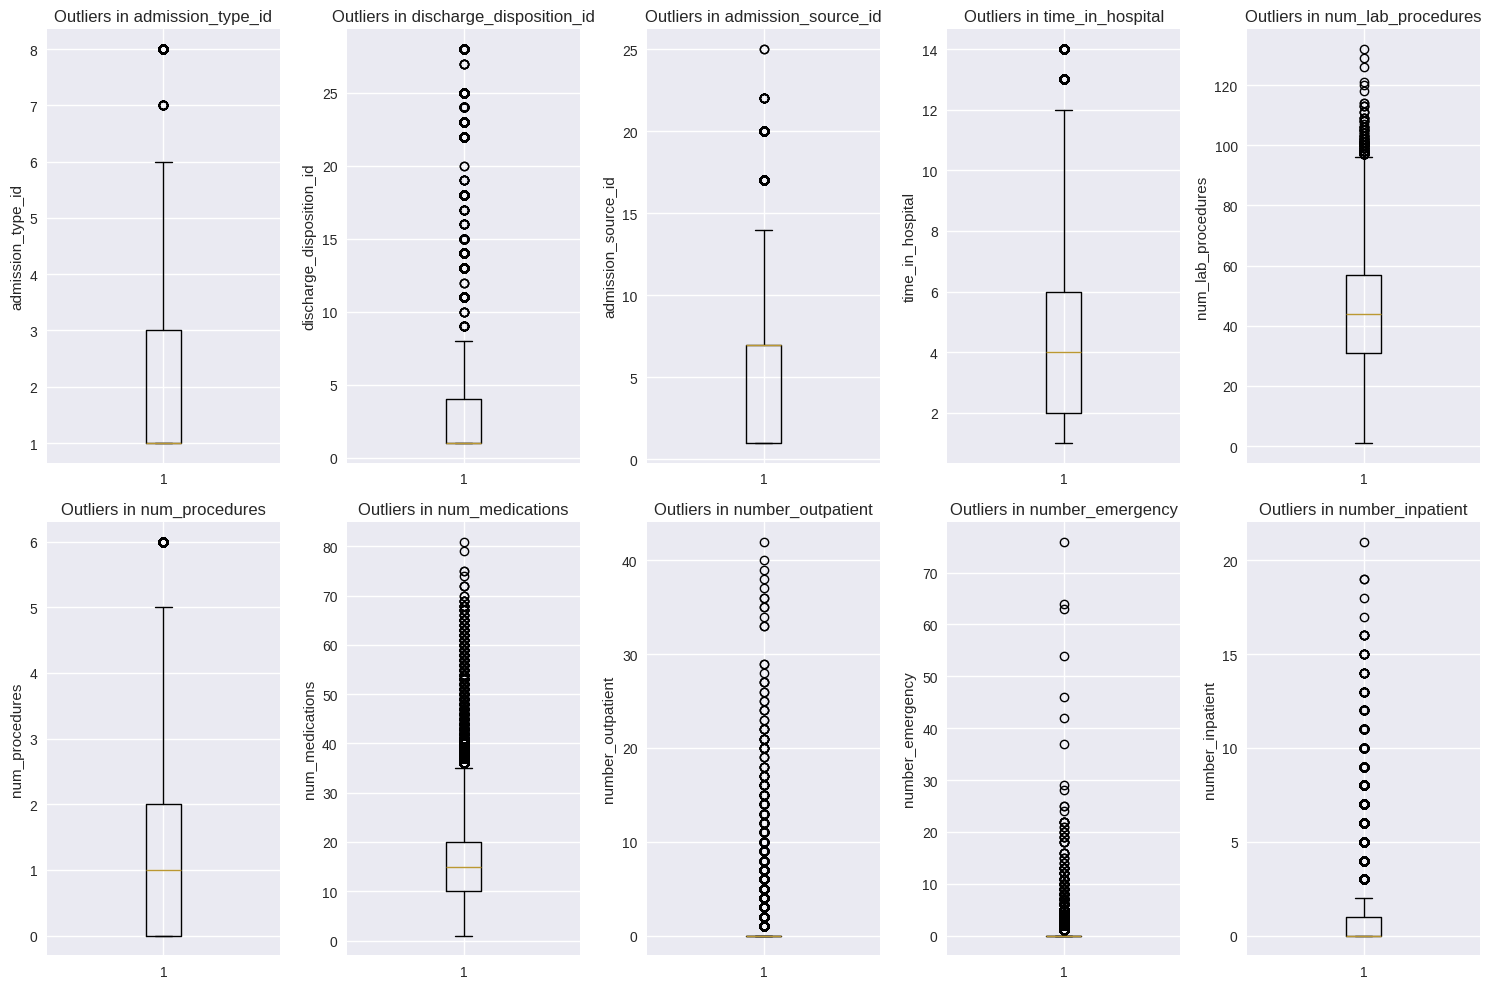

In [27]:
# Focus on key numerical variables for outlier detection
key_numeric_cols = []
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f'numerical_cols: {numerical_cols}')
for col in ['time_in_hospital', 'num_medications', 'number_diagnoses', 'num_lab_procedures']:
    if col in df.columns:
        key_numeric_cols.append(col)

if numerical_cols:
    fig, axes = plt.subplots(2, len(numerical_cols)//2, figsize=(15, 10))
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        if i < len(axes):
            # Box plot for outlier visualization
            axes[i].boxplot(df[col].dropna())
            axes[i].set_title(f'Outliers in {col}')
            axes[i].set_ylabel(col)

            # Calculate outlier statistics
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            print(f"\n{col} outliers:")
            print(f"  Lower bound: {lower_bound:.2f}")
            print(f"  Upper bound: {upper_bound:.2f}")
            print(f"  Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")

    plt.tight_layout()
    plt.show()

# 11. HOSPITALIZATION PATTERNS

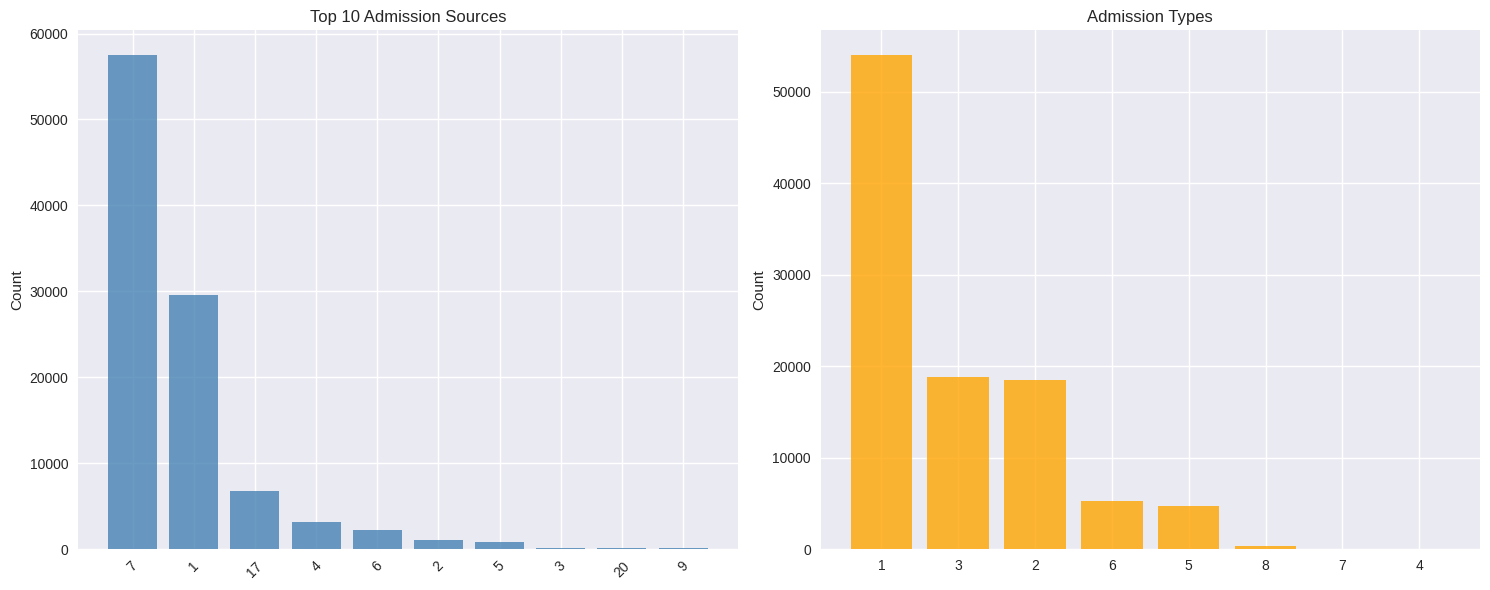

In [28]:
# Admission source and type analysis
if 'admission_source_id' in df.columns and 'admission_type_id' in df.columns:
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    admission_source_counts = df['admission_source_id'].value_counts().head(10)
    plt.bar(range(len(admission_source_counts)), admission_source_counts.values,
            color='steelblue', alpha=0.8)
    plt.xticks(range(len(admission_source_counts)), admission_source_counts.index, rotation=45)
    plt.title('Top 10 Admission Sources')
    plt.ylabel('Count')

    plt.subplot(1, 2, 2)
    admission_type_counts = df['admission_type_id'].value_counts()
    plt.bar(range(len(admission_type_counts)), admission_type_counts.values,
            color='orange', alpha=0.8)
    plt.xticks(range(len(admission_type_counts)), admission_type_counts.index)
    plt.title('Admission Types')
    plt.ylabel('Count')

    plt.tight_layout()
    plt.show()

Available columns for analysis: ['time_in_hospital', 'age', 'diag_1', 'diag_2', 'diag_3']
Creating filtered heatmaps (removing sparse data for better readability)...
Filtering criteria:
- Minimum 5 patients per diagnosis code
- Minimum 2 patients per age-diagnosis combination
- Age groups must have data for at least 3 diagnosis codes
- Diagnosis codes must have data for at least 3 age groups

Analyzing diag_1:
Valid records: 101,745
Unique age groups: 10
Unique diag_1 codes: 716
Diagnosis codes with >=5 patients: 15
Final heatmap dimensions: 9 age groups × 15 diagnosis codes
Cells with data: 125/135


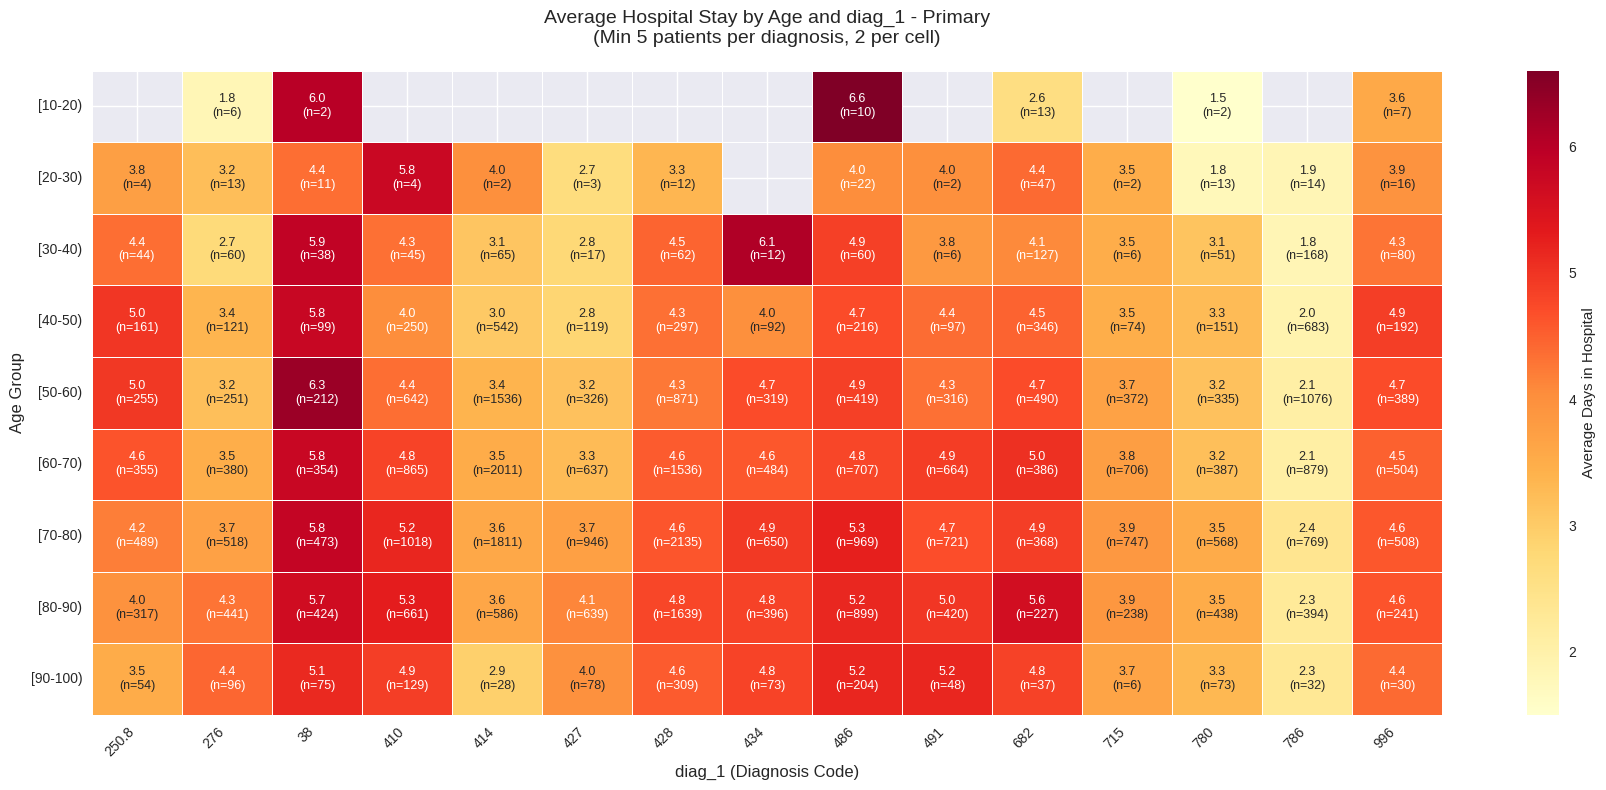


Summary for diag_1 (filtered data):
        Mean_Stay  Median_Stay  Std_Stay  Patient_Count
diag_1                                                 
38           5.79          5.0      3.21           1688
486          5.04          4.0      2.83           3508
410          4.87          4.0      3.08           3614
682          4.81          4.0      2.81           2042
434          4.76          4.0      2.81           2028
491          4.75          4.0      2.77           2275
996          4.60          4.0      3.16           1967
428          4.57          4.0      2.84           6862
250.8        4.41          4.0      3.10           1680
715          3.78          3.0      1.54           2151
276          3.70          3.0      2.49           1889
427          3.60          3.0      2.60           2766
414          3.47          2.0      2.80           6581
780          3.35          3.0      2.35           2019
786          2.12          2.0      1.57           4016

Diagnosis 

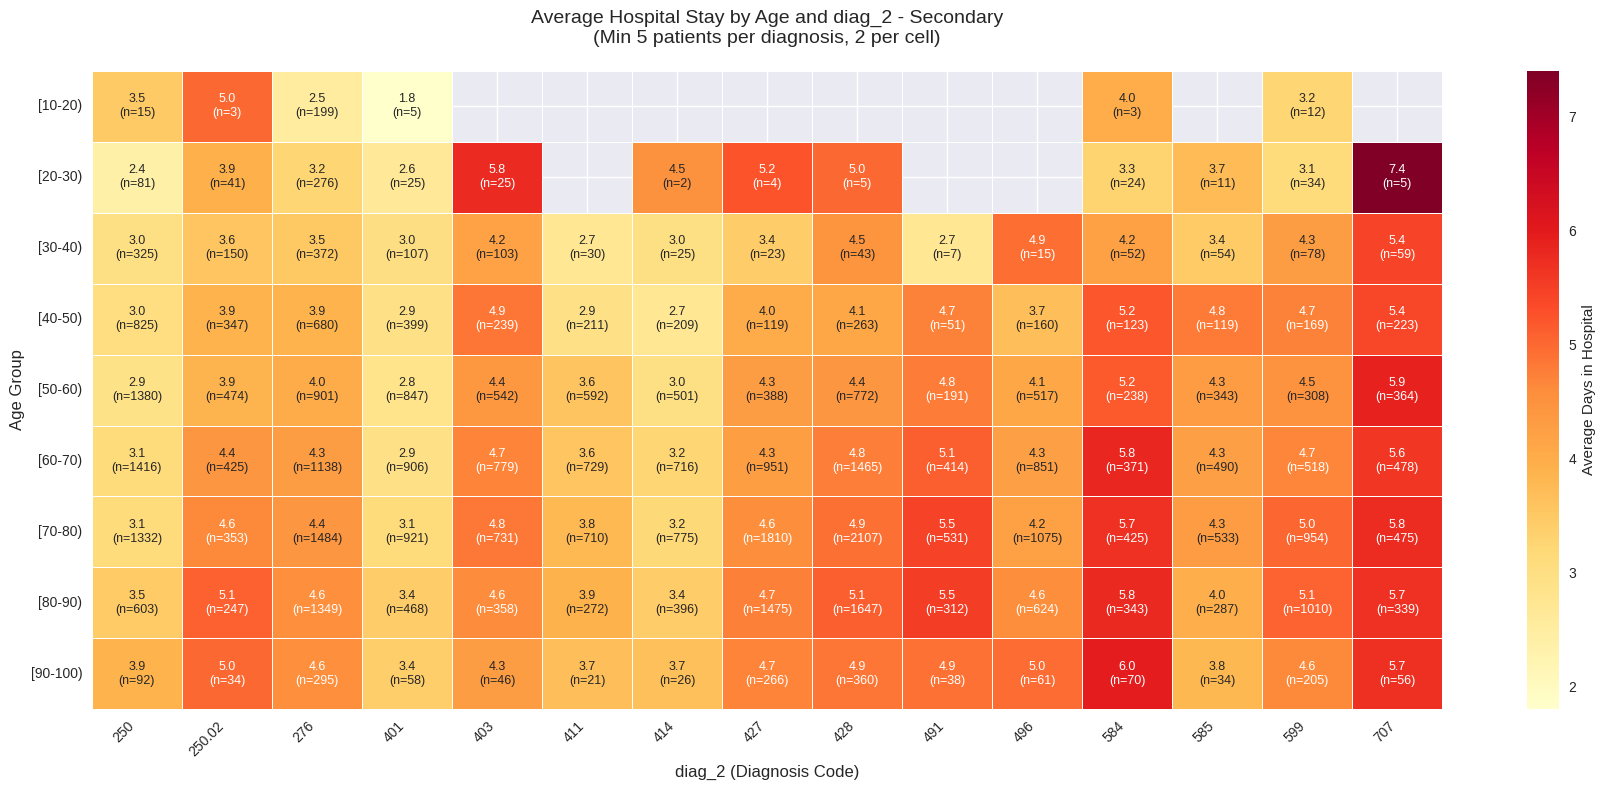


Summary for diag_2 (filtered data):
        Mean_Stay  Median_Stay  Std_Stay  Patient_Count
diag_2                                                 
707          5.69          5.0      3.25           1999
584          5.56          5.0      3.18           1649
491          5.25          5.0      2.91           1545
599          4.85          4.0      2.93           3288
428          4.84          4.0      3.05           6662
403          4.66          4.0      3.13           2823
427          4.55          4.0      2.95           5036
496          4.28          4.0      2.84           3305
250.02       4.26          4.0      2.72           2074
585          4.24          3.0      2.94           1871
276          4.17          3.0      2.69           6752
411          3.60          3.0      2.65           2566
414          3.17          3.0      2.31           2650
250          3.08          3.0      2.23           6071
401          3.02          3.0      2.14           3736

Diagnosis 

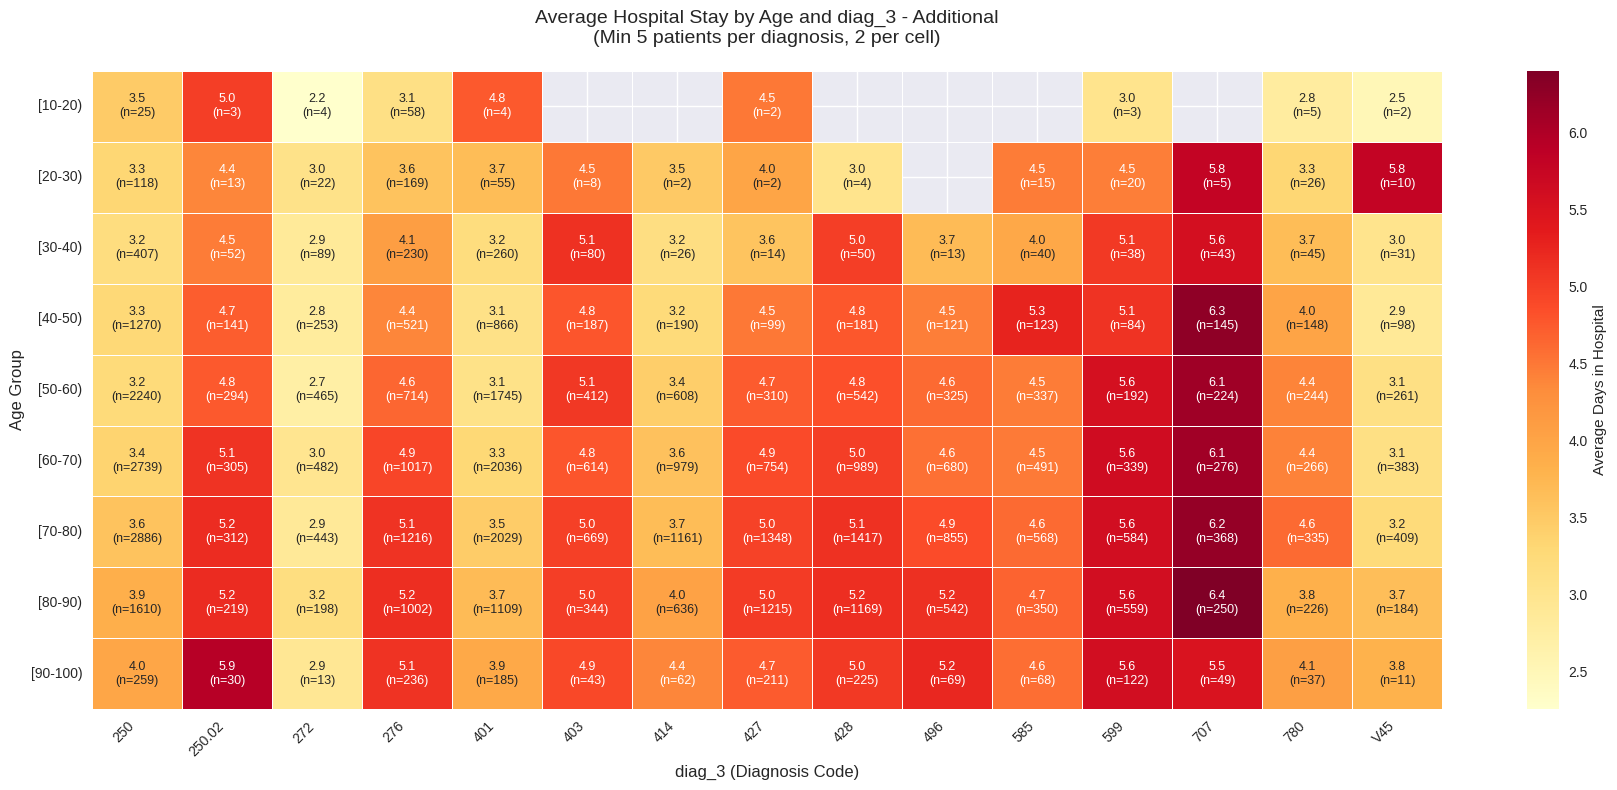


Summary for diag_3 (filtered data):
        Mean_Stay  Median_Stay  Std_Stay  Patient_Count
diag_3                                                 
707          6.18          6.0      3.30           1360
599          5.55          5.0      3.11           1941
428          5.05          4.0      3.15           4577
250.02       5.01          4.0      2.98           1369
403          4.94          4.0      3.22           2357
427          4.93          4.0      3.10           3955
276          4.83          4.0      2.95           5175
496          4.80          4.0      3.06           2605
585          4.59          4.0      2.96           1992
780          4.25          3.0      2.86           1334
414          3.67          3.0      2.60           3664
250          3.46          3.0      2.42          11555
401          3.34          3.0      2.36           8289
V45          3.23          3.0      2.45           1389
272          2.88          2.0      2.11           1969

Diagnosis 

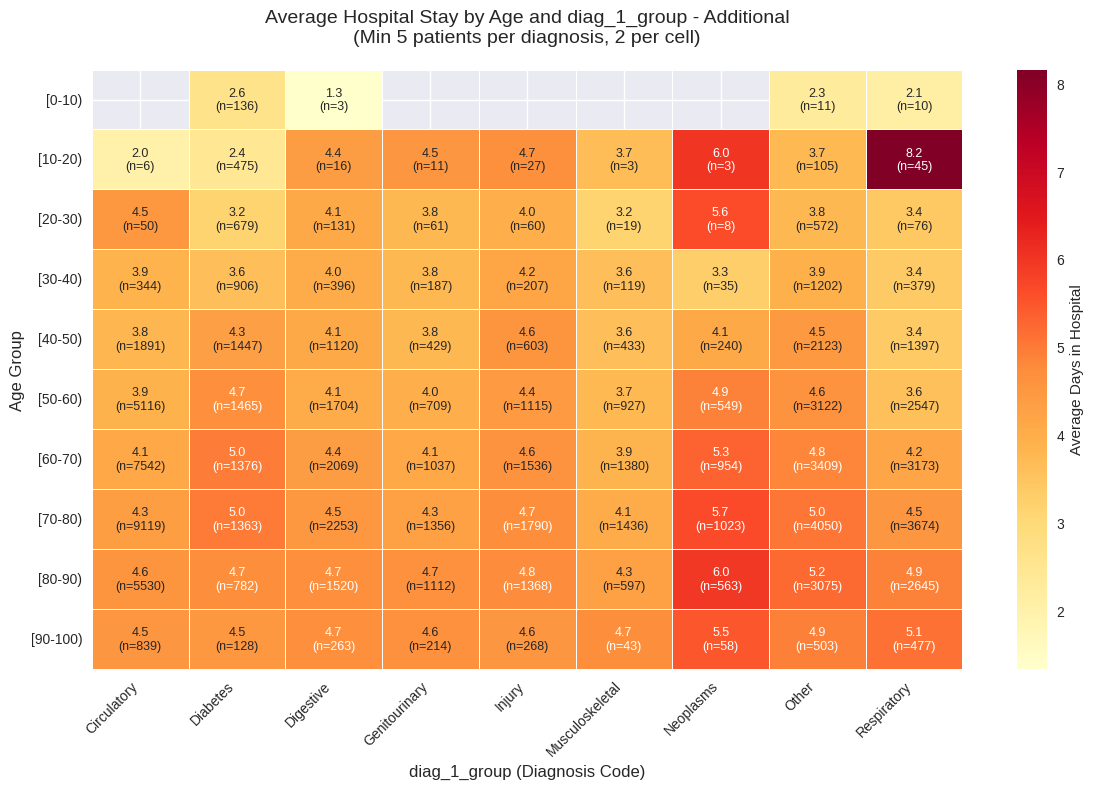


Summary for diag_1_group (filtered data):
                 Mean_Stay  Median_Stay  Std_Stay  Patient_Count
diag_1_group                                                    
Neoplasms             5.36          5.0      3.35           3433
Other                 4.76          4.0      3.20          18172
Injury                4.62          4.0      2.95           6974
Digestive             4.36          4.0      2.81           9475
Diabetes              4.34          3.0      3.02           8757
Genitourinary         4.24          3.0      2.82           5117
Circulatory           4.23          3.0      2.94          30437
Respiratory           4.23          3.0      2.96          14423
Musculoskeletal       3.92          3.0      2.37           4957

Diagnosis codes included in heatmap:
 1. Circulatory: 30,437 patients, avg 4.2 days
 2. Diabetes: 8,757 patients, avg 4.3 days
 3. Digestive: 9,475 patients, avg 4.4 days
 4. Genitourinary: 5,117 patients, avg 4.2 days
 5. Injury: 6,974 pati

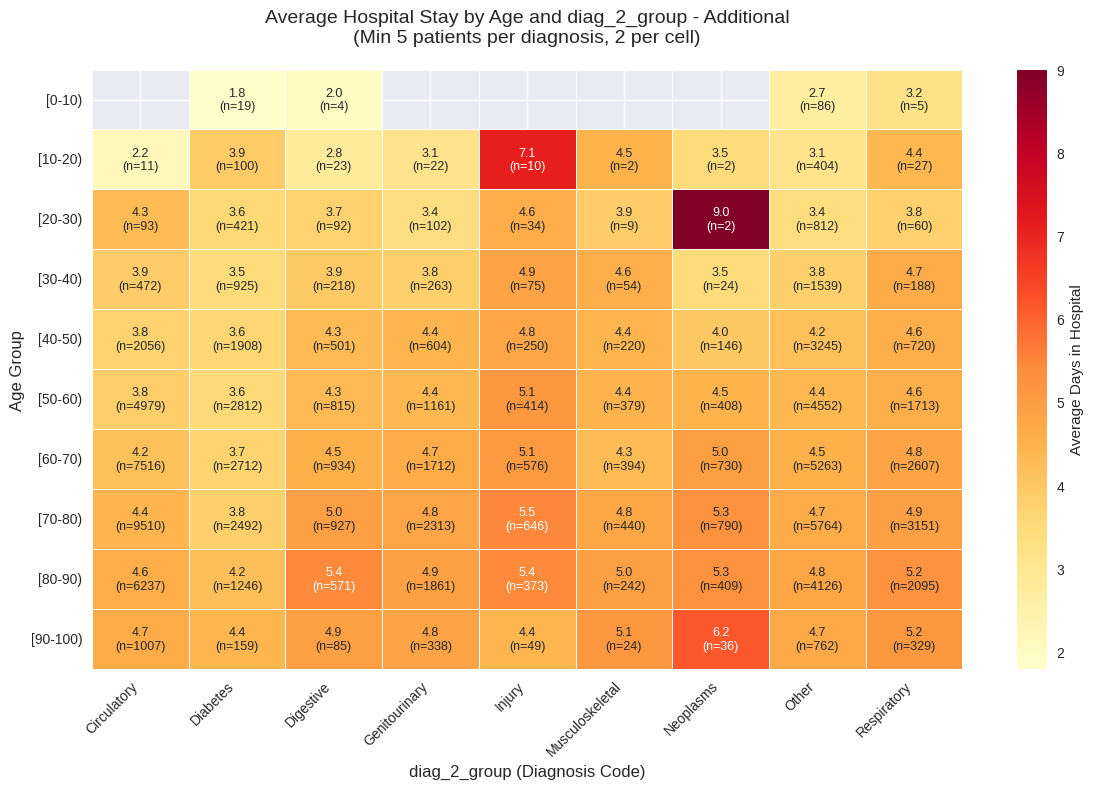


Summary for diag_2_group (filtered data):
                 Mean_Stay  Median_Stay  Std_Stay  Patient_Count
diag_2_group                                                    
Injury                5.20          4.0      3.29           2428
Neoplasms             4.98          4.0      3.22           2547
Respiratory           4.89          4.0      3.14          10895
Genitourinary         4.66          4.0      3.00           8376
Digestive             4.62          4.0      3.00           4170
Musculoskeletal       4.57          4.0      3.10           1764
Other                 4.44          4.0      2.94          26553
Circulatory           4.27          3.0      2.97          31881
Diabetes              3.72          3.0      2.67          12794

Diagnosis codes included in heatmap:
 1. Circulatory: 31,881 patients, avg 4.3 days
 2. Diabetes: 12,794 patients, avg 3.7 days
 3. Digestive: 4,170 patients, avg 4.6 days
 4. Genitourinary: 8,376 patients, avg 4.7 days
 5. Injury: 2,428 pat

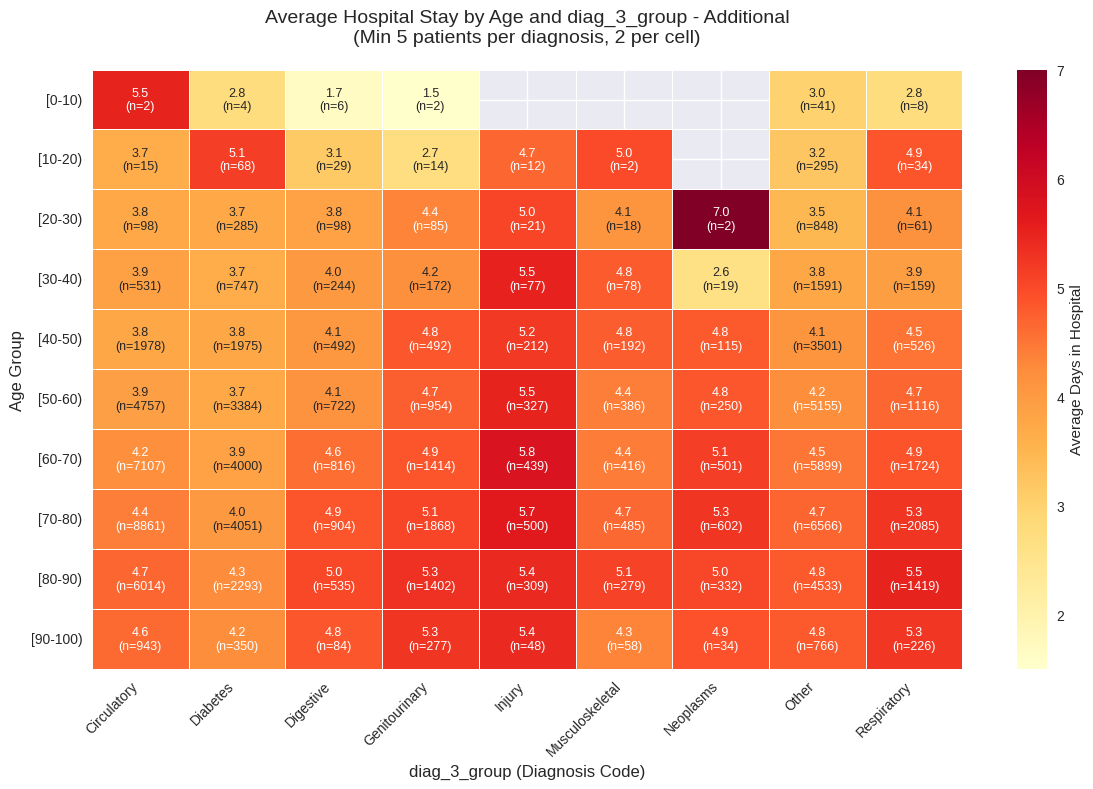


Summary for diag_3_group (filtered data):
                 Mean_Stay  Median_Stay  Std_Stay  Patient_Count
diag_3_group                                                    
Injury                5.55          5.0      3.35           1946
Neoplasms             5.08          4.0      3.22           1856
Respiratory           5.04          4.0      3.19           7358
Genitourinary         4.99          4.0      3.11           6680
Musculoskeletal       4.63          4.0      2.95           1915
Digestive             4.49          4.0      2.94           3930
Other                 4.42          4.0      2.96          29195
Circulatory           4.29          4.0      2.98          30306
Diabetes              3.92          3.0      2.73          17157

Diagnosis codes included in heatmap:
 1. Circulatory: 30,306 patients, avg 4.3 days
 2. Diabetes: 17,157 patients, avg 3.9 days
 3. Digestive: 3,930 patients, avg 4.5 days
 4. Genitourinary: 6,680 patients, avg 5.0 days
 5. Injury: 1,946 pat

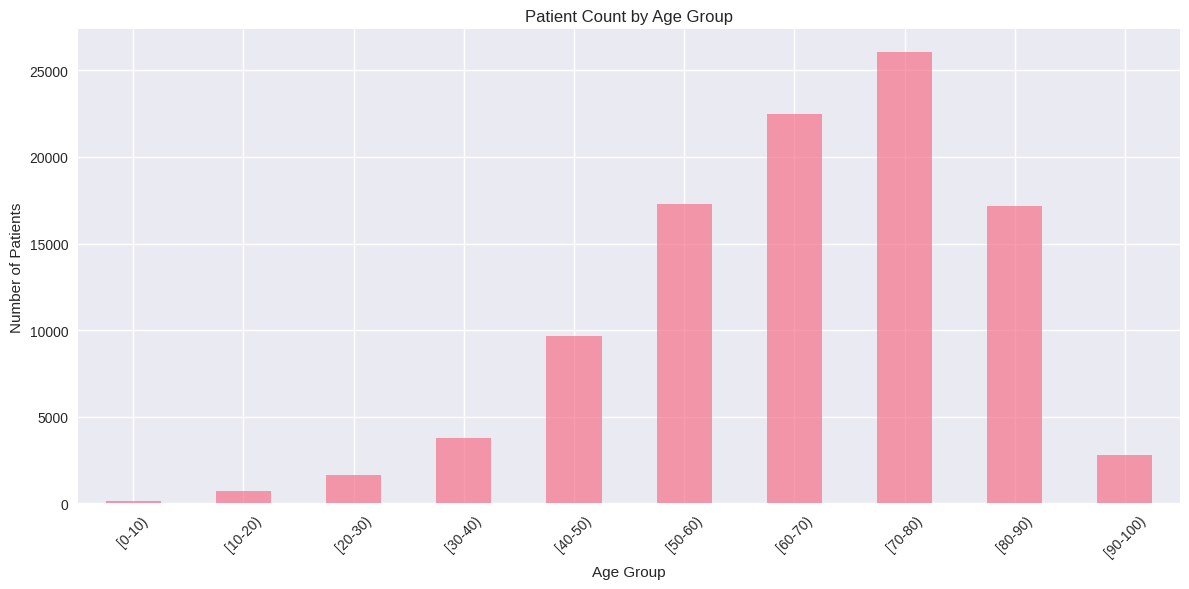

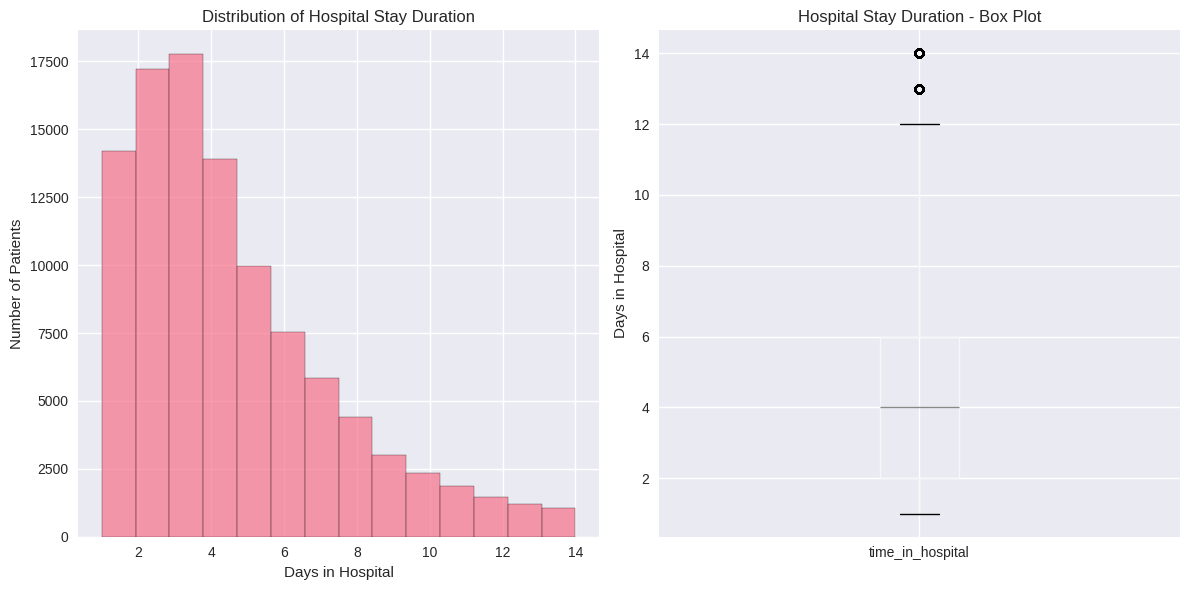


Overall Hospital Stay Statistics:
Mean: 4.40 days
Median: 4.00 days
Std: 2.99 days
Min: 1 days
Max: 14 days


In [44]:
# Check if required columns exist
required_cols = ['time_in_hospital', 'age', 'diag_1', 'diag_2', 'diag_3']
available_cols = [col for col in required_cols if col in df.columns]
print(f"Available columns for analysis: {available_cols}")

if 'time_in_hospital' in df.columns and 'age' in df.columns:

    def create_diagnosis_heatmap(data, diag_col, title_suffix="", min_patients_per_diag=100, min_patients_per_cell=5):
        """Create heatmap of average hospital stay by age and diagnosis with data filtering"""

        if diag_col not in data.columns:
            print(f"Column {diag_col} not found in dataset")
            return

        # Remove missing values
        clean_data = data[['time_in_hospital', 'age', diag_col]].dropna()

        if len(clean_data) == 0:
            print(f"No valid data for {diag_col}")
            return

        print(f"\nAnalyzing {diag_col}:")
        print(f"Valid records: {len(clean_data):,}")
        print(f"Unique age groups: {clean_data['age'].nunique()}")
        print(f"Unique {diag_col} codes: {clean_data[diag_col].nunique()}")

        # Filter diagnosis codes with sufficient patients
        diag_counts = clean_data[diag_col].value_counts()
        valid_diagnoses = diag_counts[diag_counts >= min_patients_per_diag].head(15).index.tolist()

        print(f"Diagnosis codes with >={min_patients_per_diag} patients: {len(valid_diagnoses)}")

        if not valid_diagnoses:
            print(f"No diagnosis codes meet the minimum threshold of {min_patients_per_diag} patients")
            return

        # Filter data to valid diagnoses
        filtered_data = clean_data[clean_data[diag_col].isin(valid_diagnoses)]

        # Create count matrix to identify cells with sufficient data
        count_matrix = filtered_data.groupby(['age', diag_col]).size().unstack(fill_value=0)

        # Create mean matrix
        mean_matrix = filtered_data.groupby(['age', diag_col])['time_in_hospital'].mean().unstack(fill_value=np.nan)

        # Mask cells with insufficient data
        mask = count_matrix < min_patients_per_cell
        mean_matrix_filtered = mean_matrix.copy()
        mean_matrix_filtered[mask] = np.nan

        # Remove rows and columns that are mostly empty
        # Keep rows (age groups) that have data in at least 3 diagnosis codes
        valid_rows = (mean_matrix_filtered.notna().sum(axis=1) >= 3)
        # Keep columns (diagnoses) that have data in at least 3 age groups
        valid_cols = (mean_matrix_filtered.notna().sum(axis=0) >= 3)

        if valid_rows.sum() == 0 or valid_cols.sum() == 0:
            print(f"Insufficient data for meaningful heatmap after filtering")
            return

        final_matrix = mean_matrix_filtered.loc[valid_rows, valid_cols]
        final_counts = count_matrix.loc[valid_rows, valid_cols]

        print(f"Final heatmap dimensions: {final_matrix.shape[0]} age groups × {final_matrix.shape[1]} diagnosis codes")
        print(f"Cells with data: {final_matrix.notna().sum().sum()}/{final_matrix.size}")

        if final_matrix.empty:
            print(f"No data available for heatmap creation for {diag_col}")
            return

        # Create heatmap
        plt.figure(figsize=(max(12, final_matrix.shape[1] * 1.2), max(8, final_matrix.shape[0] * 0.8)))

        # Create the heatmap with custom annotations
        annot_matrix = final_matrix.copy()
        for i in range(final_matrix.shape[0]):
            for j in range(final_matrix.shape[1]):
                if not pd.isna(final_matrix.iloc[i, j]):
                    # Show mean ± count in parentheses
                    annot_matrix.iloc[i, j] = f"{final_matrix.iloc[i, j]:.1f}\n(n={final_counts.iloc[i, j]})"
                else:
                    annot_matrix.iloc[i, j] = ""

        sns.heatmap(final_matrix,
                   annot=annot_matrix,
                   fmt='',
                   cmap='YlOrRd',
                   cbar_kws={'label': 'Average Days in Hospital'},
                   linewidths=0.5,
                   annot_kws={'fontsize': 9})

        plt.title(f'Average Hospital Stay by Age and {diag_col}{title_suffix}\n' +
                 f'(Min {min_patients_per_diag} patients per diagnosis, {min_patients_per_cell} per cell)',
                 fontsize=14, pad=20)
        plt.xlabel(f'{diag_col} (Diagnosis Code)', fontsize=12)
        plt.ylabel('Age Group', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)

        plt.tight_layout()
        plt.show()

        # Print summary statistics for filtered data
        print(f"\nSummary for {diag_col} (filtered data):")
        summary_stats = filtered_data.groupby(diag_col)['time_in_hospital'].agg(['mean', 'median', 'std', 'count'])
        summary_stats.columns = ['Mean_Stay', 'Median_Stay', 'Std_Stay', 'Patient_Count']
        summary_stats = summary_stats.round(2).sort_values('Mean_Stay', ascending=False)
        summary_stats_filtered = summary_stats[summary_stats['Mean_Stay'].notna()]
        print(summary_stats_filtered.to_string())

        # Show which diagnosis codes were included
        print(f"\nDiagnosis codes included in heatmap:")
        for i, diag in enumerate(final_matrix.columns):
            count = diag_counts[diag]
            mean_stay = summary_stats.loc[diag, 'Mean_Stay']
            print(f"{i+1:2d}. {diag}: {count:,} patients, avg {mean_stay:.1f} days")

    # Create heatmaps for each diagnosis column with intelligent filtering
    print("Creating filtered heatmaps (removing sparse data for better readability)...")
    print("Filtering criteria:")
    print("- Minimum 5 patients per diagnosis code")
    print("- Minimum 2 patients per age-diagnosis combination")
    print("- Age groups must have data for at least 3 diagnosis codes")
    print("- Diagnosis codes must have data for at least 3 age groups")

    for diag_col in ['diag_1', 'diag_2', 'diag_3', 'diag_1_group', 'diag_2_group', 'diag_3_group']:
        if diag_col in df.columns:

            create_diagnosis_heatmap(data=df,
                                   diag_col=diag_col,
                                   title_suffix=f" - Primary" if diag_col == 'diag_1'
                                              else f" - Secondary" if diag_col == 'diag_2'
                                              else " - Additional",
                                   min_patients_per_diag=5,
                                   min_patients_per_cell=2)

    # Overall analysis
    print("\n" + "="*60)
    print("OVERALL HOSPITAL STAY ANALYSIS")
    print("="*60)

    # Hospital stay statistics by age
    if 'age' in df.columns and 'time_in_hospital' in df.columns:
        age_stats = df.groupby('age')['time_in_hospital'].agg(['mean', 'median', 'std', 'count']).round(2)
        age_stats.columns = ['Mean_Stay', 'Median_Stay', 'Std_Stay', 'Patient_Count']
        print("\nHospital Stay Statistics by Age Group:")
        print(age_stats.to_string())

        # Age distribution plot
        plt.figure(figsize=(12, 6))
        df['age'].value_counts().sort_index().plot(kind='bar', alpha=0.7)
        plt.title('Patient Count by Age Group')
        plt.xlabel('Age Group')
        plt.ylabel('Number of Patients')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    # Overall hospital stay distribution
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    df['time_in_hospital'].hist(bins=14, alpha=0.7, edgecolor='black')
    plt.title('Distribution of Hospital Stay Duration')
    plt.xlabel('Days in Hospital')
    plt.ylabel('Number of Patients')

    plt.subplot(1, 2, 2)
    df.boxplot(column='time_in_hospital', ax=plt.gca())
    plt.title('Hospital Stay Duration - Box Plot')
    plt.ylabel('Days in Hospital')

    plt.tight_layout()
    plt.show()

    print(f"\nOverall Hospital Stay Statistics:")
    print(f"Mean: {df['time_in_hospital'].mean():.2f} days")
    print(f"Median: {df['time_in_hospital'].median():.2f} days")
    print(f"Std: {df['time_in_hospital'].std():.2f} days")
    print(f"Min: {df['time_in_hospital'].min()} days")
    print(f"Max: {df['time_in_hospital'].max()} days")

else:
    print("Required columns for hospital stay analysis not found in dataset")


Age groups converted to numeric:
     age  age_numeric
  [0-10)          5.0
 [10-20)         15.0
 [20-30)         25.0
 [30-40)         35.0
 [40-50)         45.0
 [50-60)         55.0
 [60-70)         65.0
 [70-80)         75.0
 [80-90)         85.0
[90-100)         95.0

Dataset overview:
Total records: 101,766
Records with valid age and hospital stay: 101,766
Hospital stay range: 1-14 days
Age range: 5-95 years

Analyzing age vs hospital stay correlations by primary diagnosis (diag_1)...
Analyzing 138 diagnosis codes with ≥100 patients

Correlation analysis completed for 138 diagnosis codes
Statistically significant correlations (p < 0.05): 57

DIAGNOSES WITH LONGER HOSPITAL STAYS AS AGE INCREASES
Diagnosis  Correlation  P-value    Patients   Mean Stay    Age Effect     
----------------------------------------------------------------------
250.2        0.3729     0.00004     114        3.90      + 2.58 days
250.03       0.3199     0.00000     201        2.77      + 2.55 days
250 

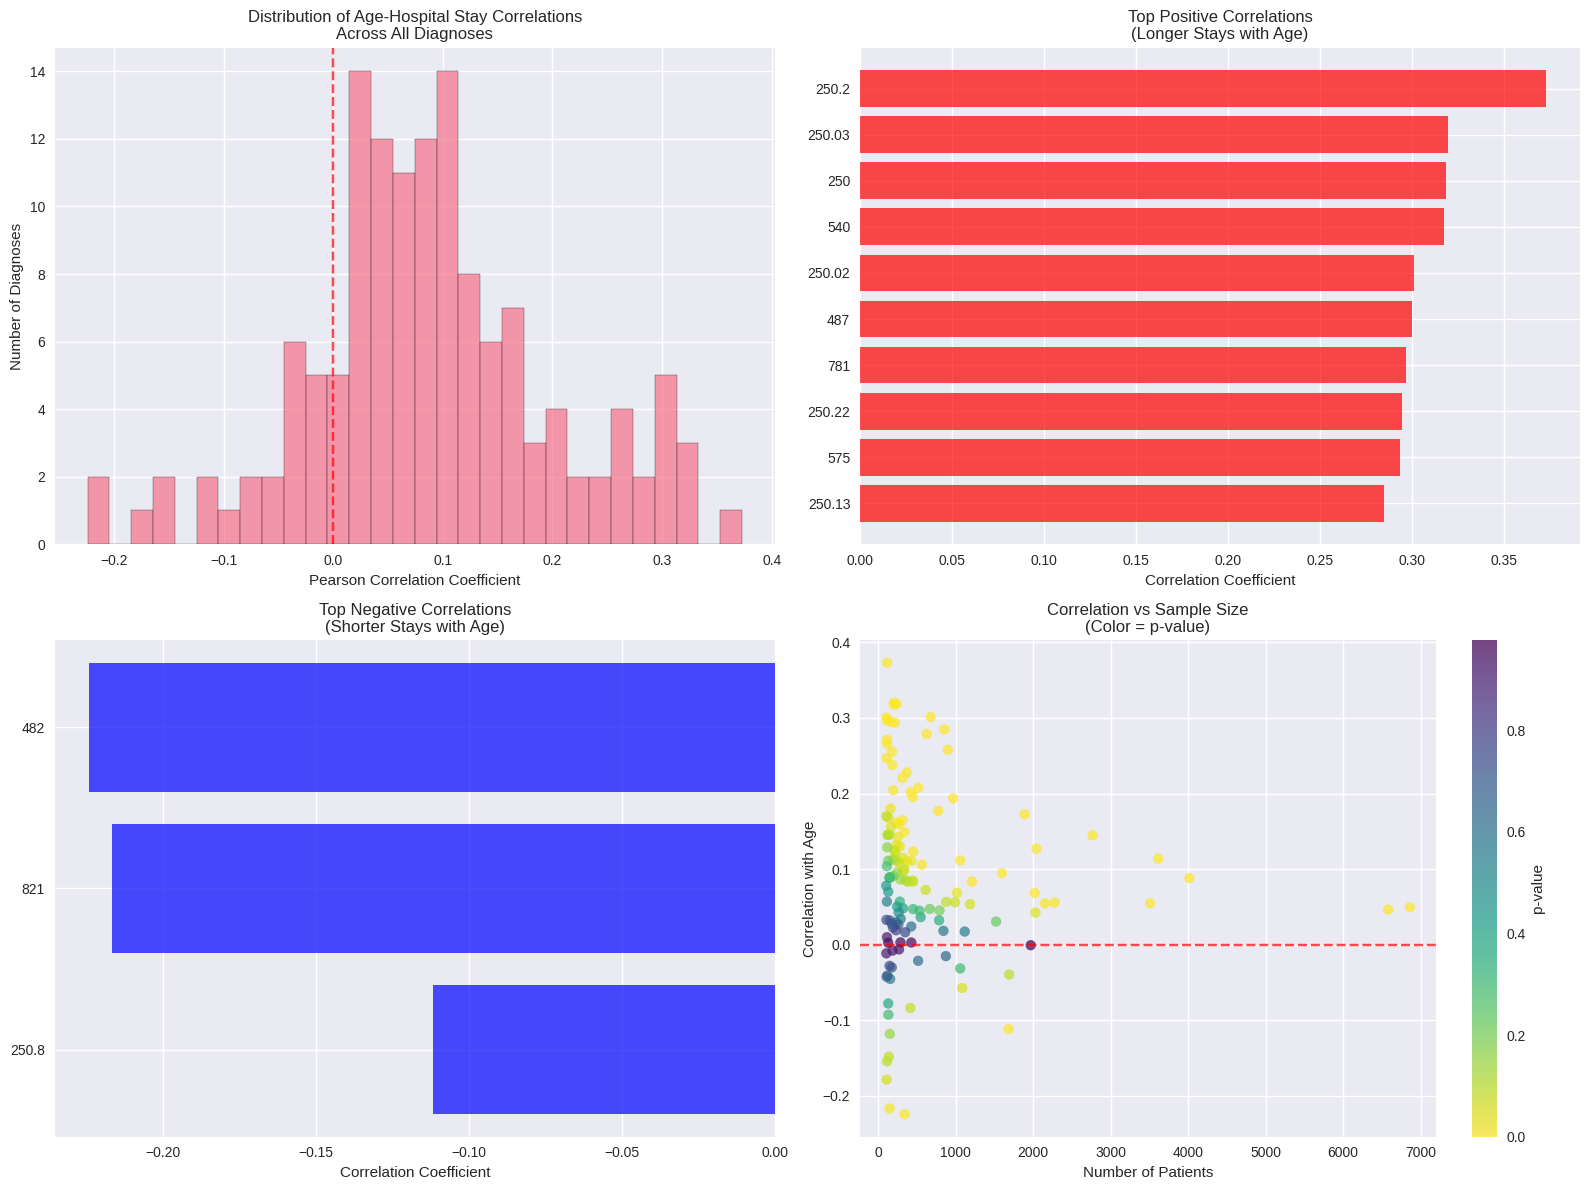


DETAILED ANALYSIS FOR TOP CORRELATIONS

TOP POSITIVE CORRELATION: Diagnosis 250.2
(Longer hospital stays as patients get older)


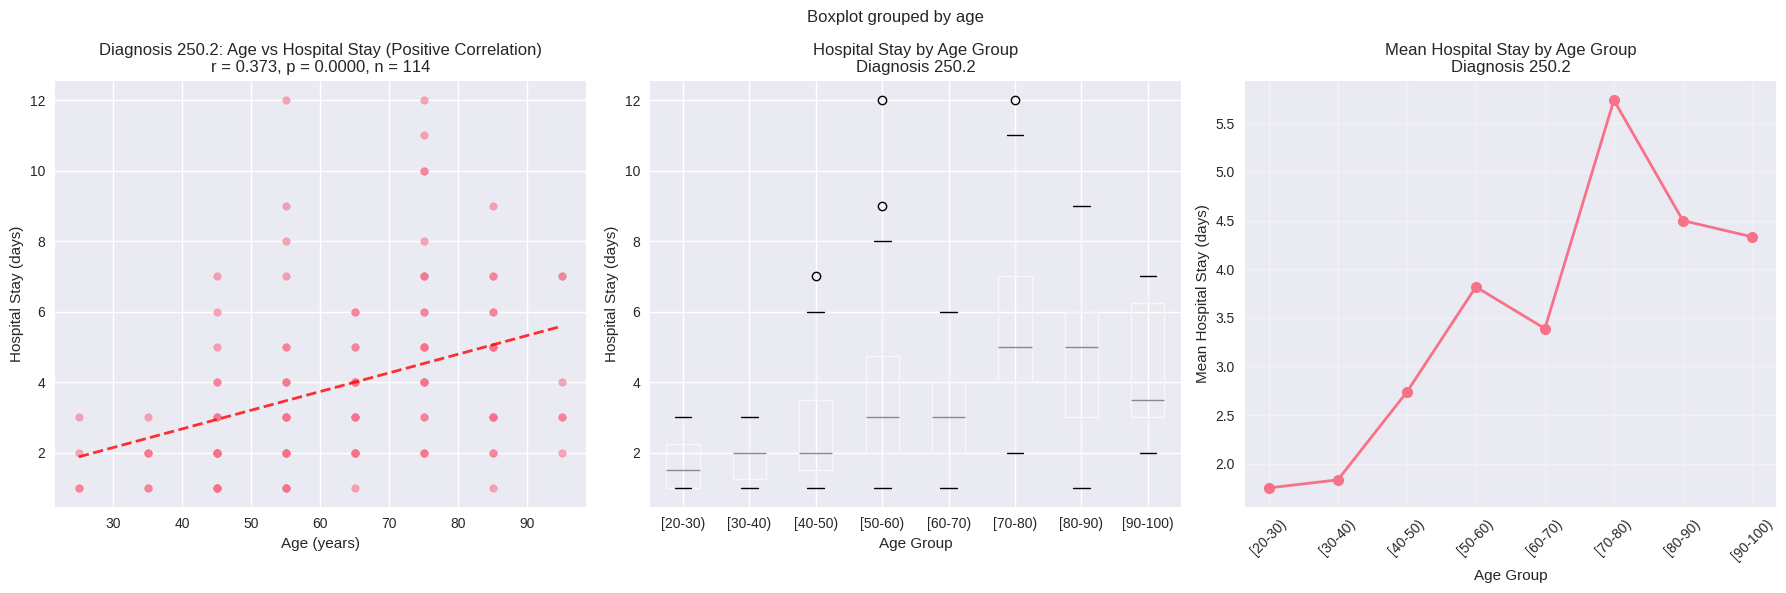


Detailed statistics for diagnosis 250.2:
          count  mean   std
age                        
[20-30)       4  1.75  0.96
[30-40)       6  1.83  0.75
[40-50)      19  2.74  1.76
[50-60)      22  3.82  2.89
[60-70)      18  3.39  1.46
[70-80)      23  5.74  2.90
[80-90)      16  4.50  2.19
[90-100)      6  4.33  2.16

TOP NEGATIVE CORRELATION: Diagnosis 482
(Shorter hospital stays as patients get older)


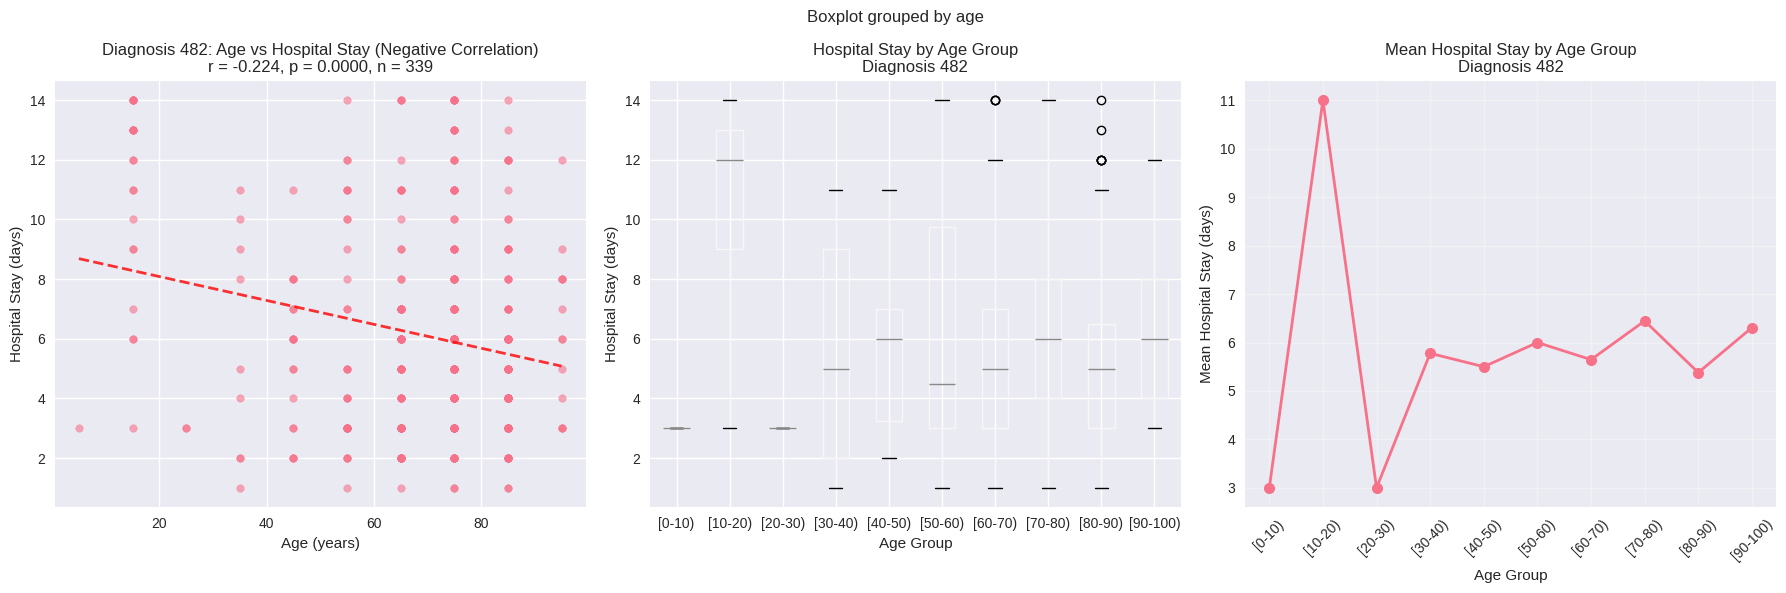


Detailed statistics for diagnosis 482:
          count   mean   std
age                         
[0-10)        1   3.00   NaN
[10-20)      21  11.00  3.21
[20-30)       2   3.00  0.00
[30-40)       9   5.78  3.80
[40-50)      18   5.50  2.50
[50-60)      30   6.00  3.80
[60-70)      65   5.65  3.27
[70-80)     101   6.45  3.44
[80-90)      79   5.38  3.01
[90-100)     13   6.31  2.72

ANALYSIS SUMMARY
Total diagnoses analyzed: 138
Statistically significant correlations: 57
Diagnoses with longer stays as age increases: 15
Diagnoses with shorter stays as age increases: 3


In [46]:

# AGE vs HOSPITAL STAY DURATION ANALYSIS BY DIAGNOSIS

from scipy.stats import pearsonr, spearmanr
import warnings
warnings.filterwarnings('ignore')

# Convert age groups to numeric for correlation analysis
def age_group_to_numeric(age_str):
    """Convert age group string to numeric midpoint"""
    if pd.isna(age_str):
        return np.nan

    # Handle different age group formats
    if '[' in str(age_str) and ')' in str(age_str):
        # Format: [70-80)
        age_str = str(age_str).replace('[', '').replace(')', '')
        if '-' in age_str:
            start, end = map(int, age_str.split('-'))
            return (start + end) / 2
    elif '-' in str(age_str):
        # Format: 70-80
        start, end = map(int, str(age_str).split('-'))
        return (start + end) / 2
    else:
        # Try to extract numbers
        import re
        numbers = re.findall(r'\d+', str(age_str))
        if len(numbers) >= 2:
            return (int(numbers[0]) + int(numbers[1])) / 2
        elif len(numbers) == 1:
            return int(numbers[0])

    return np.nan

# Create numeric age column
df['age_numeric'] = df['age'].apply(age_group_to_numeric)

print(f"Age groups converted to numeric:")
age_mapping = df[['age', 'age_numeric']].drop_duplicates().sort_values('age_numeric')
print(age_mapping.to_string(index=False))

# Check required columns
if 'time_in_hospital' not in df.columns:
    print("Error: 'time_in_hospital' column not found in dataset")
    exit()

if 'diag_1' not in df.columns:
    print("Error: 'diag_1' column not found in dataset")
    exit()

print(f"\nDataset overview:")
print(f"Total records: {len(df):,}")
print(f"Records with valid age and hospital stay: {len(df.dropna(subset=['age_numeric', 'time_in_hospital'])):,}")
print(f"Hospital stay range: {df['time_in_hospital'].min()}-{df['time_in_hospital'].max()} days")
print(f"Age range: {df['age_numeric'].min():.0f}-{df['age_numeric'].max():.0f} years")

def analyze_age_stay_correlation_by_diagnosis(data, min_patients=100):
    """
    Analyze correlation between age and hospital stay for each diagnosis
    """
    results = []

    print(f"\nAnalyzing age vs hospital stay correlations by primary diagnosis (diag_1)...")

    # Get diagnosis codes with sufficient patients
    diag_counts = data['diag_1'].value_counts()
    valid_diagnoses = diag_counts[diag_counts >= min_patients].index.tolist()

    print(f"Analyzing {len(valid_diagnoses)} diagnosis codes with ≥{min_patients} patients")

    for diag_code in valid_diagnoses:
        # Filter data for this diagnosis
        diag_data = data[data['diag_1'] == diag_code].copy()

        # Remove rows with missing age_numeric or time_in_hospital
        clean_data = diag_data[['age_numeric', 'time_in_hospital']].dropna()

        if len(clean_data) < 20:  # Minimum for meaningful correlation
            continue

        # Calculate correlations
        pearson_corr, pearson_p = pearsonr(clean_data['age_numeric'], clean_data['time_in_hospital'])
        spearman_corr, spearman_p = spearmanr(clean_data['age_numeric'], clean_data['time_in_hospital'])

        # Calculate additional statistics
        age_stats = clean_data.groupby(data.loc[clean_data.index, 'age'])['time_in_hospital'].agg(['mean', 'std', 'count'])
        youngest_age = clean_data['age_numeric'].min()
        oldest_age = clean_data['age_numeric'].max()

        # Get mean stay for youngest and oldest age groups
        youngest_stay = clean_data[clean_data['age_numeric'] == youngest_age]['time_in_hospital'].mean()
        oldest_stay = clean_data[clean_data['age_numeric'] == oldest_age]['time_in_hospital'].mean()
        stay_difference = oldest_stay - youngest_stay

        results.append({
            'diagnosis_code': diag_code,
            'patient_count': len(clean_data),
            'pearson_corr': pearson_corr,
            'pearson_p_value': pearson_p,
            'spearman_corr': spearman_corr,
            'spearman_p_value': spearman_p,
            'mean_stay_overall': clean_data['time_in_hospital'].mean(),
            'std_stay_overall': clean_data['time_in_hospital'].std(),
            'youngest_age': youngest_age,
            'oldest_age': oldest_age,
            'youngest_stay': youngest_stay,
            'oldest_stay': oldest_stay,
            'stay_difference': stay_difference,
            'age_range': oldest_age - youngest_age
        })

    return pd.DataFrame(results)

# Run the correlation analysis
correlation_results = analyze_age_stay_correlation_by_diagnosis(df, min_patients=100)

if correlation_results.empty:
    print("No diagnosis codes meet the minimum patient threshold.")
else:
    print(f"\nCorrelation analysis completed for {len(correlation_results)} diagnosis codes")

    # Filter for significant correlations (p < 0.05)
    significant_results = correlation_results[correlation_results['pearson_p_value'] < 0.05].copy()

    print(f"Statistically significant correlations (p < 0.05): {len(significant_results)}")

    if len(significant_results) > 0:
        # Sort by correlation strength
        significant_results = significant_results.sort_values('pearson_corr', key=abs, ascending=False)

        # Diagnoses with POSITIVE correlation (longer stay with older age)
        positive_corr = significant_results[significant_results['pearson_corr'] > 0].head(15)
        if len(positive_corr) > 0:
            print(f"\n" + "="*70)
            print("DIAGNOSES WITH LONGER HOSPITAL STAYS AS AGE INCREASES")
            print("="*70)
            print(f"{'Diagnosis':<10} {'Correlation':<12} {'P-value':<10} {'Patients':<10} {'Mean Stay':<12} {'Age Effect':<15}")
            print("-" * 70)

            for idx, row in positive_corr.iterrows():
                print(f"{row['diagnosis_code']:<10} {row['pearson_corr']:8.4f}    {row['pearson_p_value']:8.5f}  "
                      f"{row['patient_count']:6.0f}     {row['mean_stay_overall']:7.2f}      "
                      f"+{row['stay_difference']:5.2f} days")

        # Diagnoses with NEGATIVE correlation (shorter stay with older age)
        negative_corr = significant_results[significant_results['pearson_corr'] < 0].head(15)
        if len(negative_corr) > 0:
            print(f"\n" + "="*70)
            print("DIAGNOSES WITH SHORTER HOSPITAL STAYS AS AGE INCREASES")
            print("="*70)
            print(f"{'Diagnosis':<10} {'Correlation':<12} {'P-value':<10} {'Patients':<10} {'Mean Stay':<12} {'Age Effect':<15}")
            print("-" * 70)

            for idx, row in negative_corr.iterrows():
                print(f"{row['diagnosis_code']:<10} {row['pearson_corr']:8.4f}    {row['pearson_p_value']:8.5f}  "
                      f"{row['patient_count']:6.0f}     {row['mean_stay_overall']:7.2f}      "
                      f"{row['stay_difference']:6.2f} days")

        # Create visualizations
        fig, axes = plt.subplots(2, 2, figsize=(16, 12))

        # Plot 1: Distribution of correlations
        axes[0, 0].hist(correlation_results['pearson_corr'], bins=30, alpha=0.7, edgecolor='black')
        axes[0, 0].axvline(x=0, color='red', linestyle='--', alpha=0.7)
        axes[0, 0].set_title('Distribution of Age-Hospital Stay Correlations\nAcross All Diagnoses')
        axes[0, 0].set_xlabel('Pearson Correlation Coefficient')
        axes[0, 0].set_ylabel('Number of Diagnoses')

        # Plot 2: Top positive correlations
        if len(positive_corr) > 0:
            top_positive = positive_corr.head(10)
            bars1 = axes[0, 1].barh(range(len(top_positive)), top_positive['pearson_corr'],
                                   alpha=0.7, color='red')
            axes[0, 1].set_yticks(range(len(top_positive)))
            axes[0, 1].set_yticklabels(top_positive['diagnosis_code'])
            axes[0, 1].set_xlabel('Correlation Coefficient')
            axes[0, 1].set_title('Top Positive Correlations\n(Longer Stays with Age)')
            axes[0, 1].invert_yaxis()

        # Plot 3: Top negative correlations
        if len(negative_corr) > 0:
            top_negative = negative_corr.head(10)
            bars2 = axes[1, 0].barh(range(len(top_negative)), top_negative['pearson_corr'],
                                   alpha=0.7, color='blue')
            axes[1, 0].set_yticks(range(len(top_negative)))
            axes[1, 0].set_yticklabels(top_negative['diagnosis_code'])
            axes[1, 0].set_xlabel('Correlation Coefficient')
            axes[1, 0].set_title('Top Negative Correlations\n(Shorter Stays with Age)')
            axes[1, 0].invert_yaxis()

        # Plot 4: Correlation vs Patient Count
        scatter = axes[1, 1].scatter(correlation_results['patient_count'],
                                   correlation_results['pearson_corr'],
                                   c=correlation_results['pearson_p_value'],
                                   alpha=0.7, s=50, cmap='viridis_r')
        axes[1, 1].axhline(y=0, color='red', linestyle='--', alpha=0.7)
        axes[1, 1].set_xlabel('Number of Patients')
        axes[1, 1].set_ylabel('Correlation with Age')
        axes[1, 1].set_title('Correlation vs Sample Size\n(Color = p-value)')
        plt.colorbar(scatter, ax=axes[1, 1], label='p-value')

        plt.tight_layout()
        plt.show()

# Detailed analysis for specific diagnoses
def plot_age_stay_relationship(data, diagnosis_code, title_suffix=""):
    """Plot detailed age vs hospital stay relationship for specific diagnosis"""

    diag_data = data[data['diag_1'] == diagnosis_code].copy()
    clean_data = diag_data[['age_numeric', 'time_in_hospital', 'age']].dropna()

    if len(clean_data) < 20:
        print(f"Insufficient data for diagnosis {diagnosis_code}")
        return

    corr, p_val = pearsonr(clean_data['age_numeric'], clean_data['time_in_hospital'])

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Scatter plot with trend line
    axes[0].scatter(clean_data['age_numeric'], clean_data['time_in_hospital'],
                   alpha=0.6, s=30)

    # Add trend line
    z = np.polyfit(clean_data['age_numeric'], clean_data['time_in_hospital'], 1)
    p = np.poly1d(z)
    sorted_ages = clean_data['age_numeric'].sort_values()
    axes[0].plot(sorted_ages, p(sorted_ages), "r--", alpha=0.8, linewidth=2)

    axes[0].set_title(f'Diagnosis {diagnosis_code}: Age vs Hospital Stay{title_suffix}\n'
                     f'r = {corr:.3f}, p = {p_val:.4f}, n = {len(clean_data)}')
    axes[0].set_xlabel('Age (years)')
    axes[0].set_ylabel('Hospital Stay (days)')

    # Box plot by age group
    clean_data.boxplot(column='time_in_hospital', by='age', ax=axes[1])
    axes[1].set_title(f'Hospital Stay by Age Group\nDiagnosis {diagnosis_code}')
    axes[1].set_xlabel('Age Group')
    axes[1].set_ylabel('Hospital Stay (days)')

    # Mean hospital stay by age group
    age_means = clean_data.groupby('age')['time_in_hospital'].mean().sort_index()
    axes[2].plot(range(len(age_means)), age_means.values, 'o-', linewidth=2, markersize=8)
    axes[2].set_xticks(range(len(age_means)))
    axes[2].set_xticklabels(age_means.index, rotation=45)
    axes[2].set_title(f'Mean Hospital Stay by Age Group\nDiagnosis {diagnosis_code}')
    axes[2].set_xlabel('Age Group')
    axes[2].set_ylabel('Mean Hospital Stay (days)')
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Print detailed statistics
    print(f"\nDetailed statistics for diagnosis {diagnosis_code}:")
    age_group_stats = clean_data.groupby('age')['time_in_hospital'].agg(['count', 'mean', 'std']).round(2)
    print(age_group_stats.to_string())

# Show detailed analysis for top correlations
if not correlation_results.empty and len(significant_results) > 0:
    print(f"\n" + "="*80)
    print("DETAILED ANALYSIS FOR TOP CORRELATIONS")
    print("="*80)

    # Top positive correlation
    if len(positive_corr) > 0:
        top_positive_diag = positive_corr.iloc[0]['diagnosis_code']
        print(f"\nTOP POSITIVE CORRELATION: Diagnosis {top_positive_diag}")
        print(f"(Longer hospital stays as patients get older)")
        plot_age_stay_relationship(df, top_positive_diag, " (Positive Correlation)")

    # Top negative correlation
    if len(negative_corr) > 0:
        top_negative_diag = negative_corr.iloc[0]['diagnosis_code']
        print(f"\nTOP NEGATIVE CORRELATION: Diagnosis {top_negative_diag}")
        print(f"(Shorter hospital stays as patients get older)")
        plot_age_stay_relationship(df, top_negative_diag, " (Negative Correlation)")

print(f"\n" + "="*80)
print("ANALYSIS SUMMARY")
print("="*80)
if not correlation_results.empty:
    total_diagnoses = len(correlation_results)
    significant_diagnoses = len(significant_results) if not significant_results.empty else 0
    positive_diagnoses = len(positive_corr) if len(positive_corr) > 0 else 0
    negative_diagnoses = len(negative_corr) if len(negative_corr) > 0 else 0

    print(f"Total diagnoses analyzed: {total_diagnoses}")
    print(f"Statistically significant correlations: {significant_diagnoses}")
    print(f"Diagnoses with longer stays as age increases: {positive_diagnoses}")
    print(f"Diagnoses with shorter stays as age increases: {negative_diagnoses}")
else:
    print("No diagnoses met the minimum patient threshold for analysis.")

# 12. DIAGNOSTIC ANALYSIS

12.1 Most Common Primary Diagnoses:
diag_1
428      6862
414      6581
786      4016
410      3614
486      3508
427      2766
491      2275
715      2151
682      2042
434      2028
780      2019
996      1967
276      1889
38       1688
250.8    1680
Name: count, dtype: int64
12.2 Most Common Secondary Diagnoses:
diag_2
276       6752
428       6662
250       6071
427       5036
401       3736
496       3305
599       3288
403       2823
414       2650
411       2566
250.02    2074
707       1999
585       1871
584       1649
491       1545
Name: count, dtype: int64
12.3 Most Common Additional Diagnoses:
diag_3
250       11555
401        8289
276        5175
428        4577
427        3955
414        3664
496        2605
403        2357
585        1992
272        1969
599        1941
V45        1389
250.02     1369
707        1360
780        1334
Name: count, dtype: int64


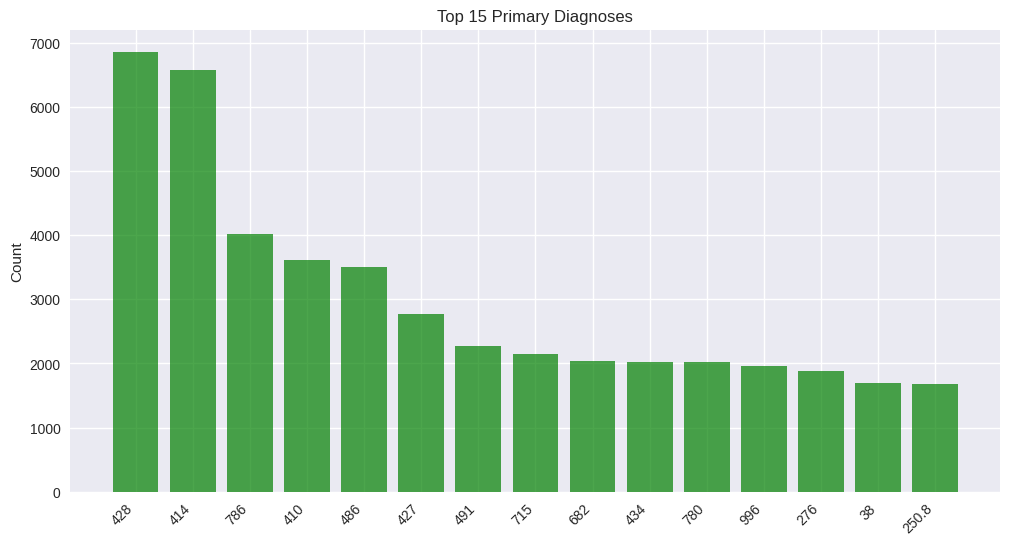

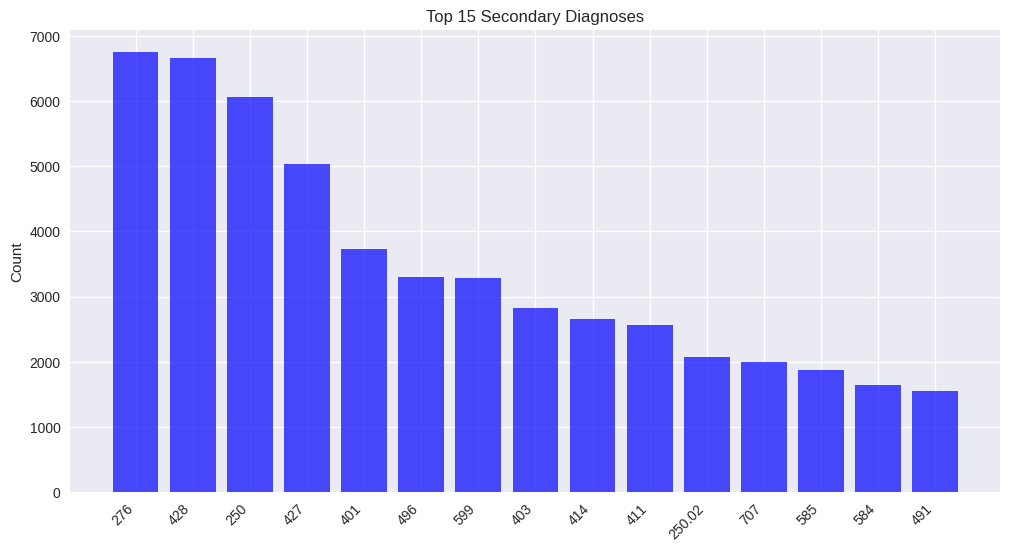

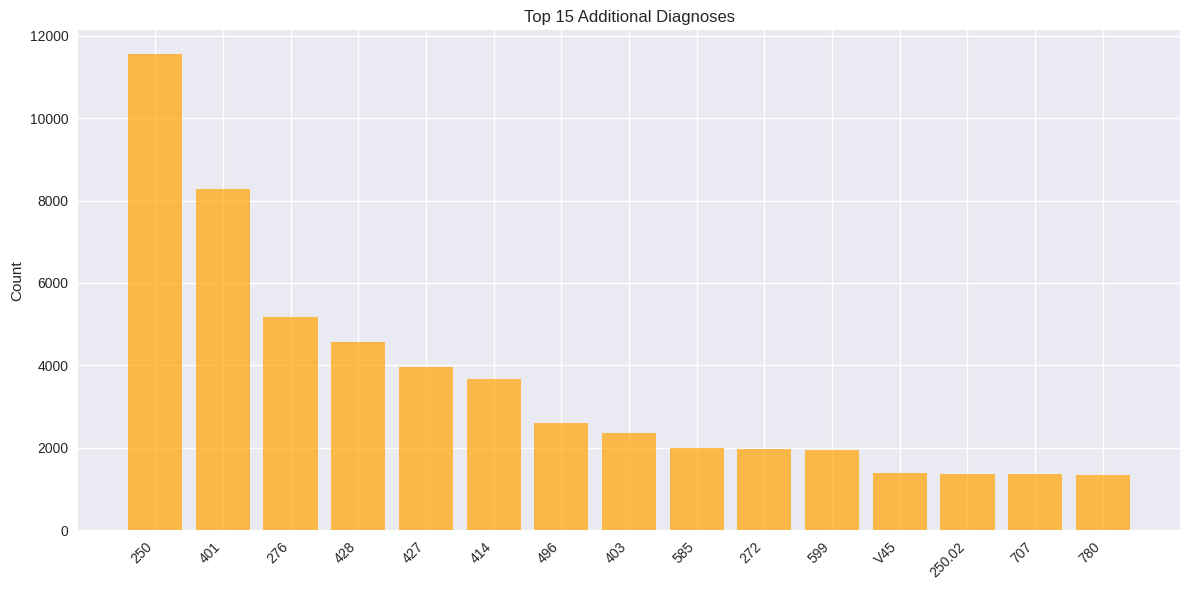

In [29]:
# Primary, secondary, and additional diagnoses
diag_cols = ['diag_1', 'diag_2', 'diag_3']
available_diag_cols = [col for col in diag_cols if col in df.columns]

if available_diag_cols:
    print("12.1 Most Common Primary Diagnoses:")
    if 'diag_1' in df.columns:
        primary_diag = df['diag_1'].value_counts().head(15)
        print(primary_diag)

        plt.figure(figsize=(12, 6))
        plt.bar(range(len(primary_diag)), primary_diag.values, color='green', alpha=0.7)
        plt.xticks(range(len(primary_diag)), primary_diag.index, rotation=45, ha='right')
        plt.title('Top 15 Primary Diagnoses')
        plt.ylabel('Count')

    print("12.2 Most Common Secondary Diagnoses:")
    if 'diag_2' in df.columns:
        primary_diag = df['diag_2'].value_counts().head(15)
        print(primary_diag)

        plt.figure(figsize=(12, 6))
        plt.bar(range(len(primary_diag)), primary_diag.values, color='blue', alpha=0.7)
        plt.xticks(range(len(primary_diag)), primary_diag.index, rotation=45, ha='right')
        plt.title('Top 15 Secondary Diagnoses')
        plt.ylabel('Count')

    print("12.3 Most Common Additional Diagnoses:")
    if 'diag_3' in df.columns:
        primary_diag = df['diag_3'].value_counts().head(15)
        print(primary_diag)

        plt.figure(figsize=(12, 6))
        plt.bar(range(len(primary_diag)), primary_diag.values, color='orange', alpha=0.7)
        plt.xticks(range(len(primary_diag)), primary_diag.index, rotation=45, ha='right')
        plt.title('Top 15 Additional Diagnoses')
        plt.ylabel('Count')

    plt.tight_layout()
    plt.show()


# 13. SUMMARY REPORT

In [30]:
print("\n📊 DATASET OVERVIEW:")
print(f"• Total patients: {len(df):,}")
print(f"• Total features: {len(df.columns)}")
print(f"• Numerical features: {len(df.select_dtypes(include=[np.number]).columns)}")
print(f"• Categorical features: {len(df.select_dtypes(include=['object']).columns)}")
print(f"• Missing data: {df.isnull().sum().sum():,} values ({df.isnull().sum().sum()/(len(df)*len(df.columns))*100:.2f}%)")
print(f"• High missing data columns: {missing_cols[missing_cols['Missing Percentage'] > 90]}")
print(f"• Constant data columns: {constant_cols}")

print("\n🏥 KEY FINDINGS:")

# Patient demographics
if 'age' in df.columns:
    most_common_age = df['age'].mode()[0] if not df['age'].empty else "N/A"
    print(f"• Most common age group: {most_common_age}")

if 'gender' in df.columns:
    gender_dist = df['gender'].value_counts()
    if len(gender_dist) > 0:
        dominant_gender = gender_dist.index[0]
        gender_pct = gender_dist.iloc[0] / len(df) * 100
        print(f"• Gender distribution: {dominant_gender} ({gender_pct:.1f}%)")

if 'race' in df.columns:
    most_common_race = df['race'].mode()[0] if not df['race'].empty else "N/A"
    print(f"""• Most common race: {most_common_race}.
    Underrepresented for Asian (0.6%) and Hispanic (2%) as racial and ethnic groups in the U.S. for 2022:
      White (Non-Hispanic): 59.2%
      Hispanic or Latino: 19.1%
      Black or African American: Approximately 12%
      Asian (Non-Hispanic): Approximately 5.75%""")

# Medical characteristics
if 'time_in_hospital' in df.columns:
    avg_stay = df['time_in_hospital'].mean()
    print(f"• Average hospital stay: {avg_stay:.1f} days")

if 'num_medications' in df.columns:
    avg_medications = df['num_medications'].mean()
    print(f"• Average medications per patient: {avg_medications:.1f}")

if 'number_diagnoses' in df.columns:
    avg_diagnoses = df['number_diagnoses'].mean()
    print(f"• Average diagnoses per patient: {avg_diagnoses:.1f}")

# Readmission insights
if target_col in df.columns:
    readmit_rate = df[target_col].value_counts(normalize=True) * 100
    print(f"\n🔄 READMISSION ANALYSIS:")
    for status, rate in readmit_rate.items():
        print(f"• {status}: {rate:.1f}% of patients")
    print(f"Dataset is imbalanced for <30 days readmission rate")

# Medication insights

print("\n💊 MEDICATION INSIGHTS:")
if med_cols:
    for med_col in med_cols[:3]:  # Top 3 medications
        if med_col in df.columns:
            med_usage = df[med_col].value_counts()
            if 'Up' in med_usage.index:
                up_pct = med_usage['Up'] / len(df) * 100
                print(f"• {med_col} increased: {up_pct:.1f}% of patients")

print("\n🚨 DATA QUALITY NOTES:")
if question_mark_counts:
    print("• Missing data patterns identified in categorical variables")
    print("• '?' values replaced with NaN for proper handling")

if high_corr_pairs:
    print(f"• {len(high_corr_pairs)} highly correlated variable pairs found")
else:
    print("• No highly correlated variable pairs found")


📊 DATASET OVERVIEW:
• Total patients: 101,766
• Total features: 52
• Numerical features: 11
• Categorical features: 38
• Missing data: 375,819 values (7.10%)
• High missing data columns:                Missing Count  Missing Percentage
weight                 98569           96.858479
max_glu_serum          96420           94.746772
• Constant data columns: ['examide', 'citoglipton']

🏥 KEY FINDINGS:
• Most common age group: [70-80)
• Gender distribution: Female (53.8%)
• Most common race: Caucasian. 
    Underrepresented for Asian (0.6%) and Hispanic (2%) as racial and ethnic groups in the U.S. for 2022: 
      White (Non-Hispanic): 59.2%
      Hispanic or Latino: 19.1%
      Black or African American: Approximately 12%
      Asian (Non-Hispanic): Approximately 5.75%
• Average hospital stay: 4.4 days
• Average medications per patient: 16.0
• Average diagnoses per patient: 7.4

🔄 READMISSION ANALYSIS:
• NO: 53.9% of patients
• >30: 34.9% of patients
• <30: 11.2% of patients
Dataset is 